# Explore DSL

This notebook is an experimental approach on solving the ARC challenge. See https://arcprize.org/ for more details.

In [1]:
from pathlib import Path

from arc2024.data import FewShotDataset
from arc2024.utils import plot
from arc2024.dsl

## Prepare Dataset

In [2]:
dataset = FewShotDataset(dataset_dir=Path('datasets'))
dataset

X_samples, y_samples = dataset.get_samples('67a3c6ac')

# DSL


# Visualize Easy Challenges from Training Dataset

In [3]:
challenge_ids = ['67a3c6ac', '68b16354', '74dd1130', '3c9b0459', '6150a2bd', '9172f3a0', '9dfd6313', 'a416b8f3', 'b1948b0a', 'c59eb873', 'c8f0f002', 'd10ecb37', 'd511f180', 'ed36cc']

## Naive Difference

1: 67a3c6ac - Example #1:


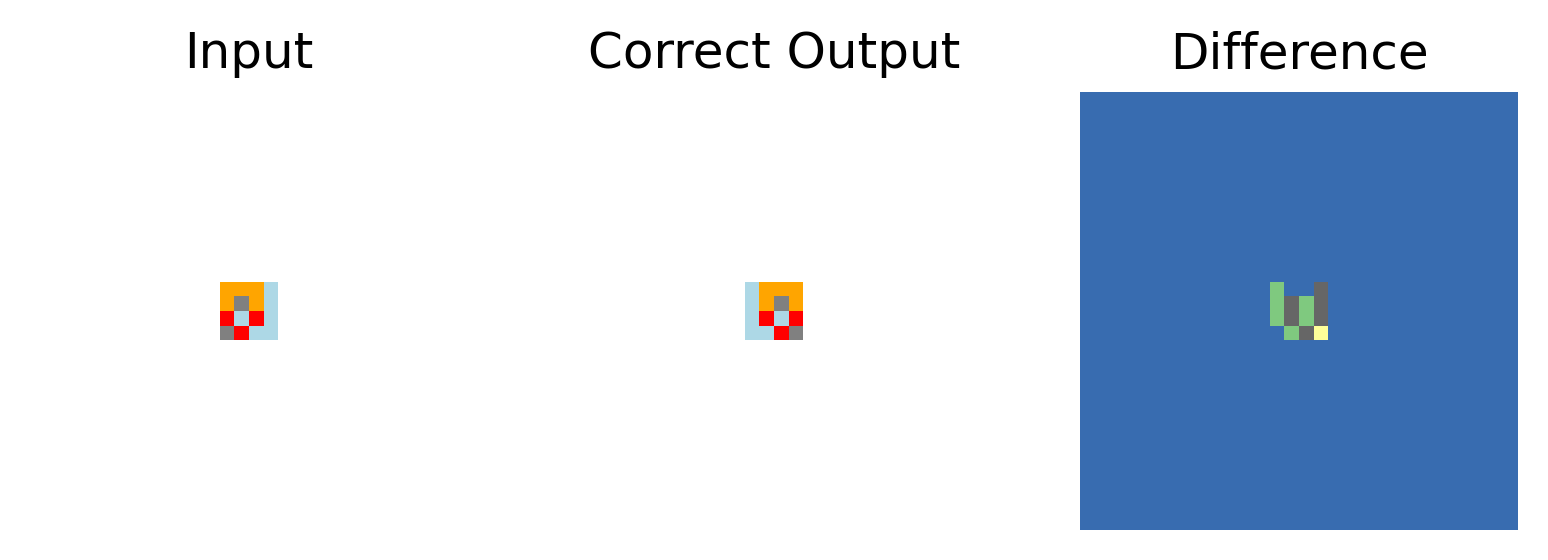

2: 67a3c6ac - Example #2:


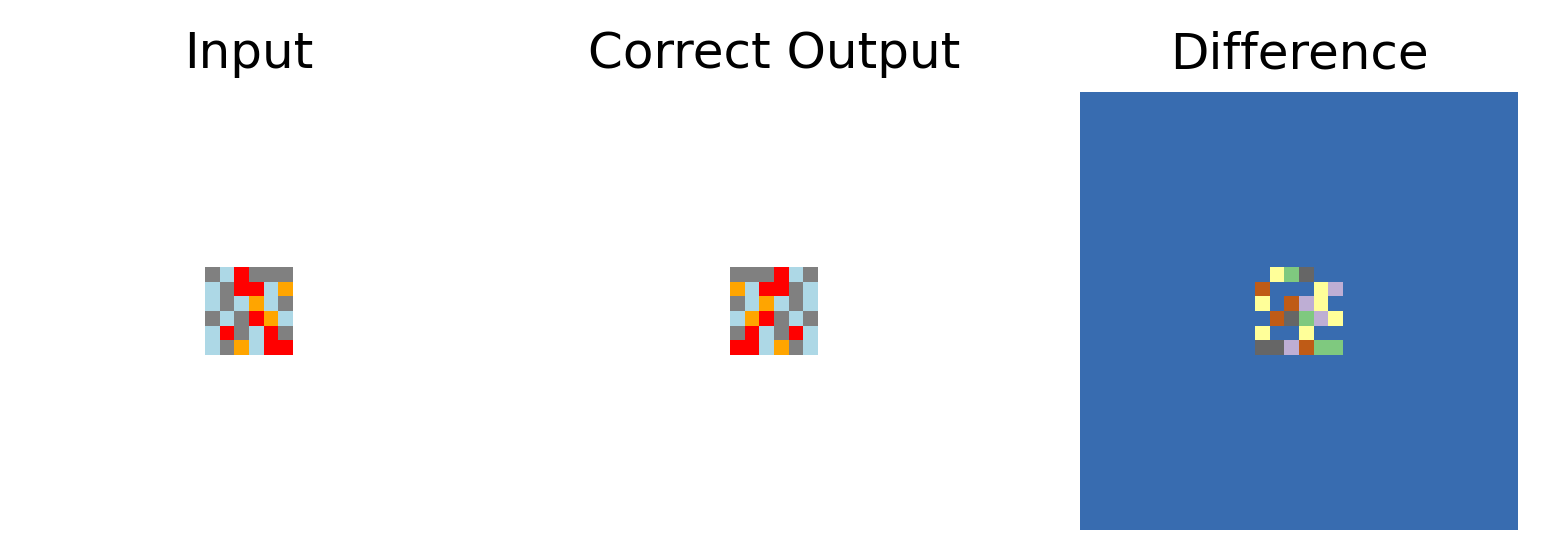

3: 67a3c6ac - Example #3:


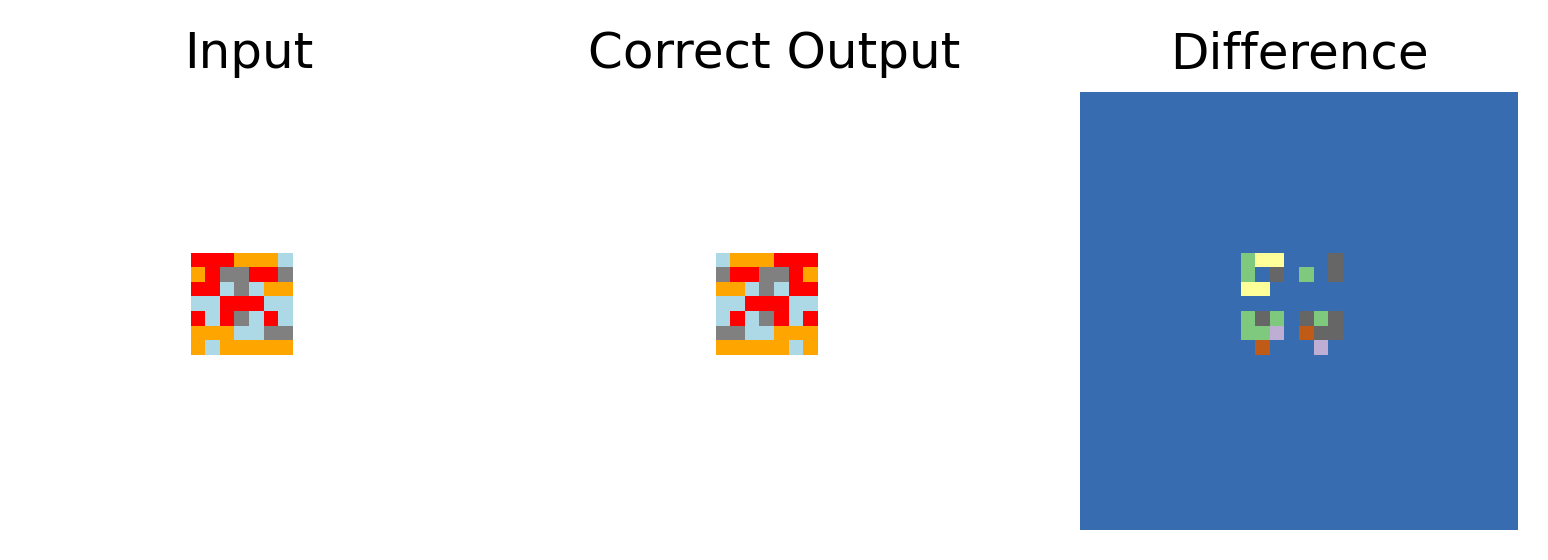

4: 68b16354 - Example #1:


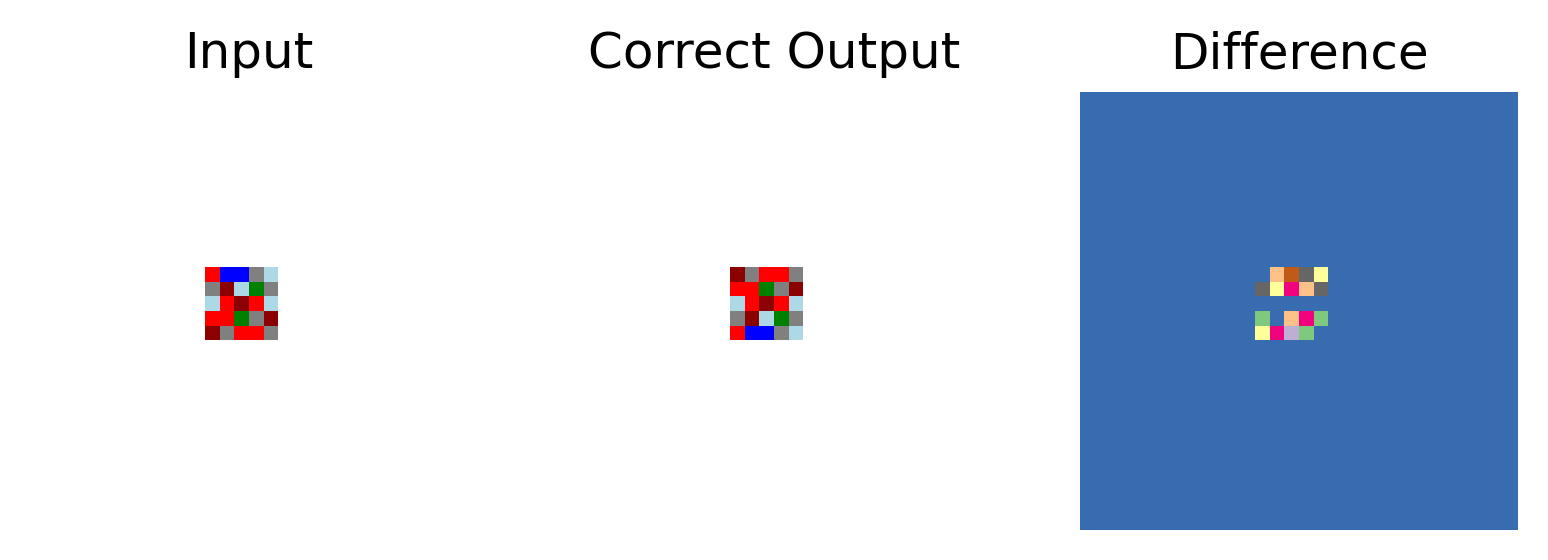

5: 68b16354 - Example #2:


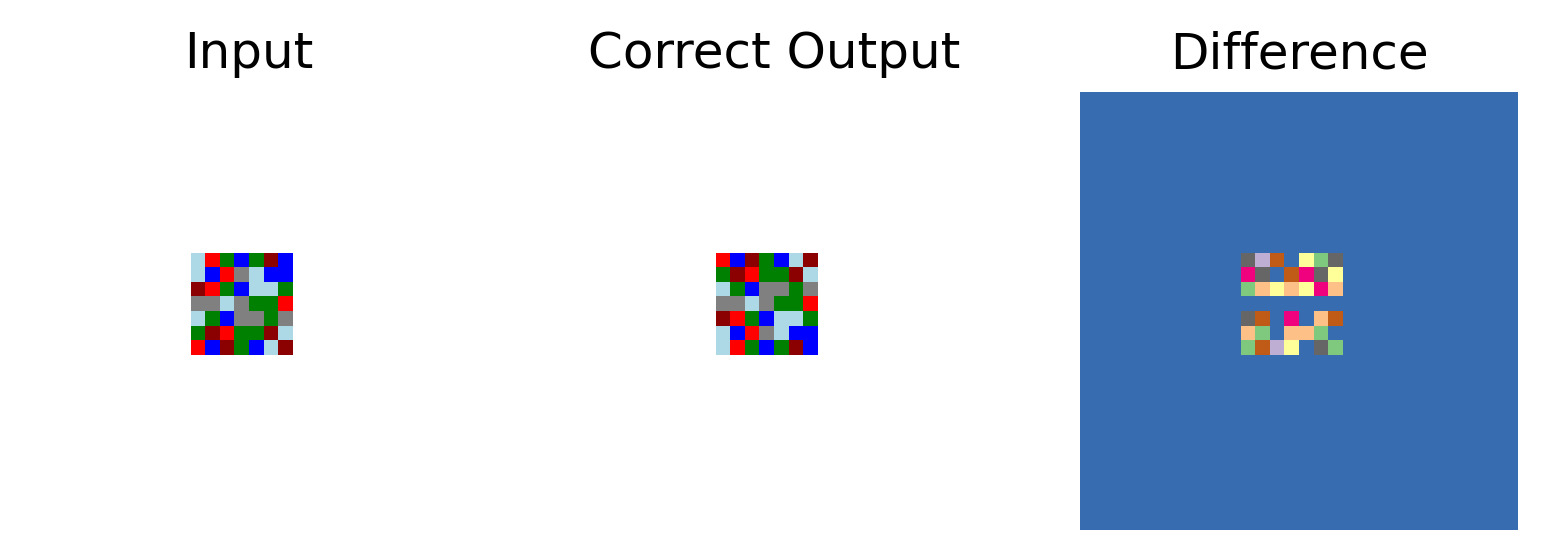

6: 68b16354 - Example #3:


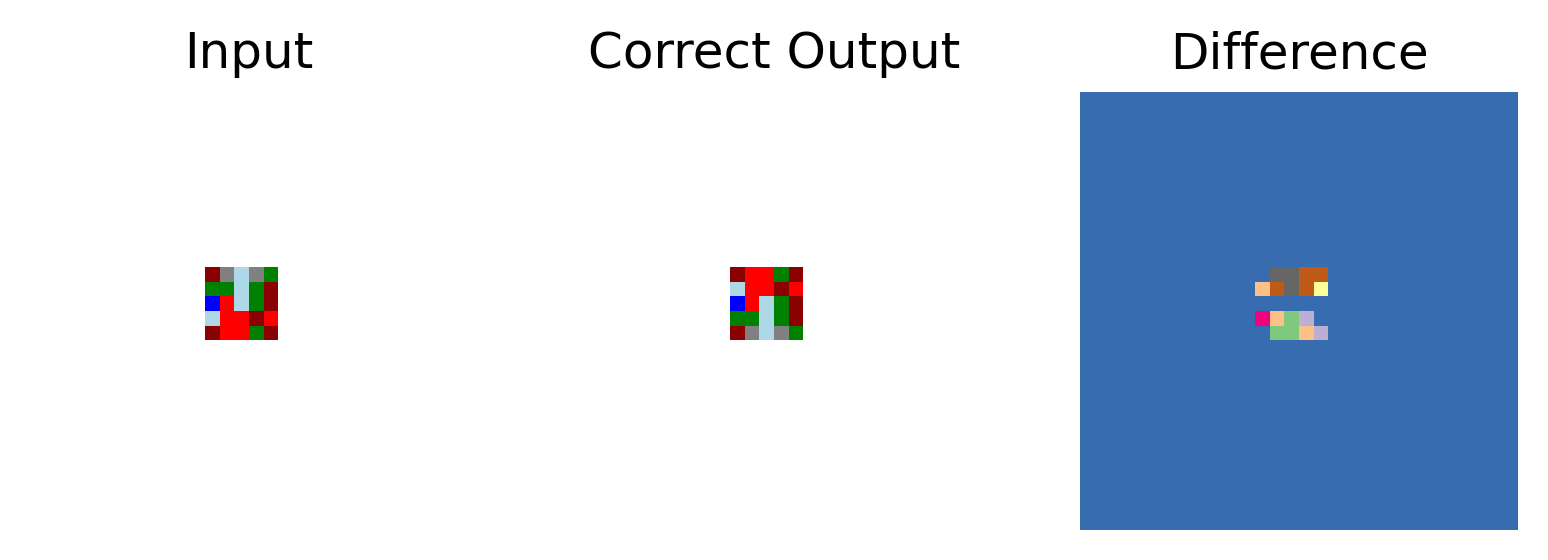

7: 74dd1130 - Example #1:


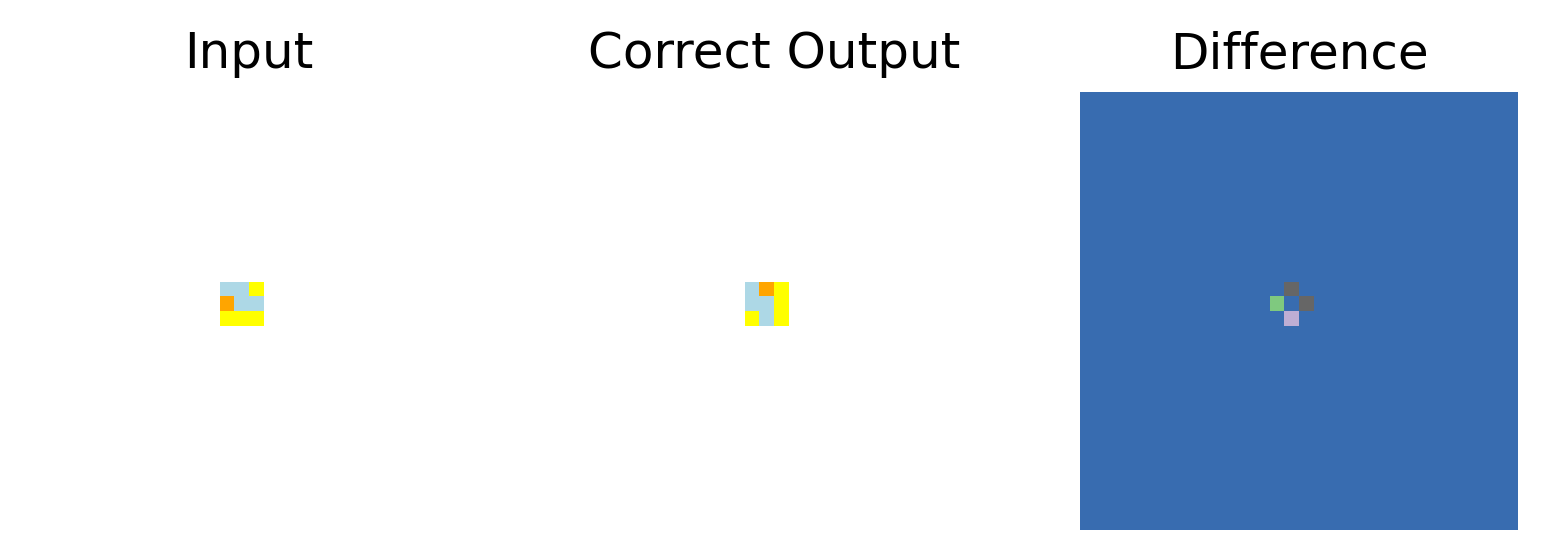

8: 74dd1130 - Example #2:


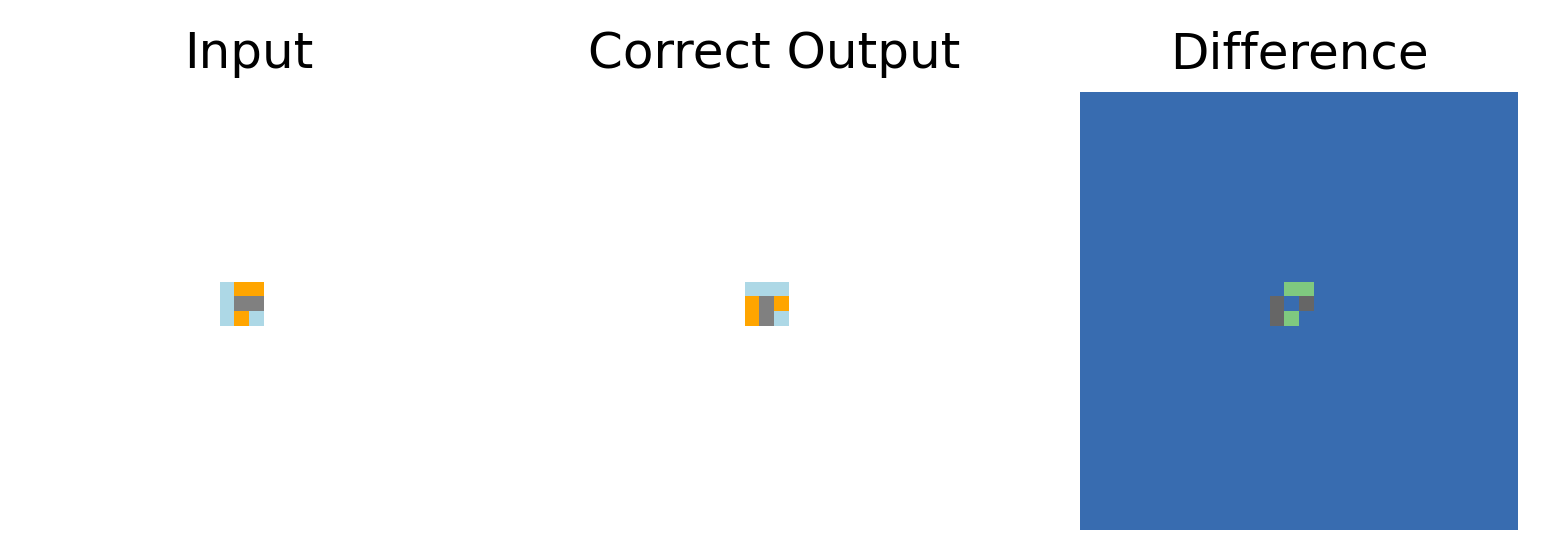

9: 74dd1130 - Example #3:


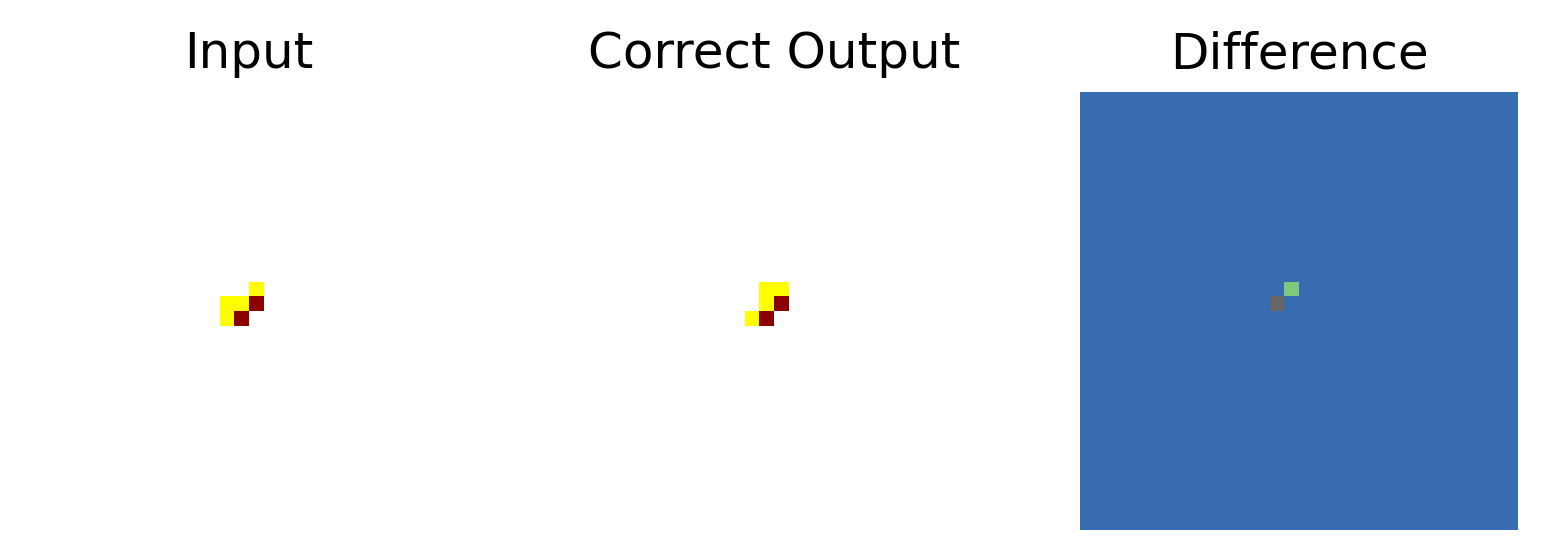

10: 74dd1130 - Example #4:


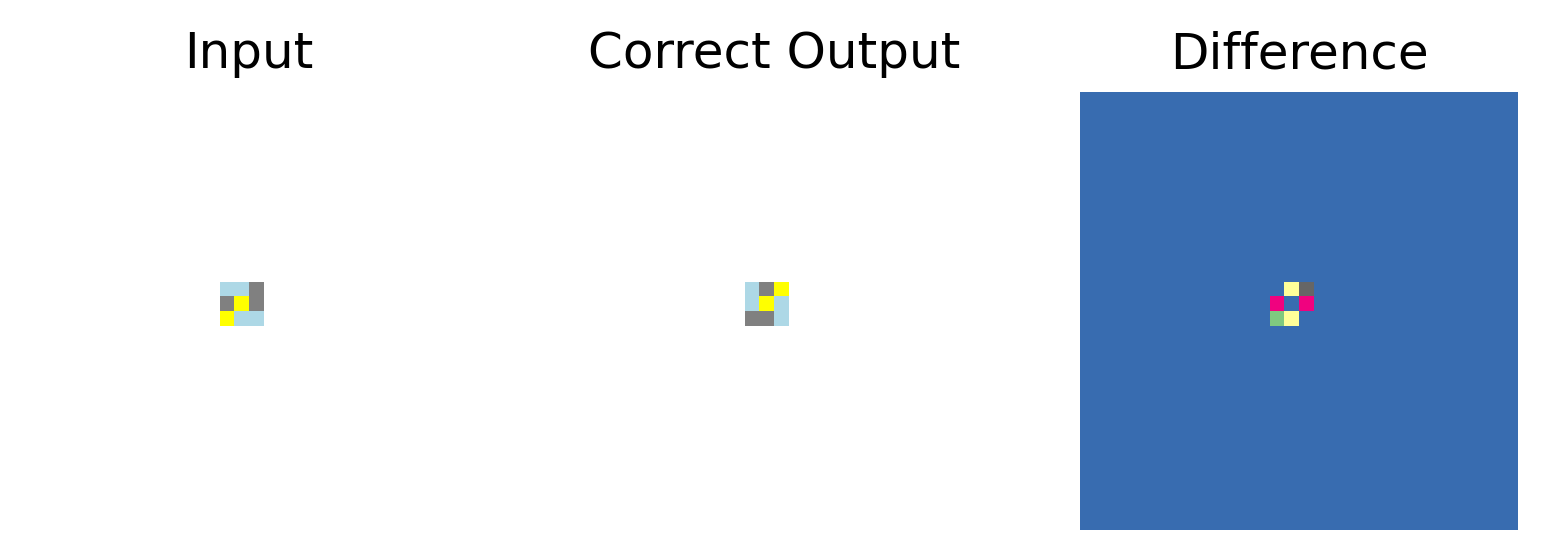

11: 3c9b0459 - Example #1:


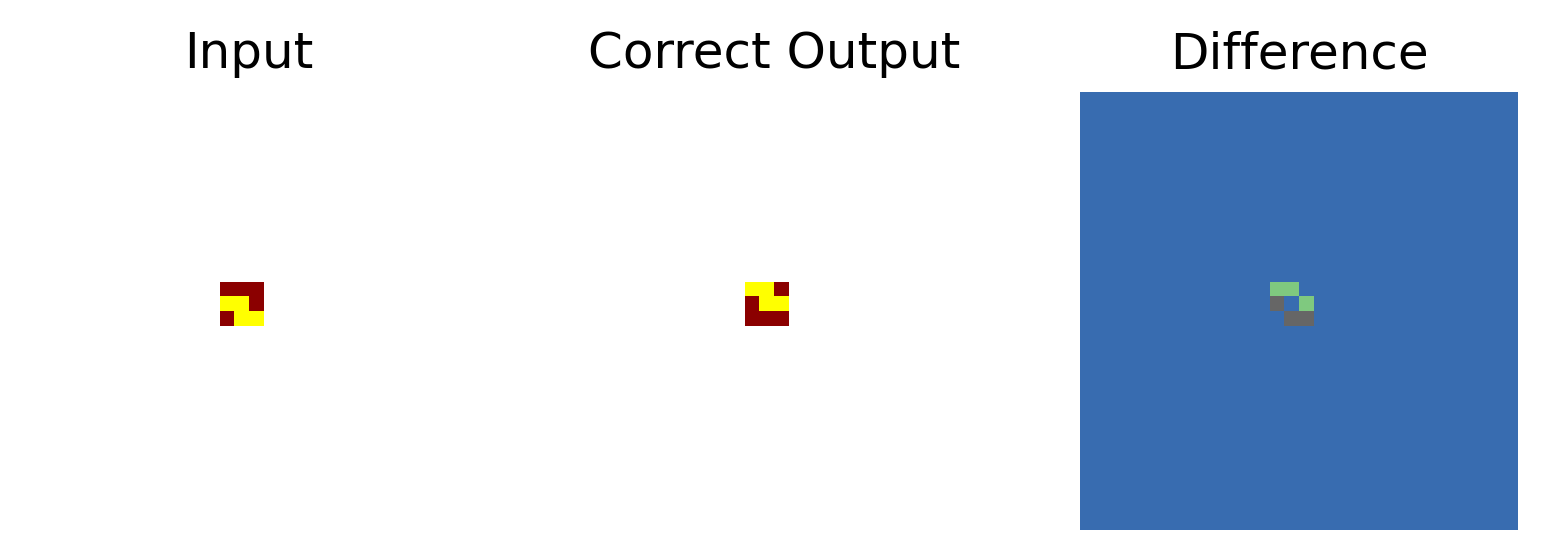

12: 3c9b0459 - Example #2:


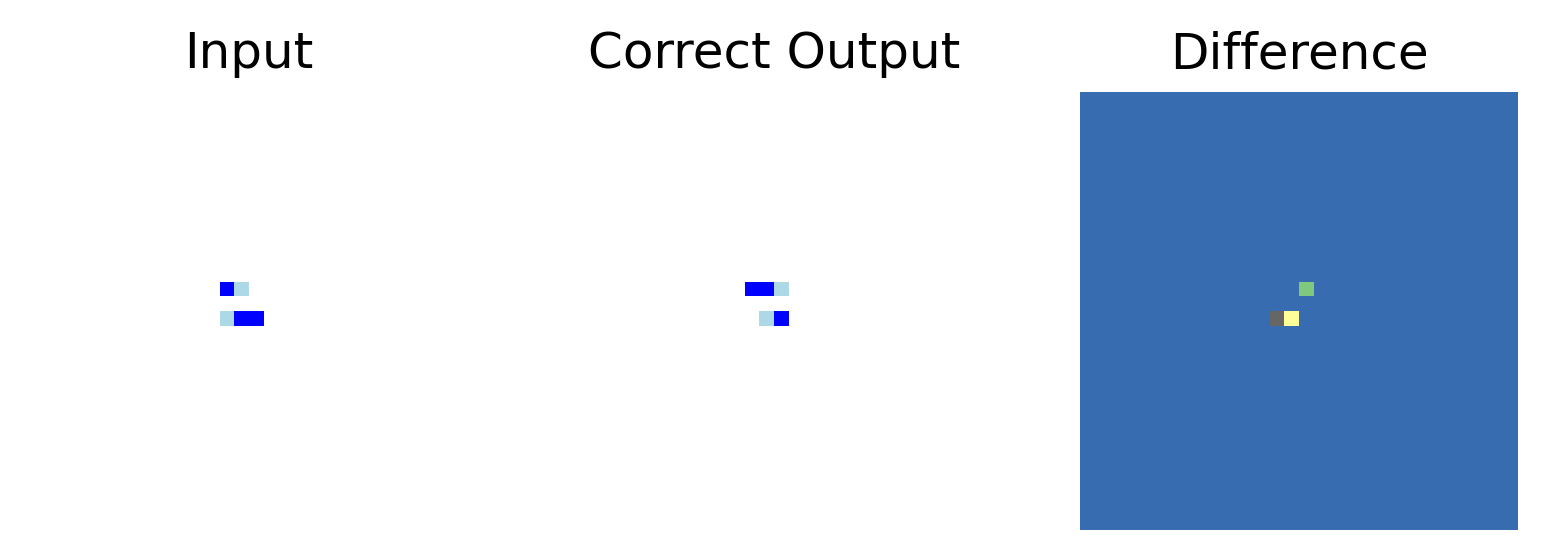

13: 3c9b0459 - Example #3:


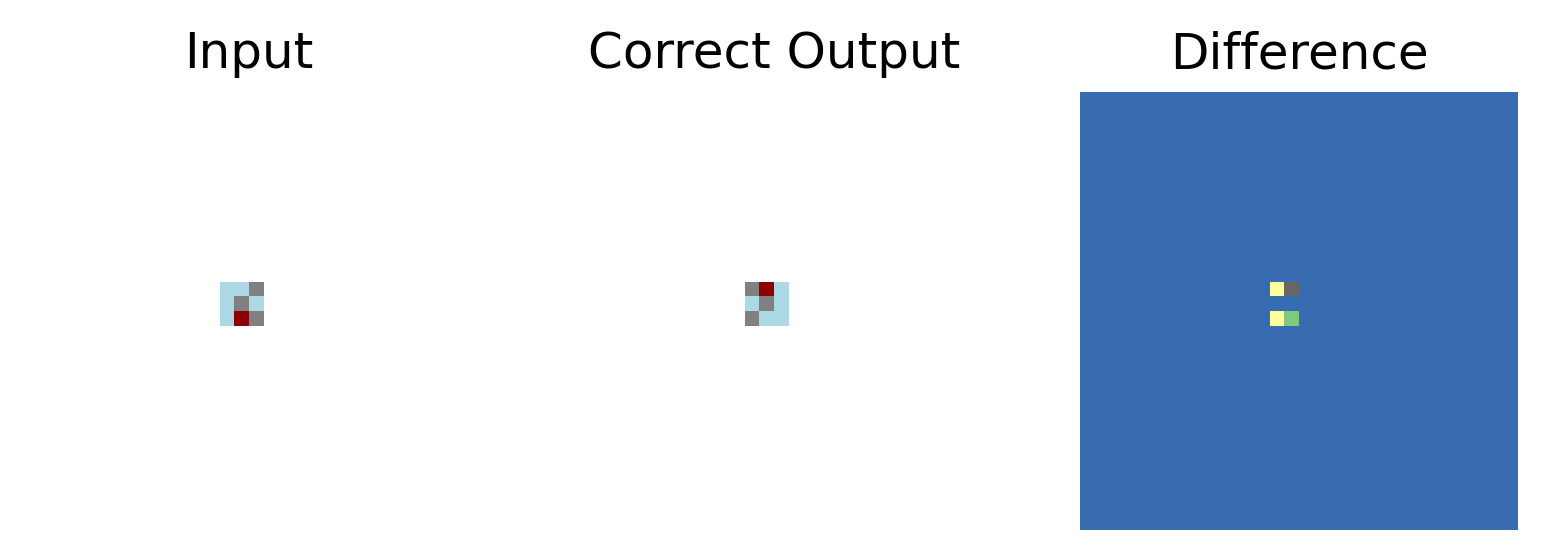

14: 3c9b0459 - Example #4:


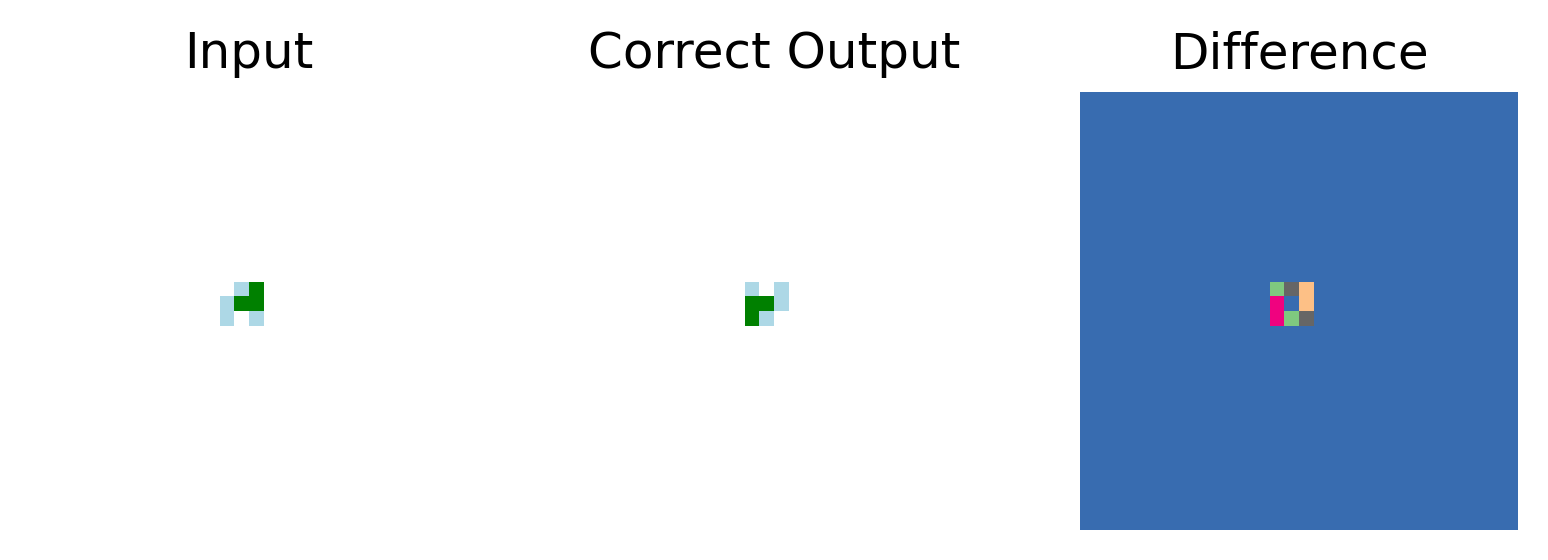

15: 6150a2bd - Example #1:


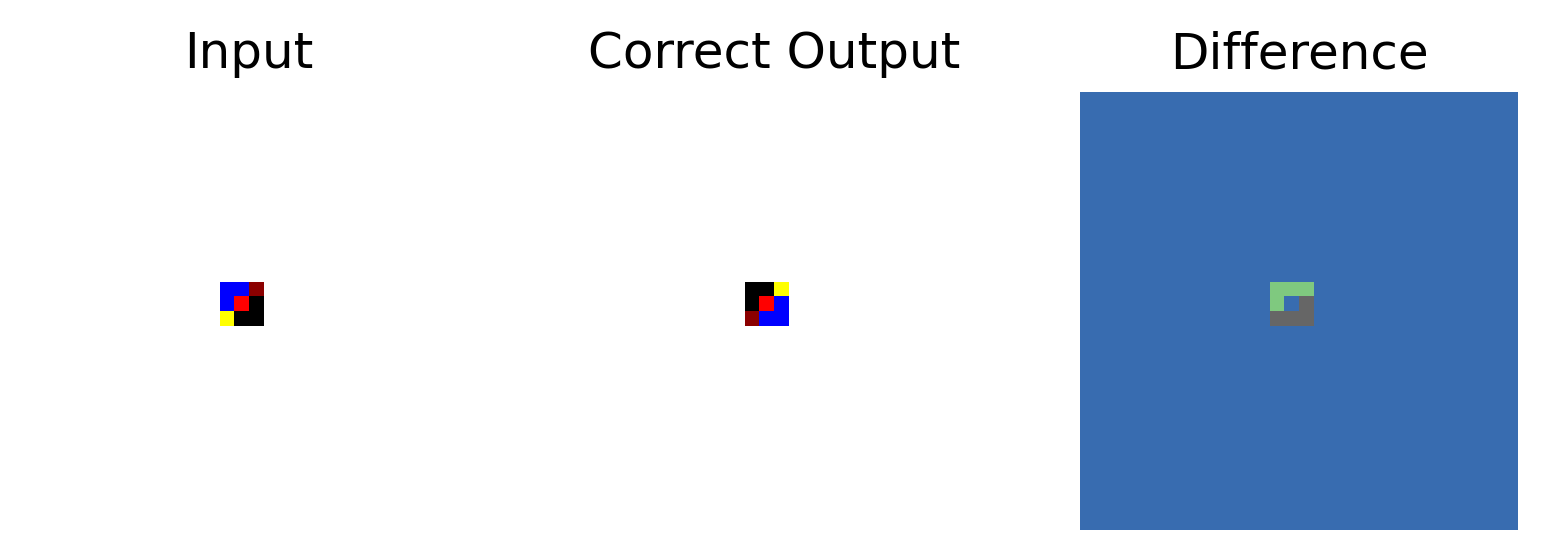

16: 6150a2bd - Example #2:


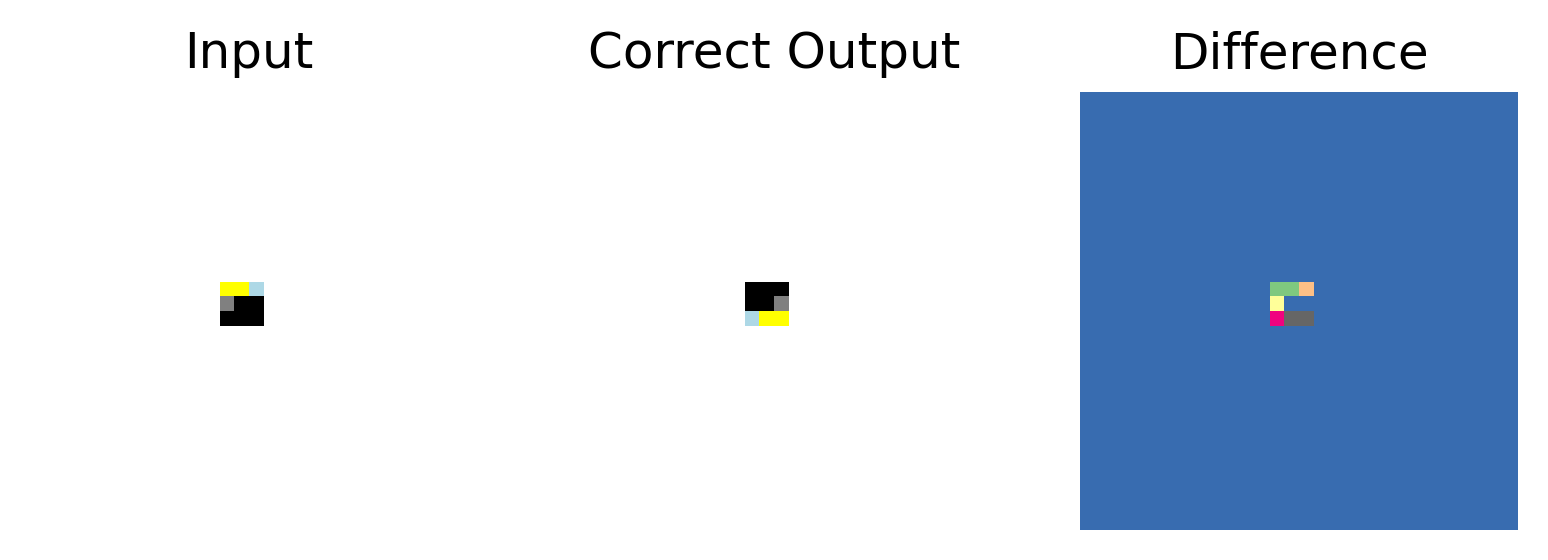

17: 9172f3a0 - Example #1:


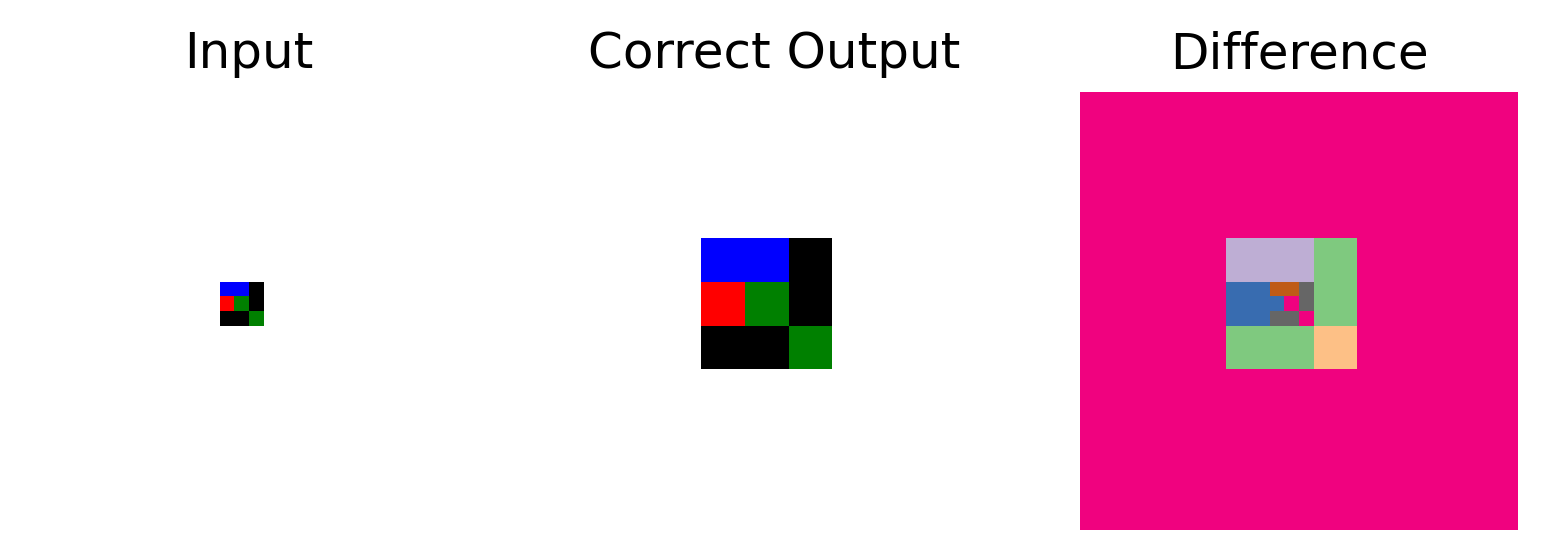

18: 9172f3a0 - Example #2:


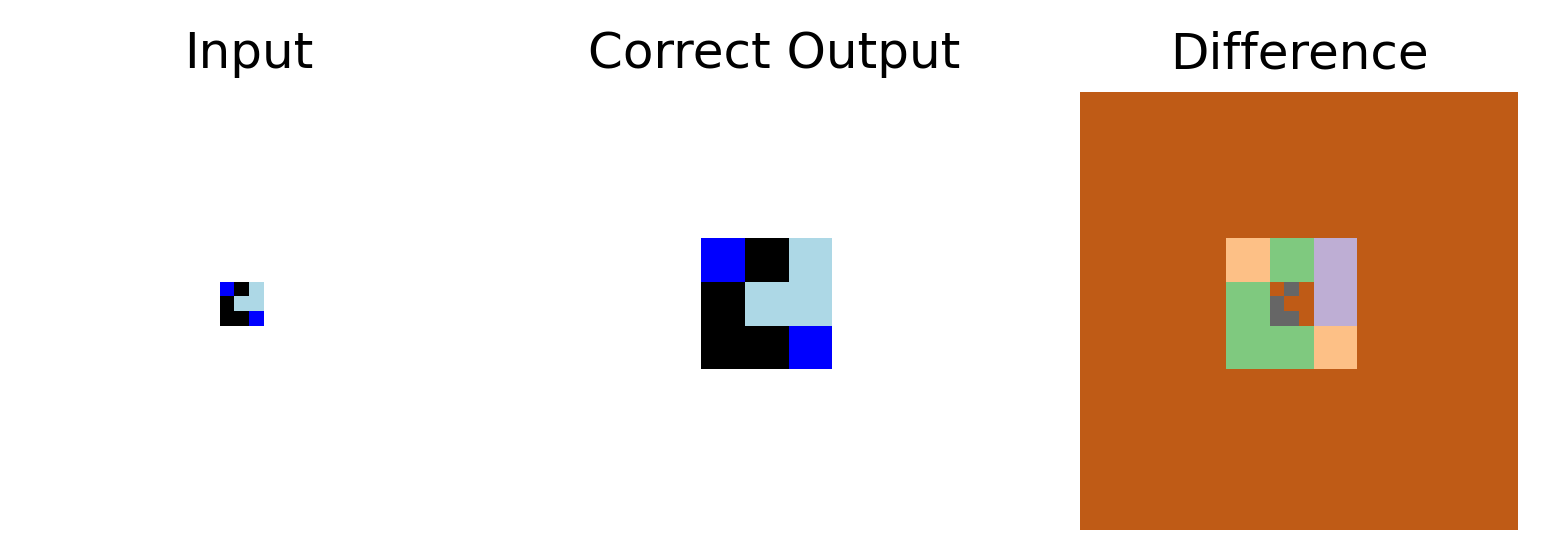

19: 9dfd6313 - Example #1:


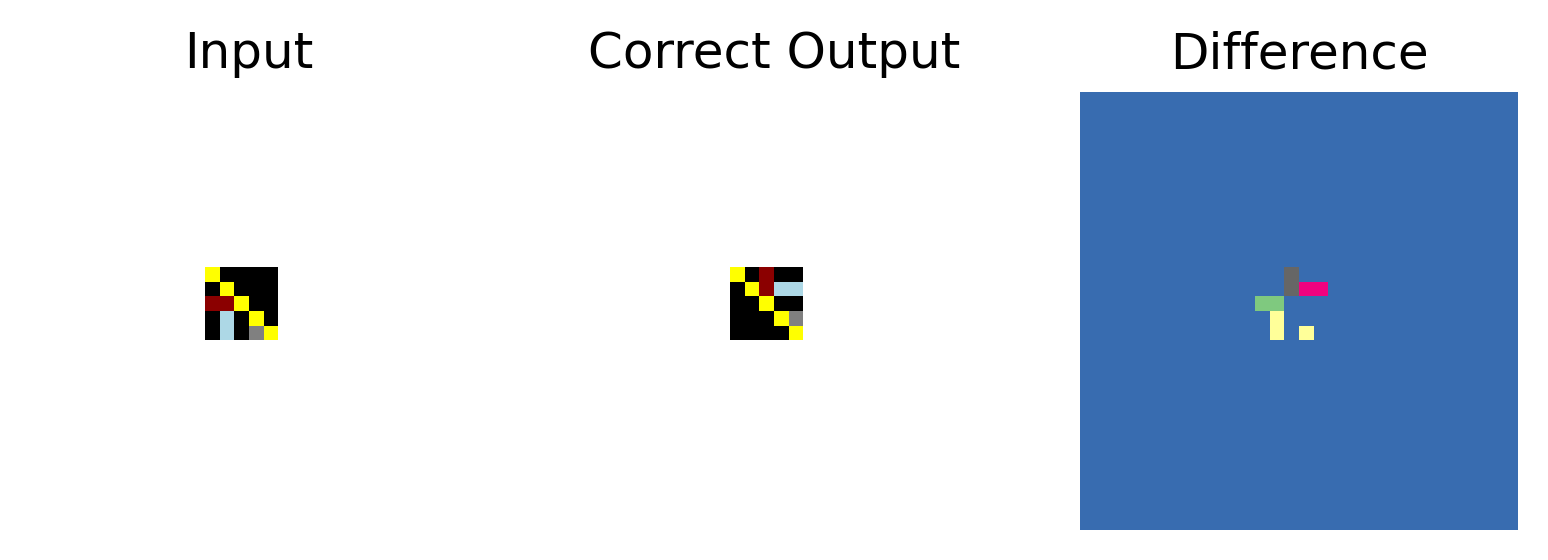

20: 9dfd6313 - Example #2:


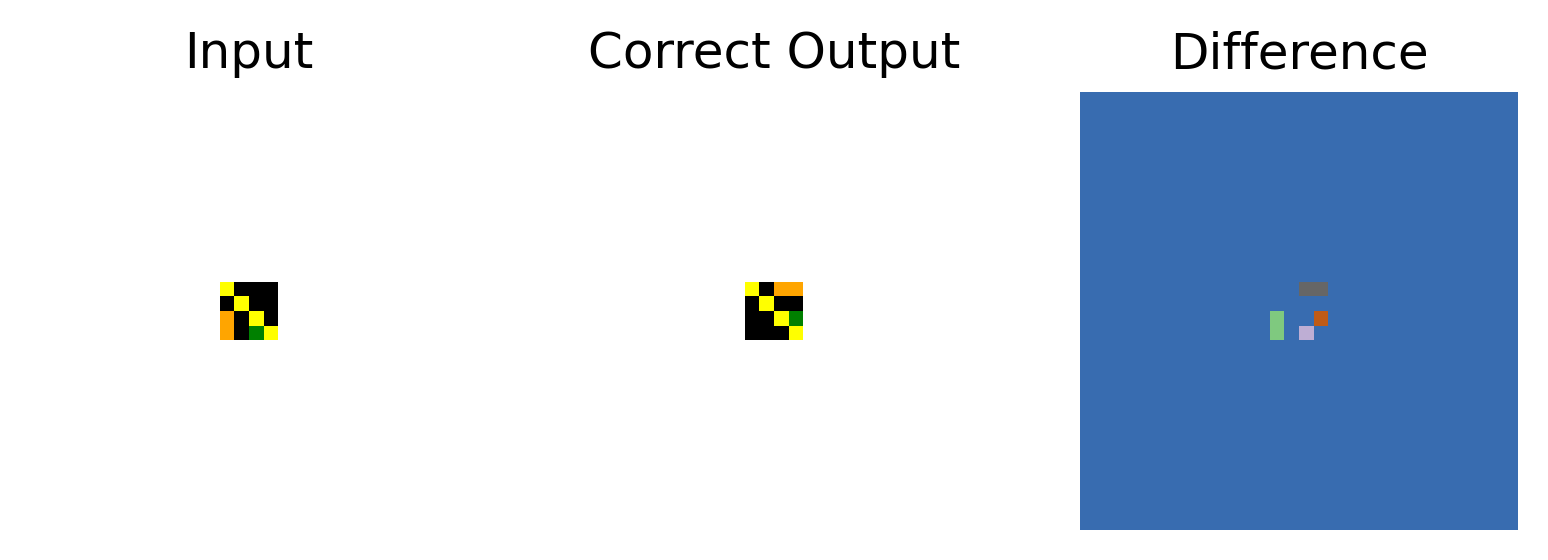

21: 9dfd6313 - Example #3:


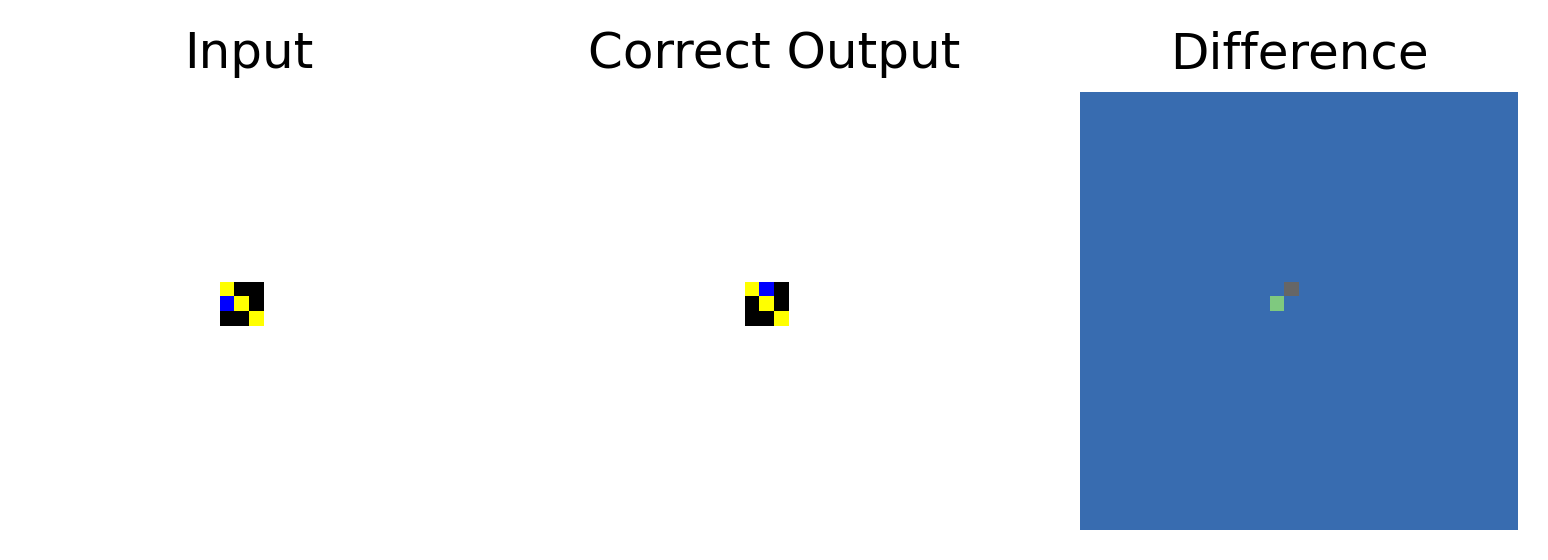

22: a416b8f3 - Example #1:


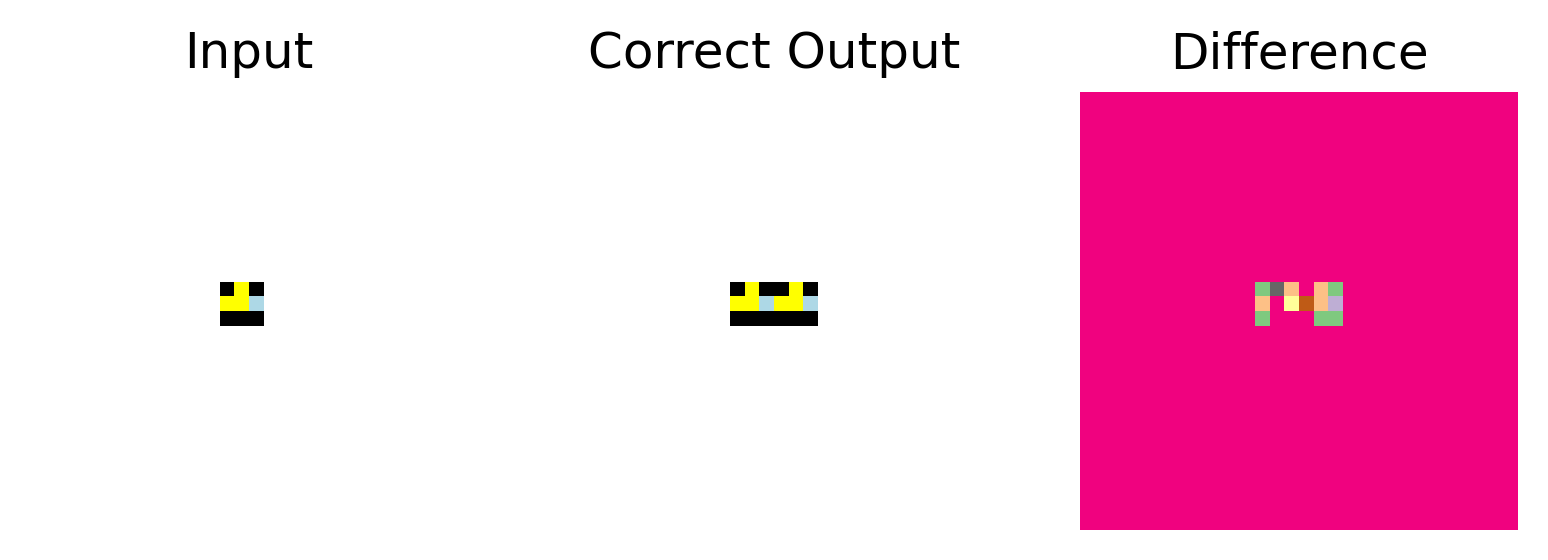

23: a416b8f3 - Example #2:


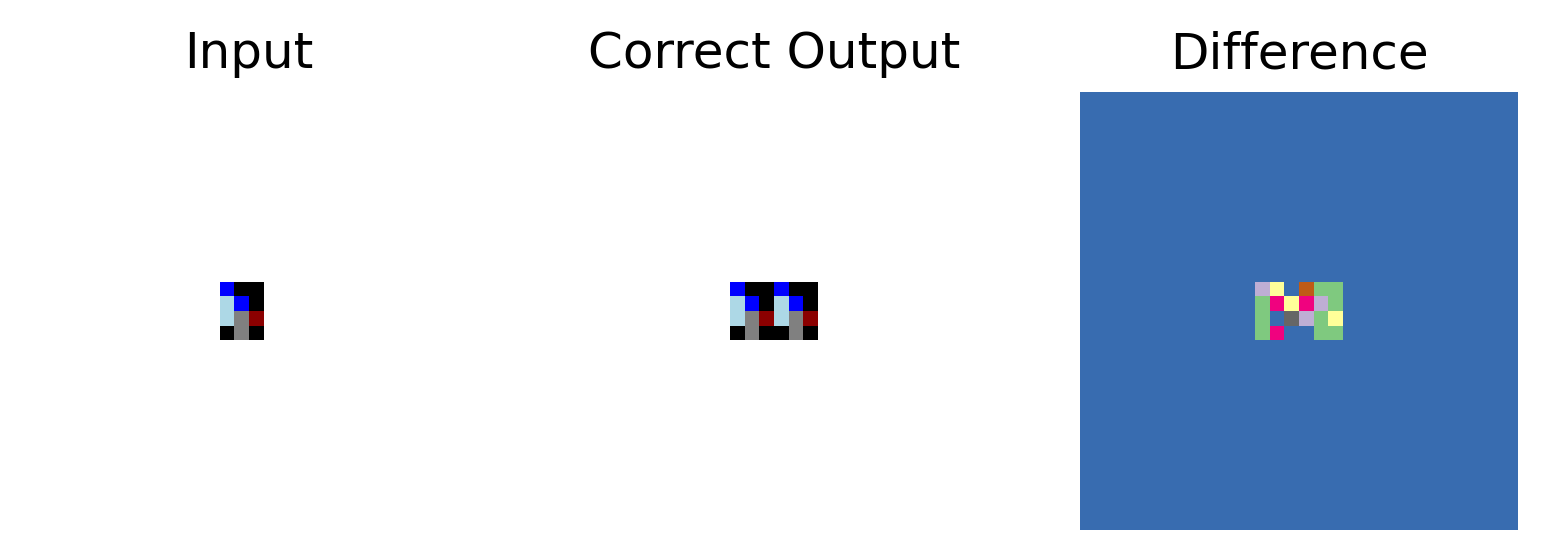

24: a416b8f3 - Example #3:


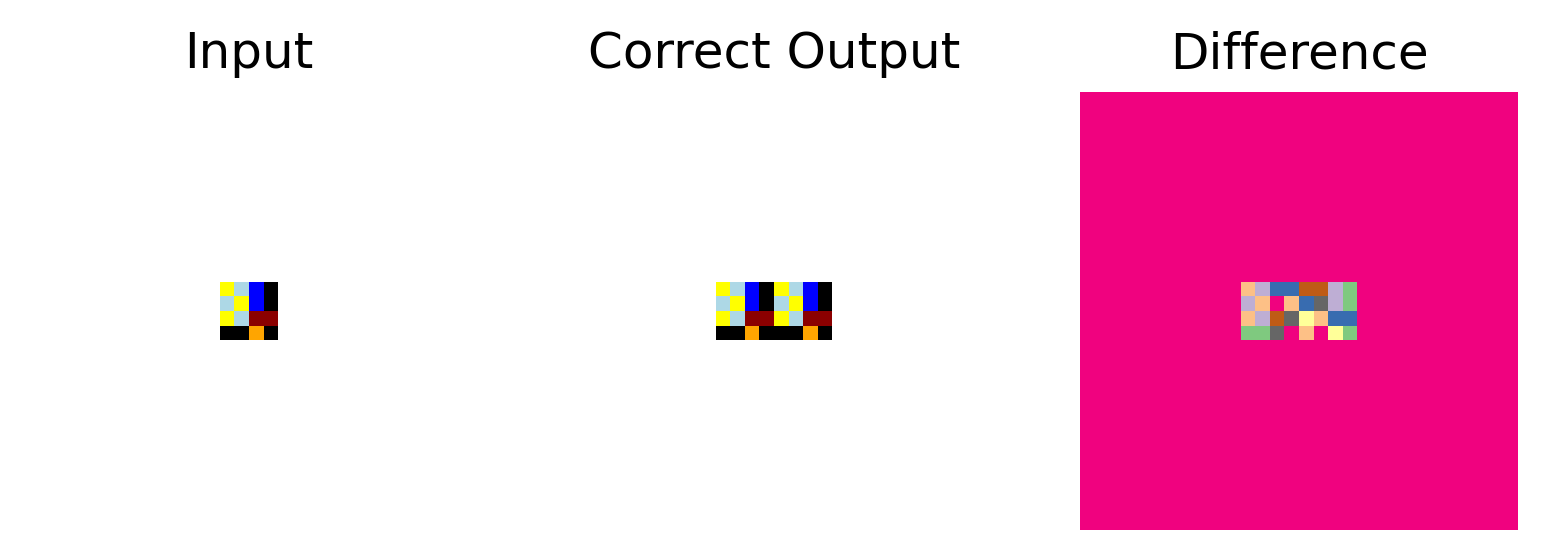

25: b1948b0a - Example #1:


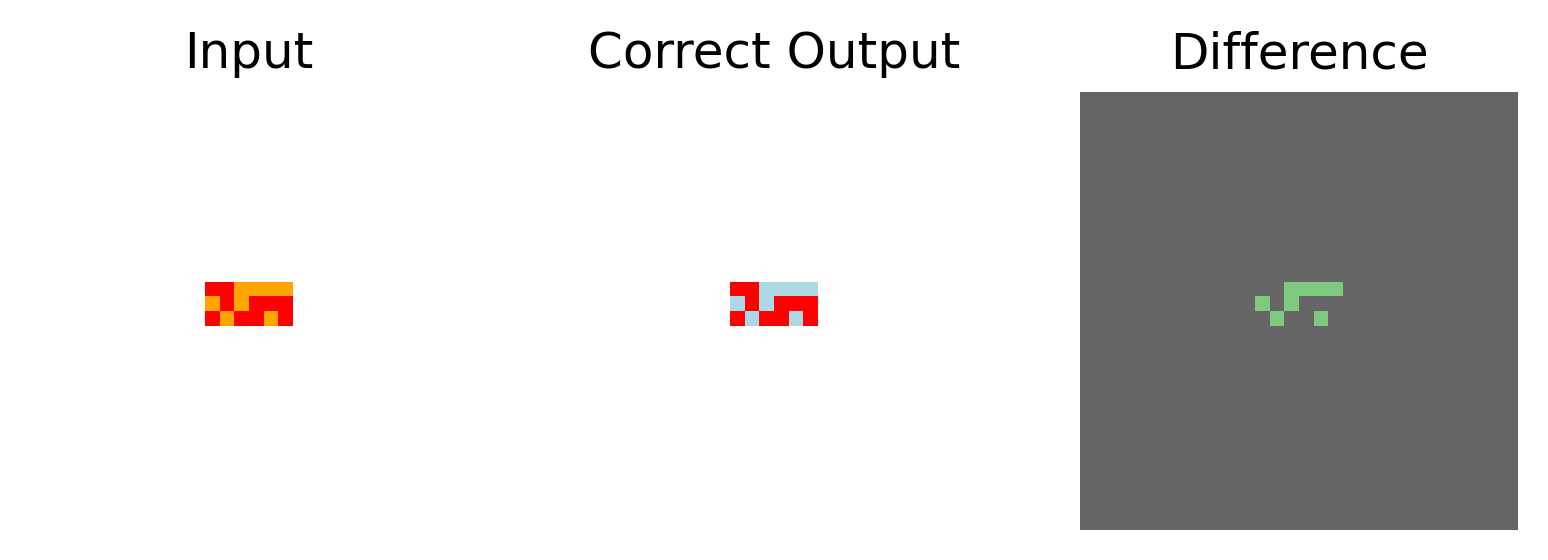

26: b1948b0a - Example #2:


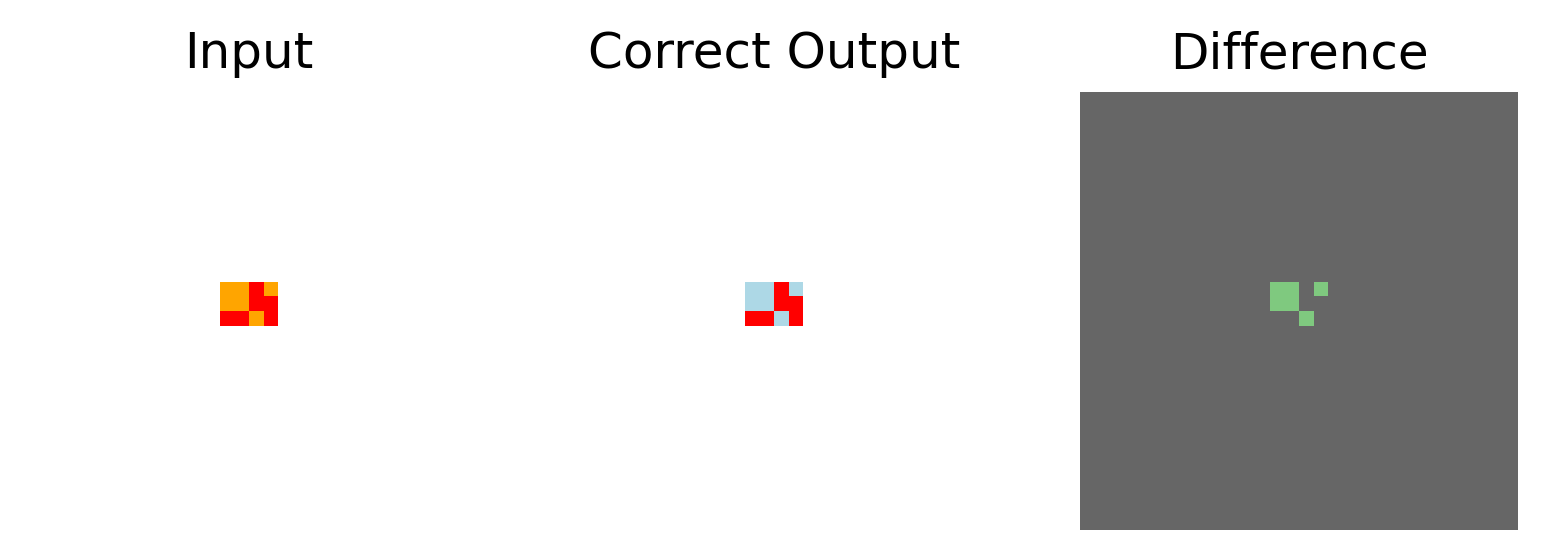

27: b1948b0a - Example #3:


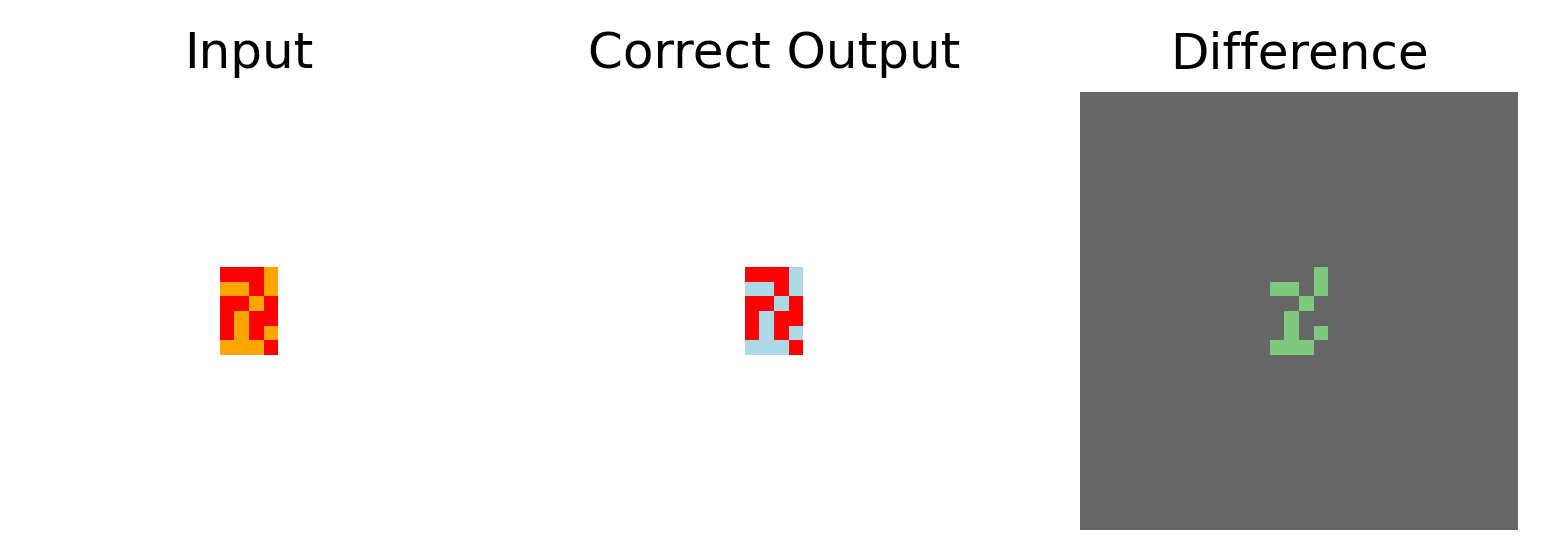

28: c59eb873 - Example #1:


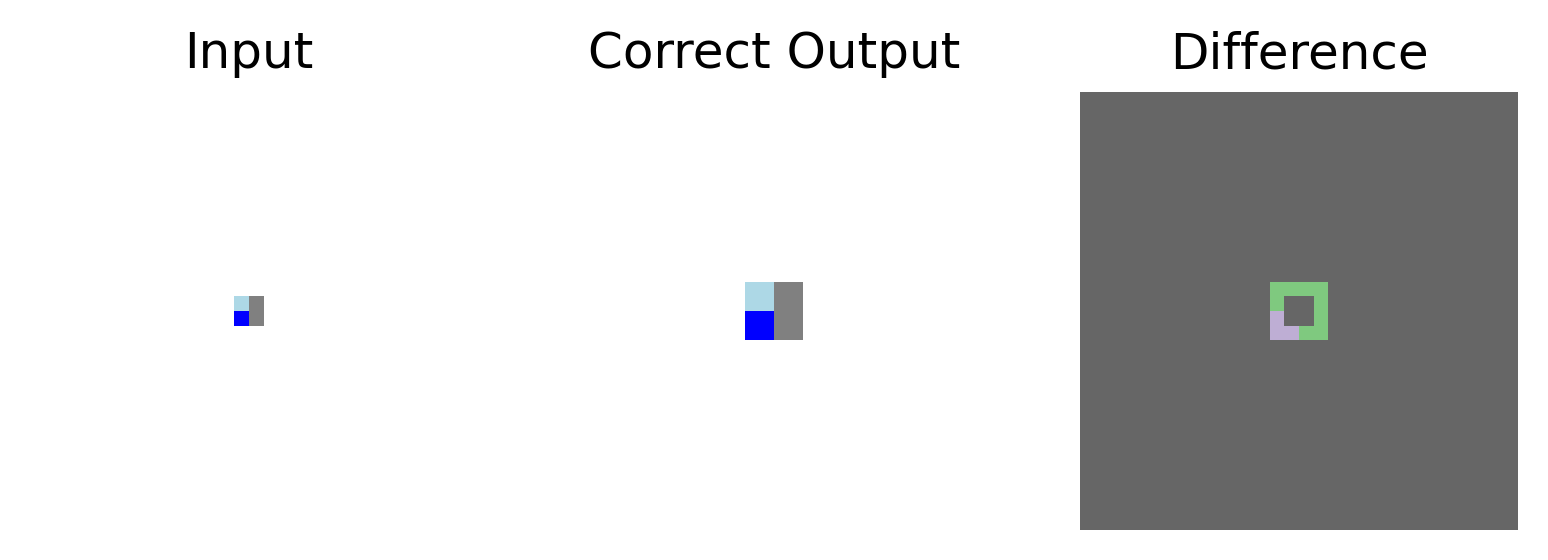

29: c59eb873 - Example #2:


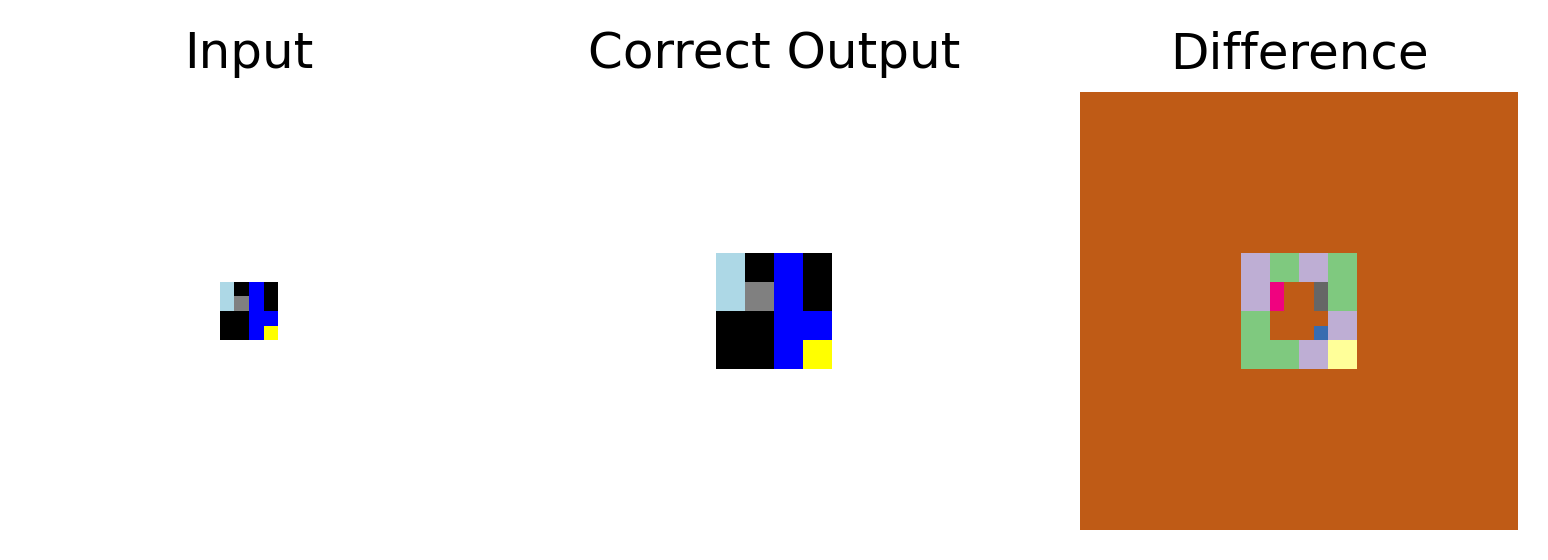

30: c59eb873 - Example #3:


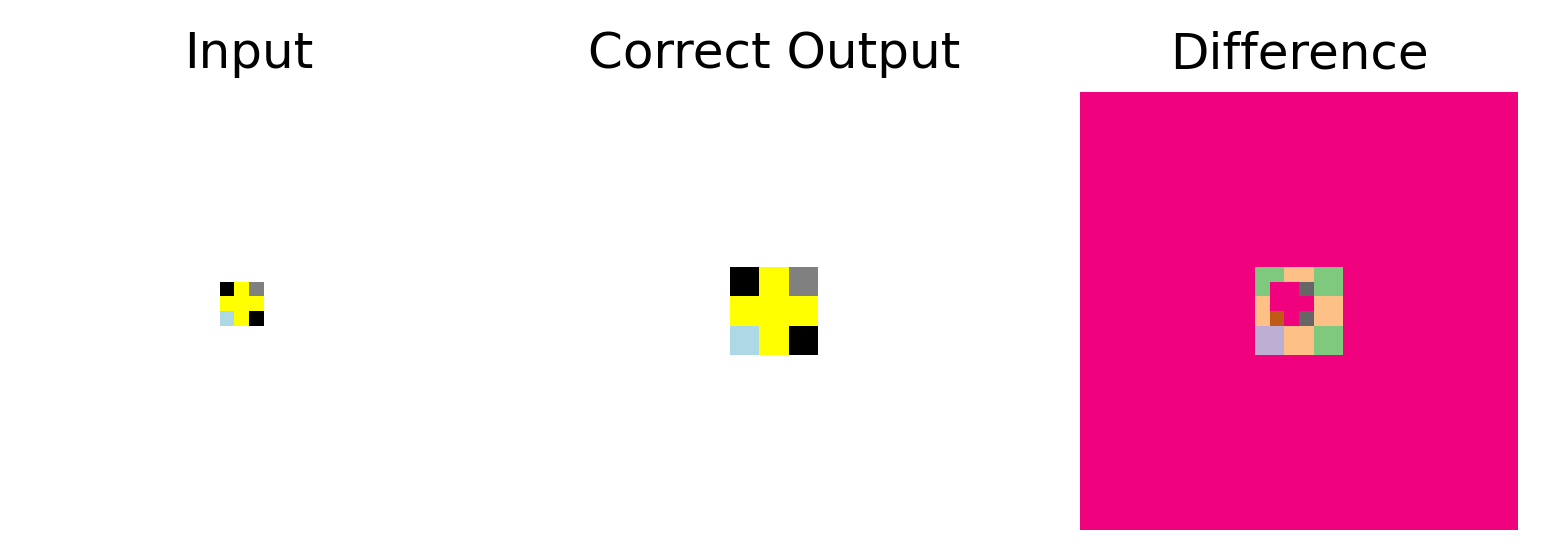

31: c8f0f002 - Example #1:


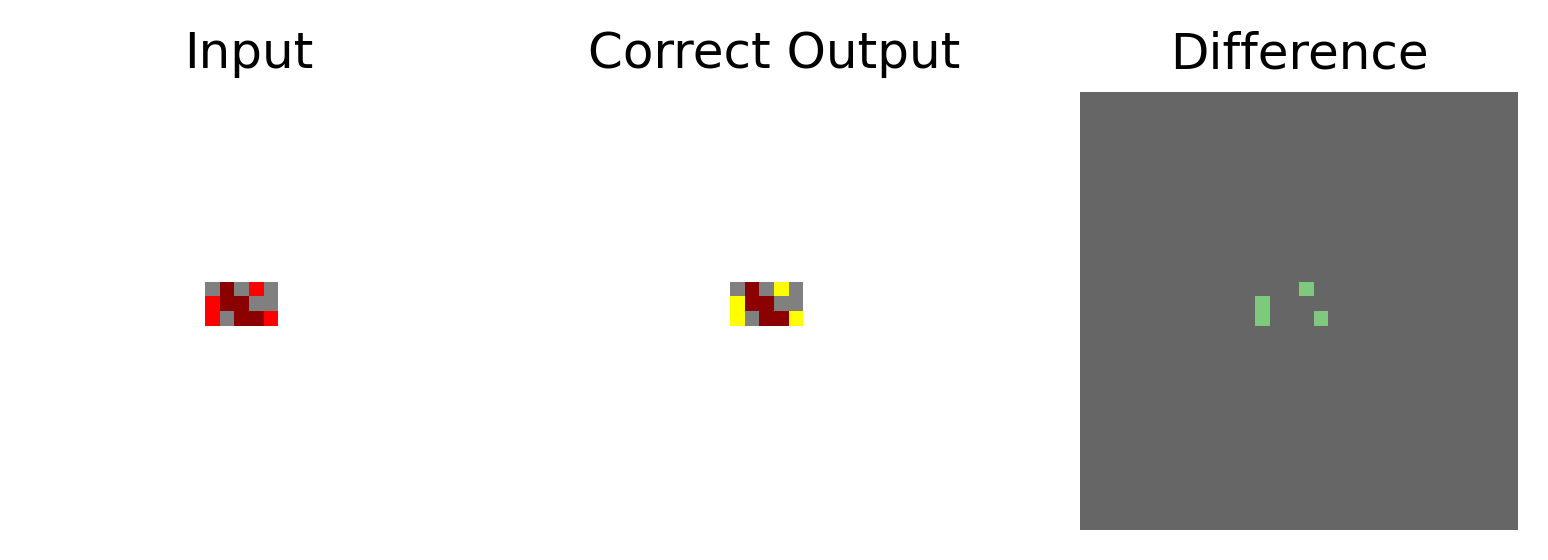

32: c8f0f002 - Example #2:


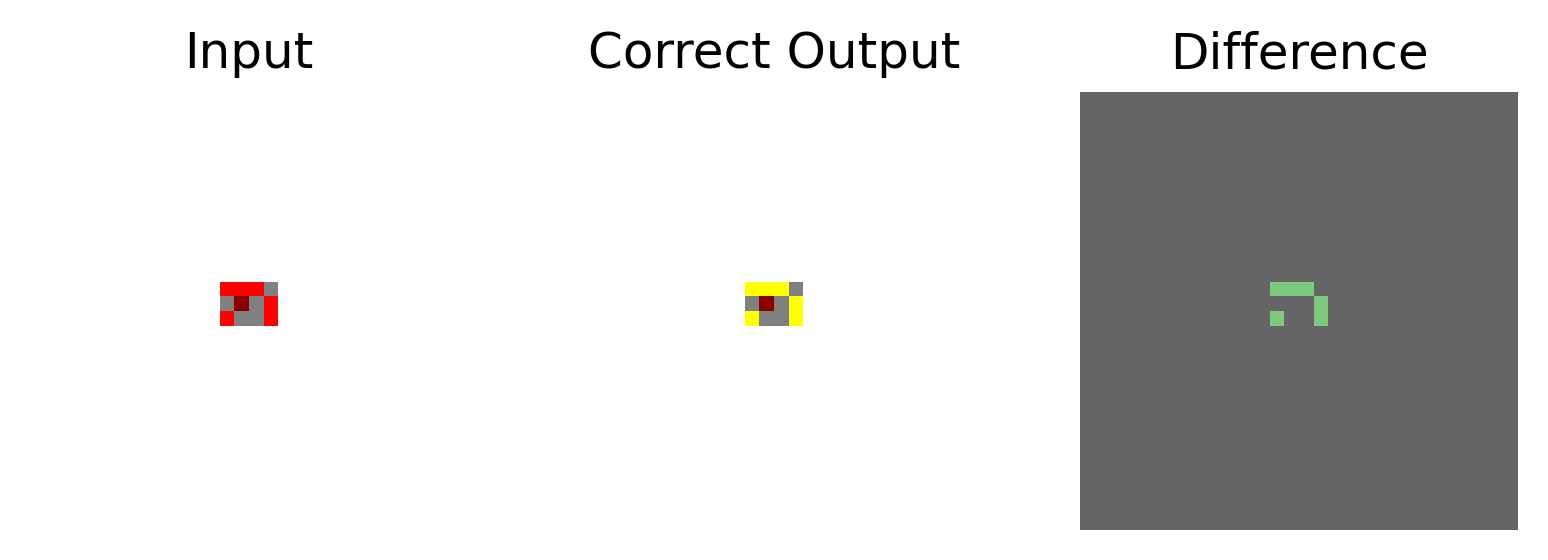

33: c8f0f002 - Example #3:


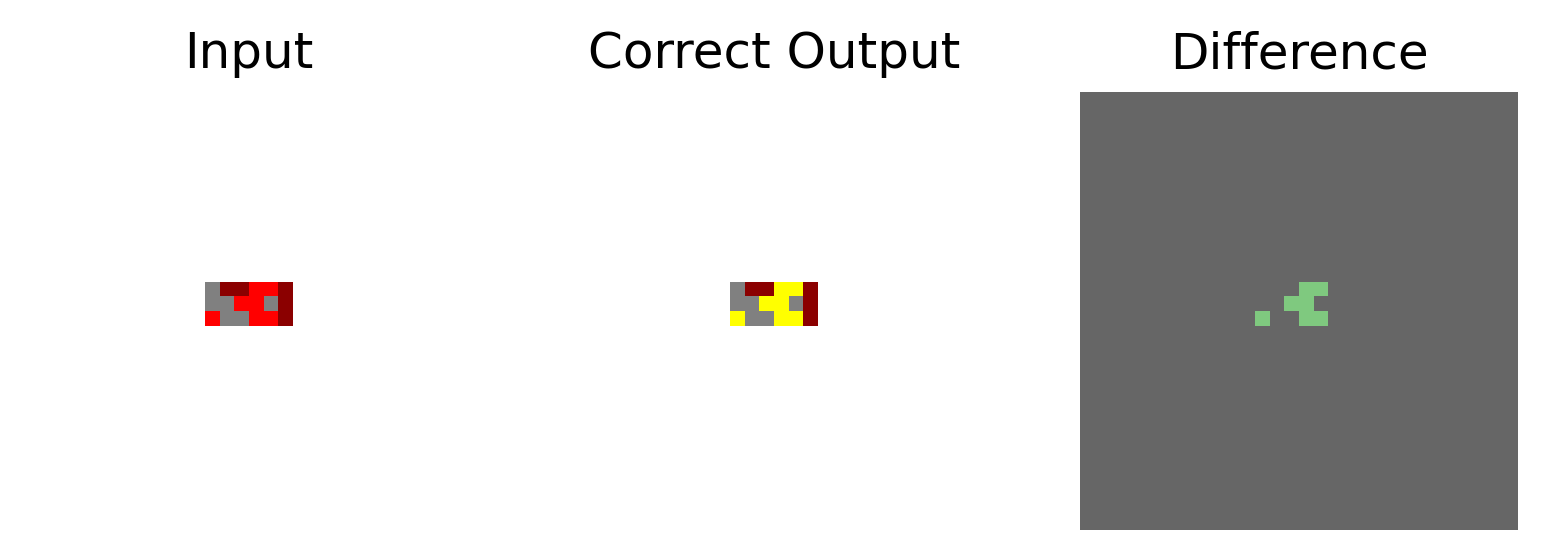

34: d10ecb37 - Example #1:


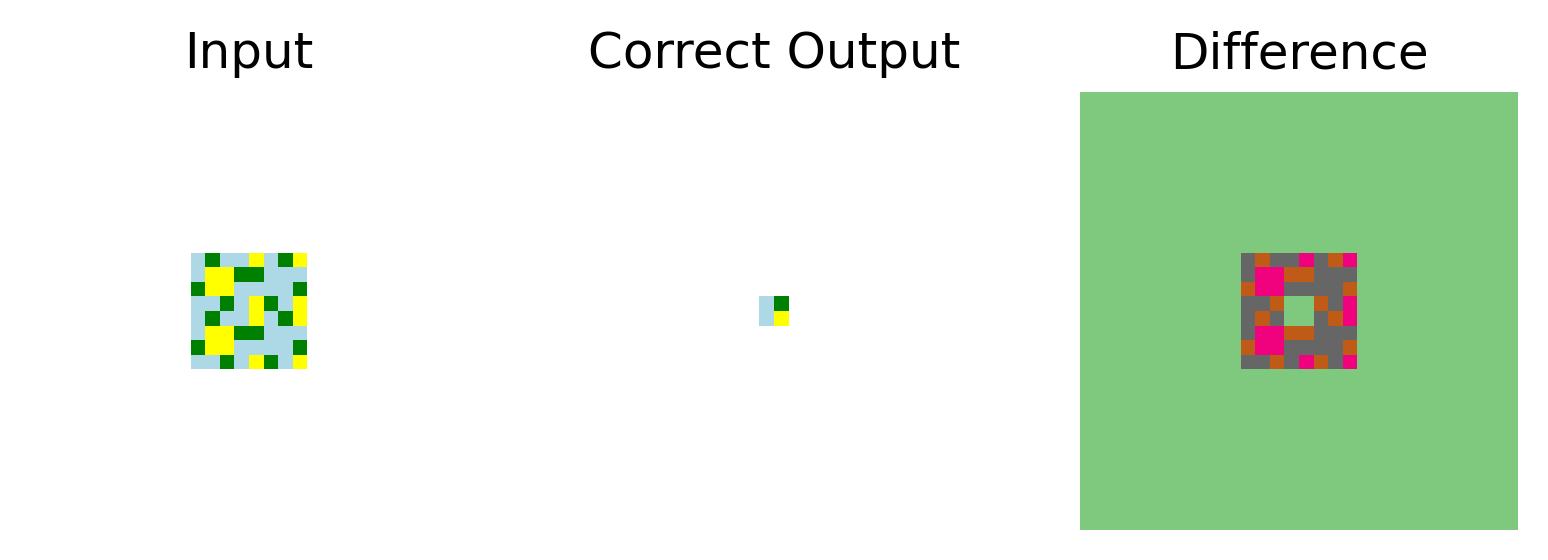

35: d10ecb37 - Example #2:


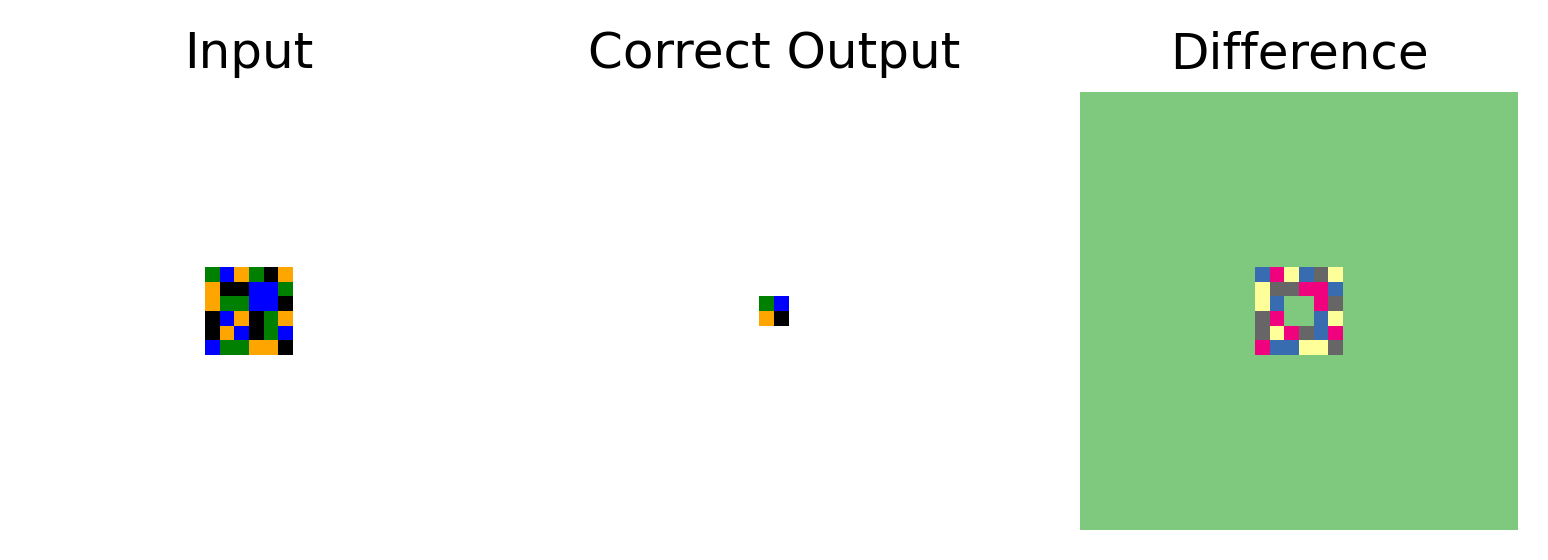

36: d10ecb37 - Example #3:


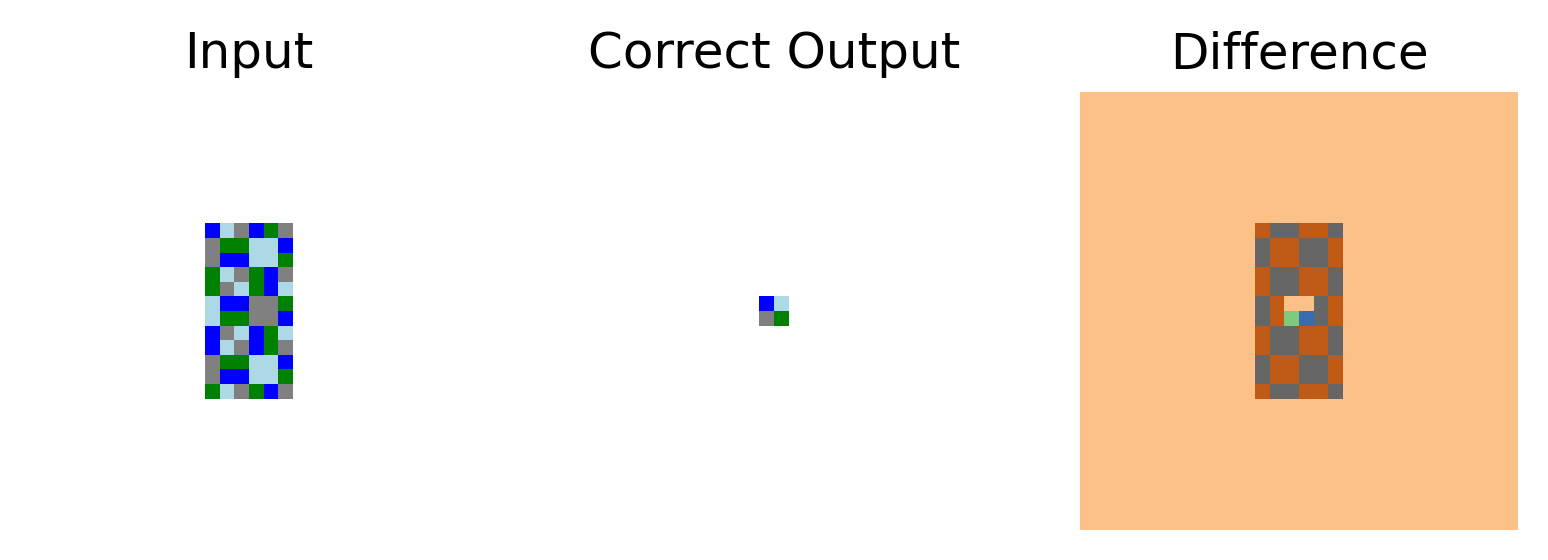

37: d511f180 - Example #1:


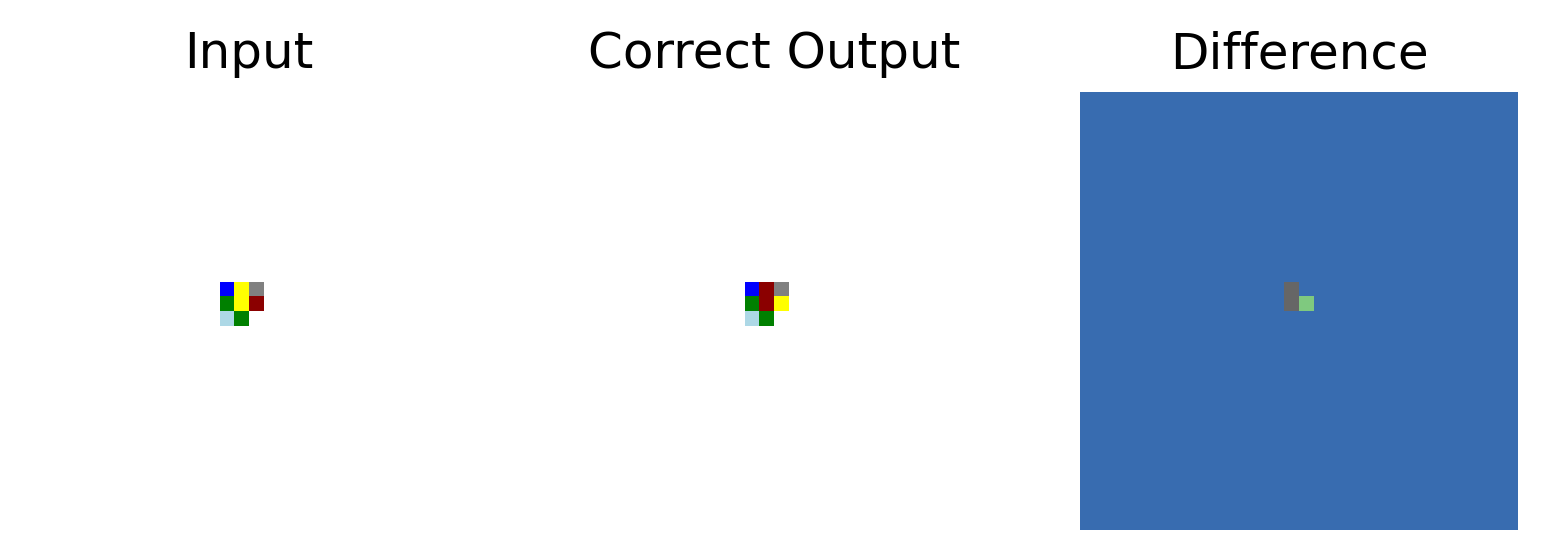

38: d511f180 - Example #2:


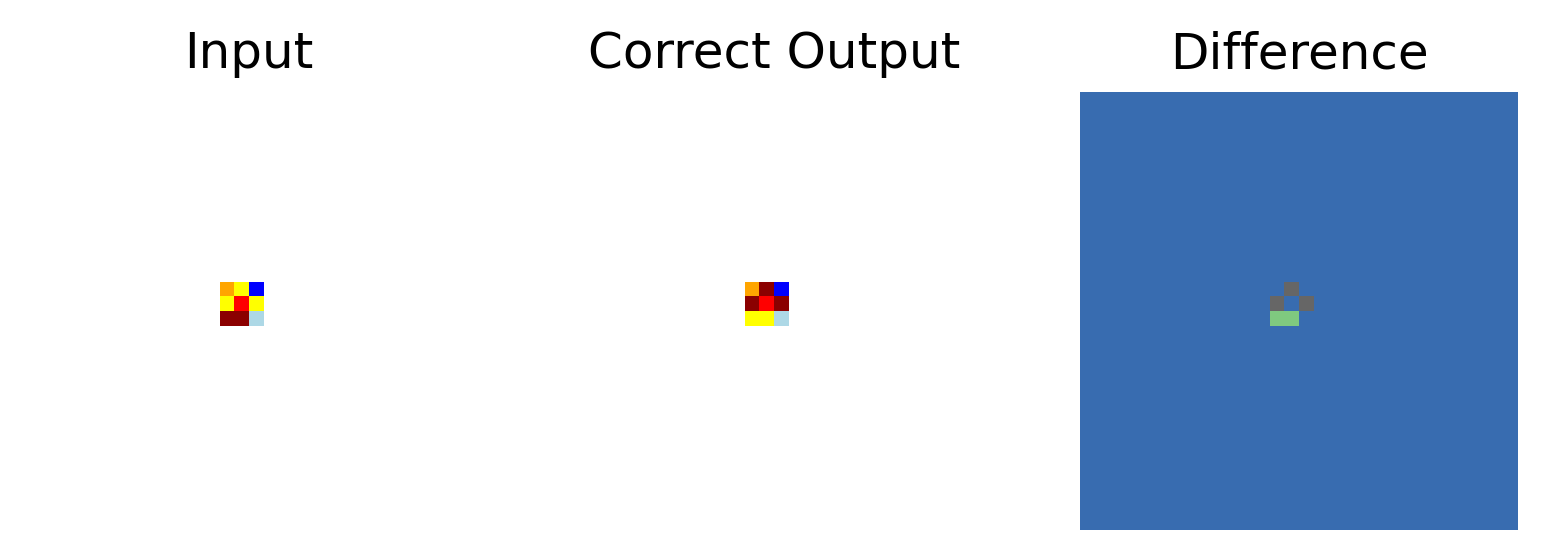

39: d511f180 - Example #3:


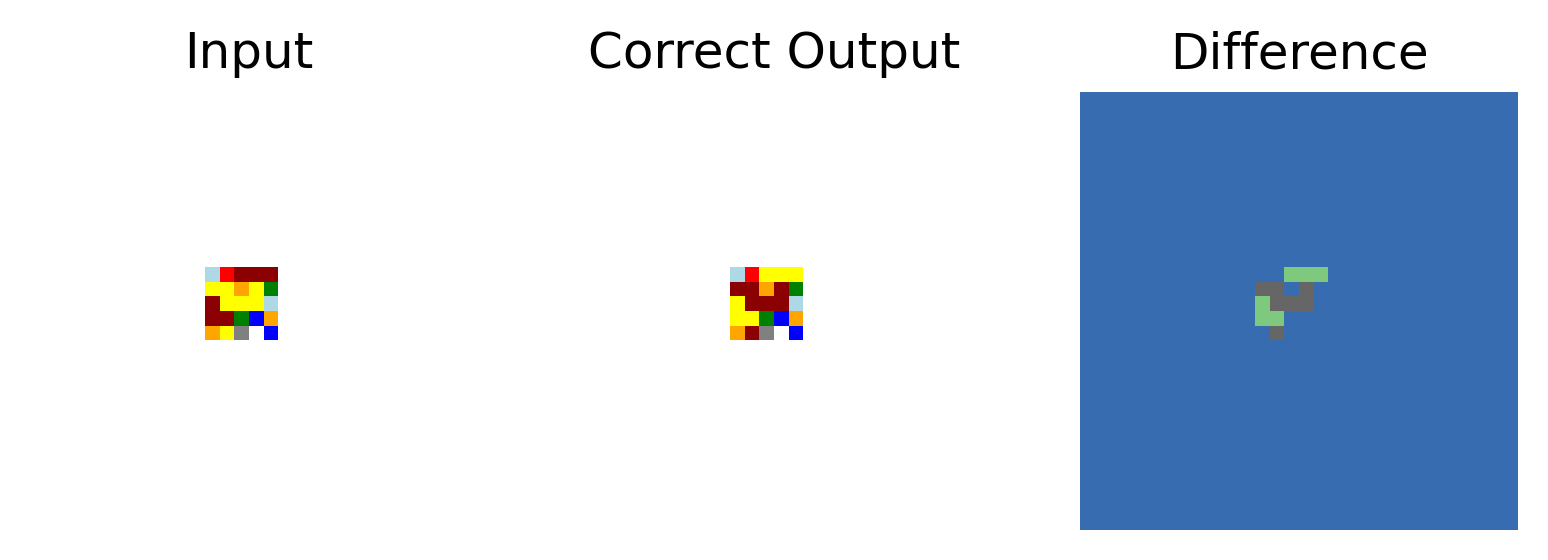

In [4]:
k = 1
for challenge_id in challenge_ids:
    try:
        
    except:
        continue

    for i, X_sample in enumerate(X_samples):
        print(f"{k}: {challenge_id} - Example #{i + 1}:")
        plot.input_and_output(
            X_sample,
            y_samples[i],
            y_pred=y_samples[i] - X_sample,
            y_pred_title='Difference',
            y_pred_cmap='Accent'
        )
        k += 1

## Structural Similarity Index Measure (SSIM)

Sources:

- https://stackoverflow.com/questions/56183201/detect-and-visualize-differences-between-two-images-with-opencv-python#answer-56193442
- https://ece.uwaterloo.ca/%7Ez70wang/publications/ssim.pdf

1: 67a3c6ac - Example #1:


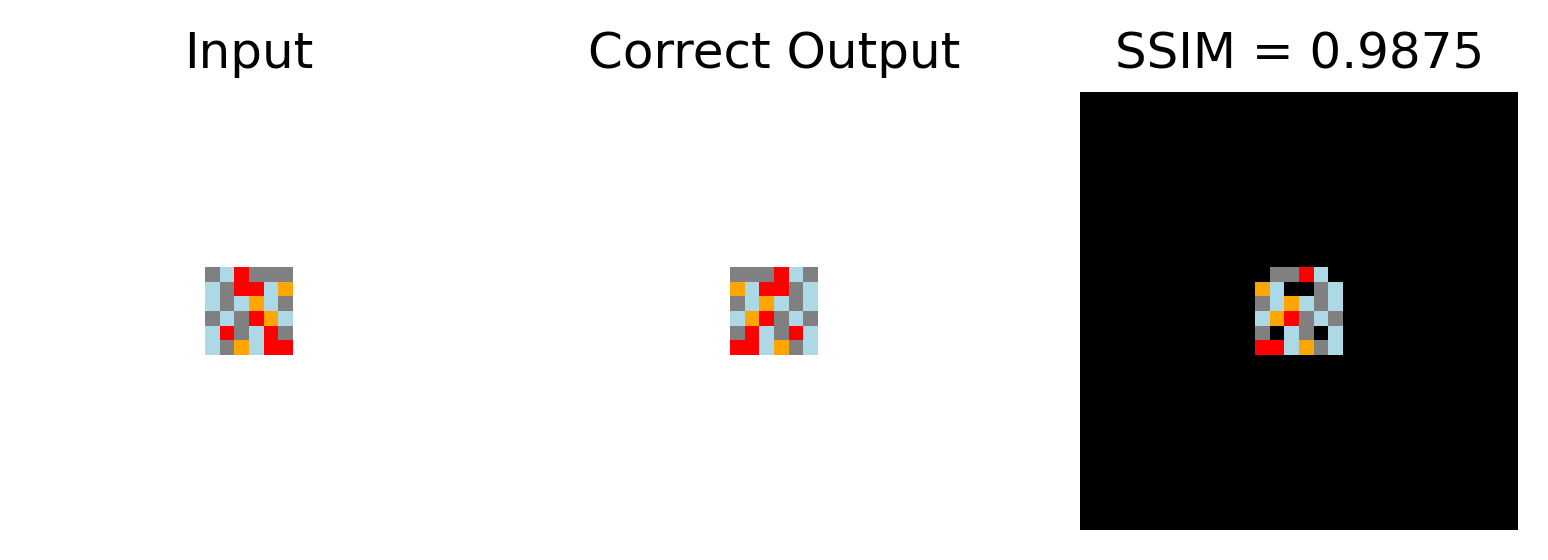

2: 67a3c6ac - Example #2:


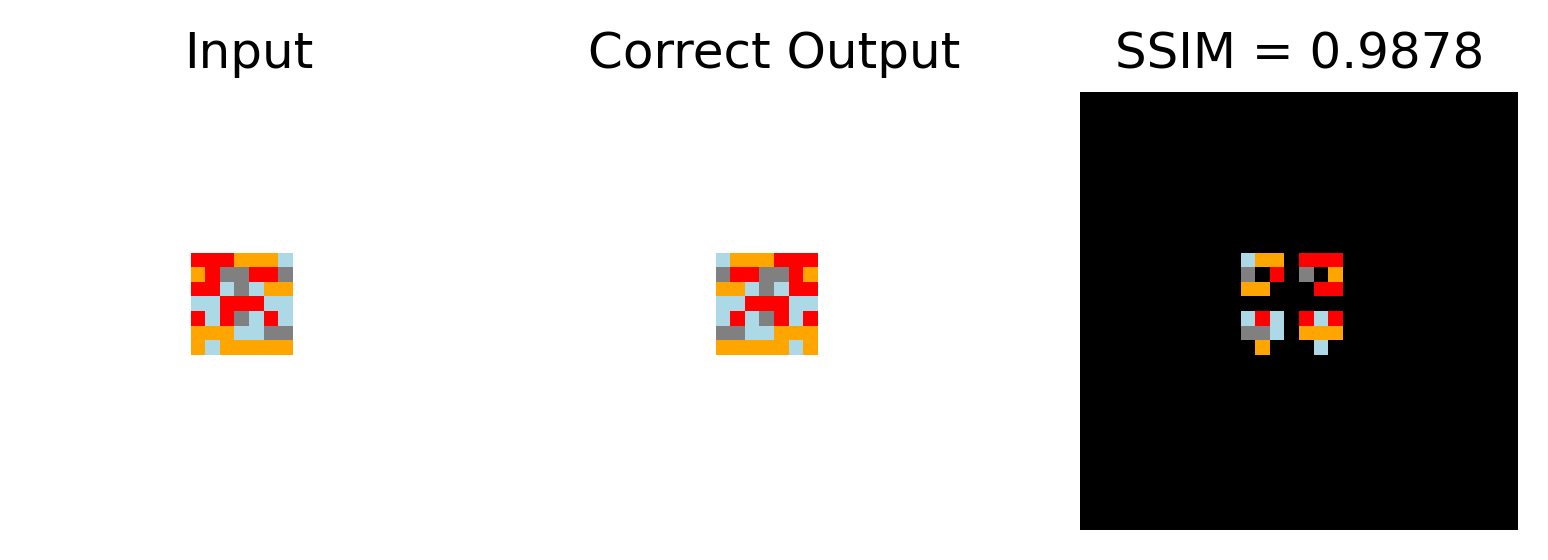

3: 67a3c6ac - Example #3:


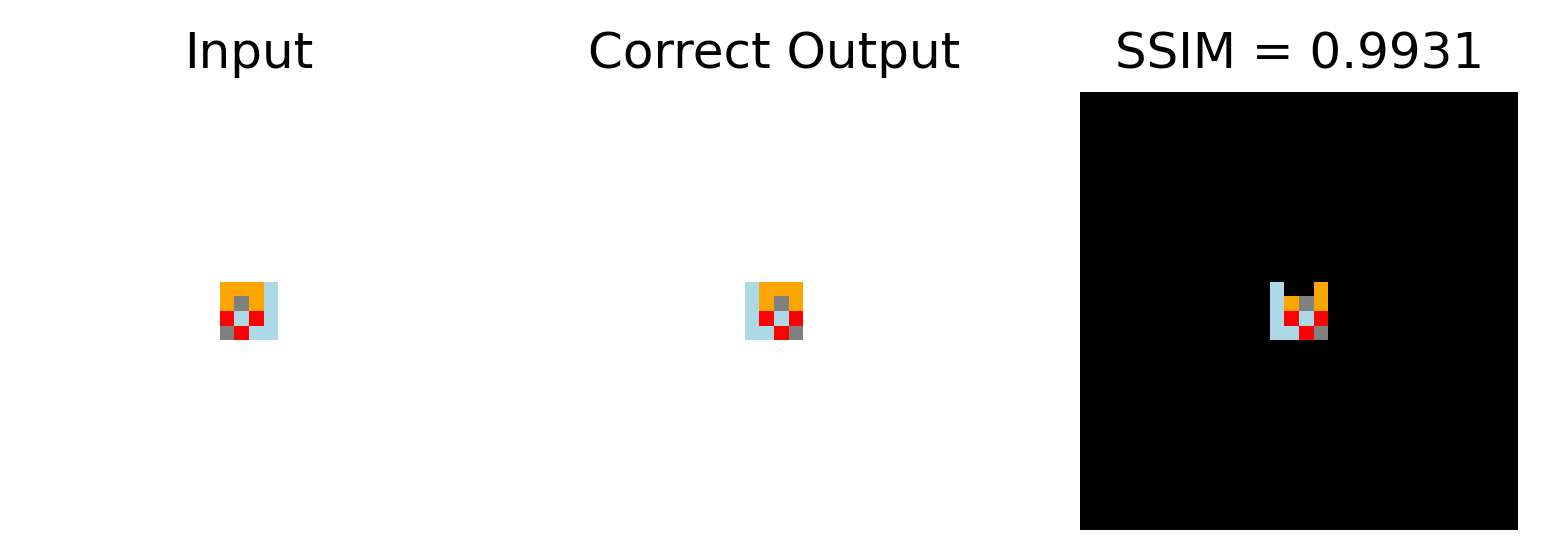

4: 68b16354 - Example #1:


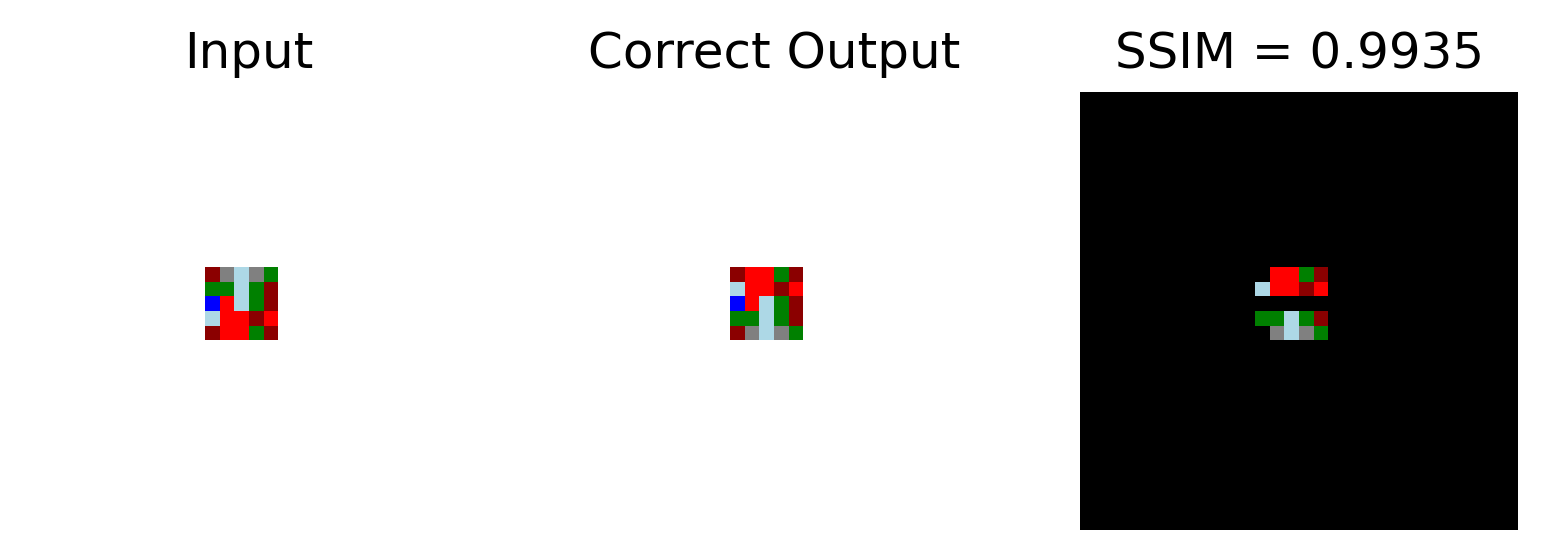

5: 68b16354 - Example #2:


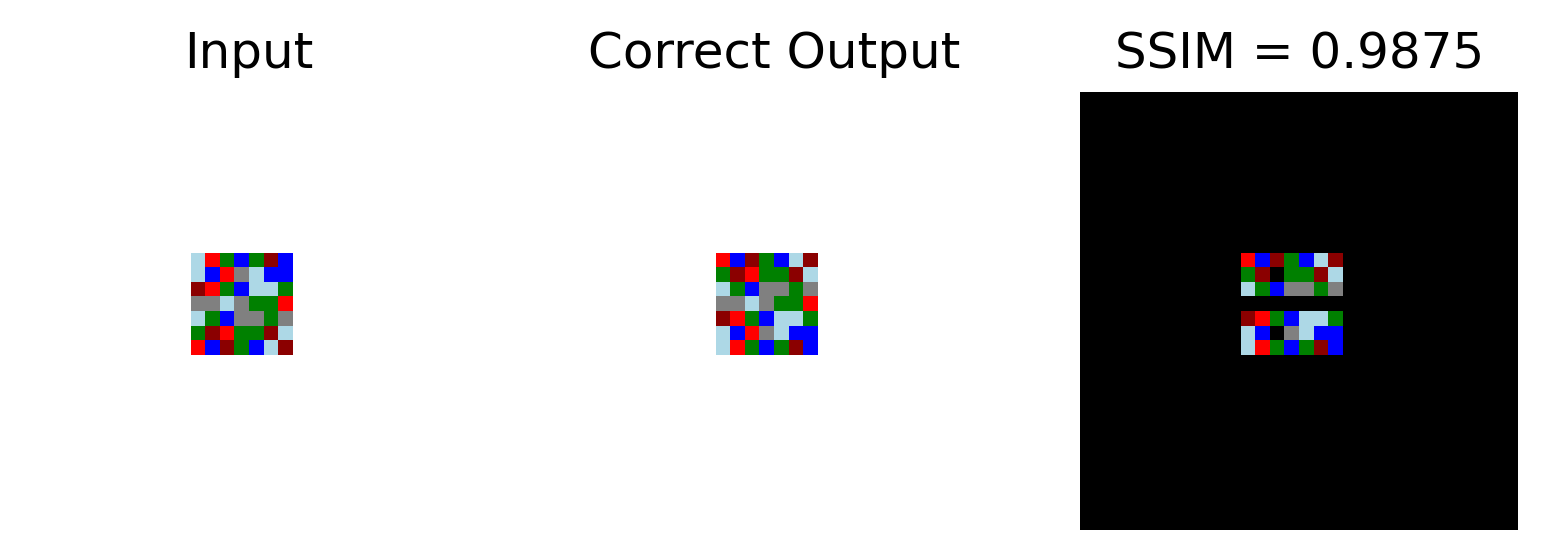

6: 68b16354 - Example #3:


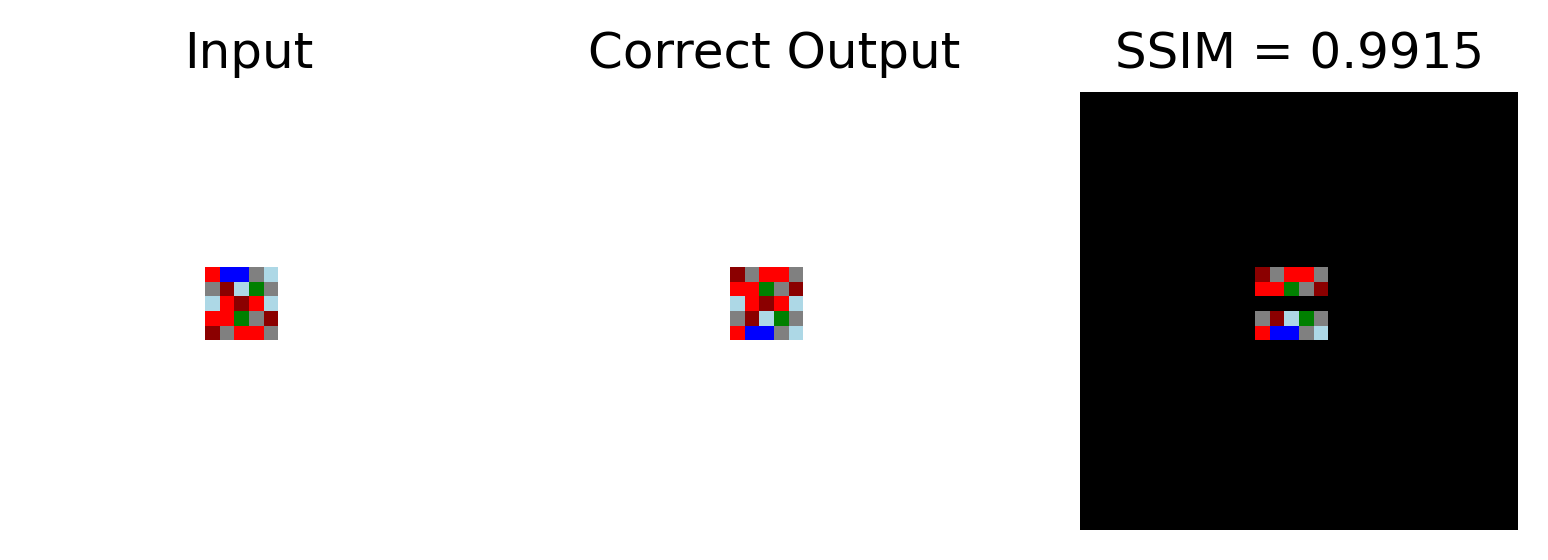

7: 74dd1130 - Example #1:


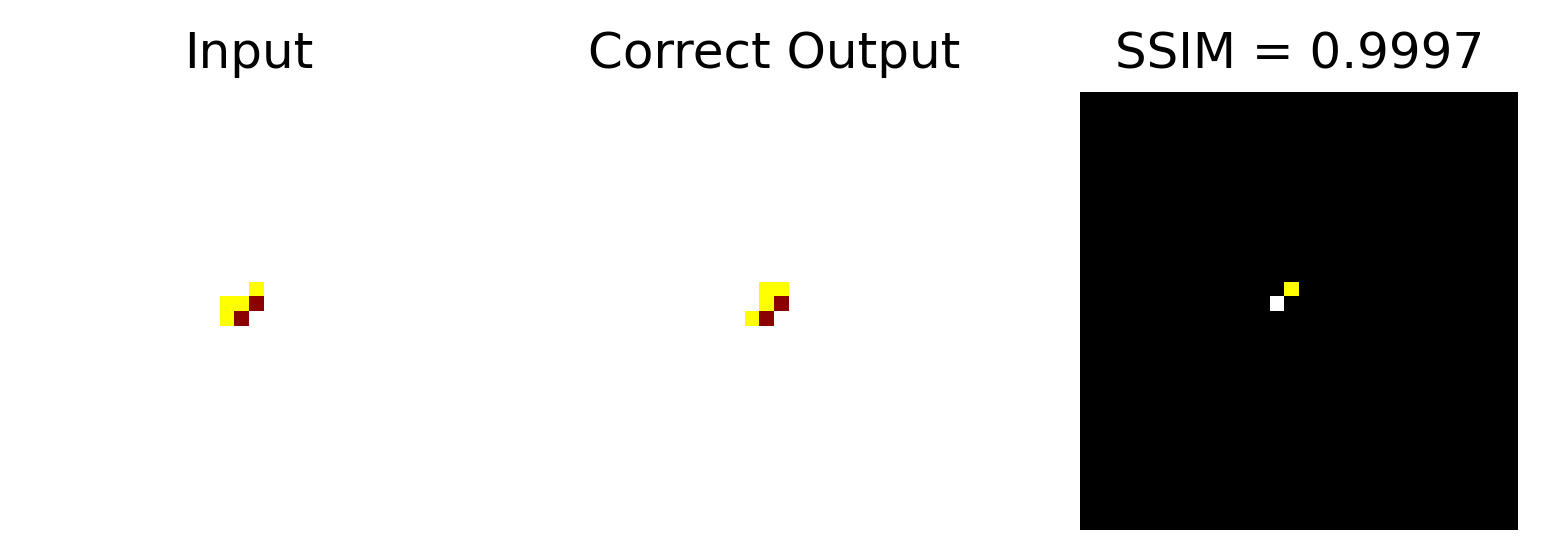

8: 74dd1130 - Example #2:


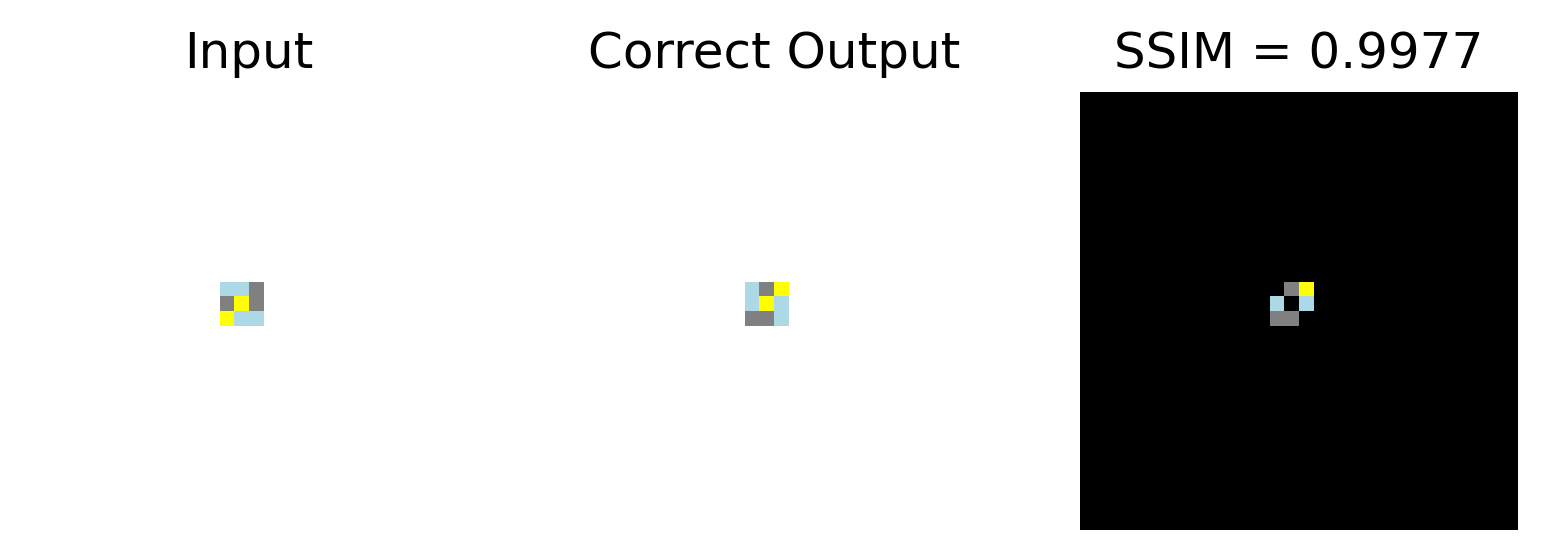

9: 74dd1130 - Example #3:


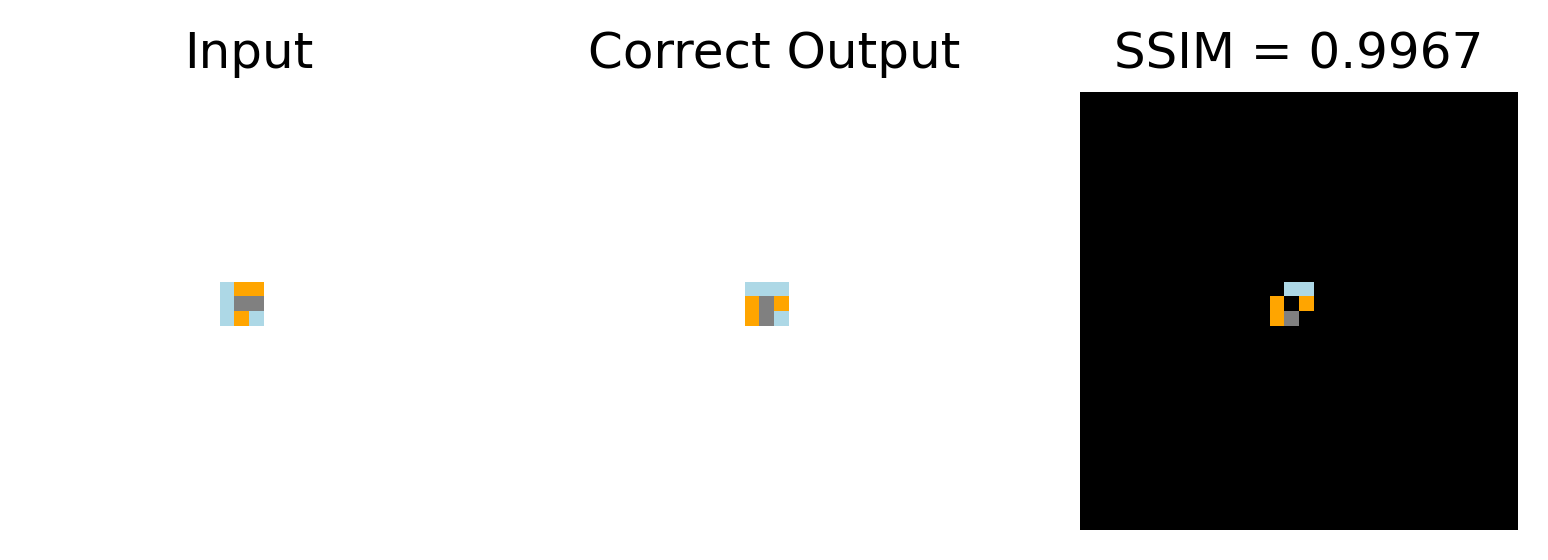

10: 74dd1130 - Example #4:


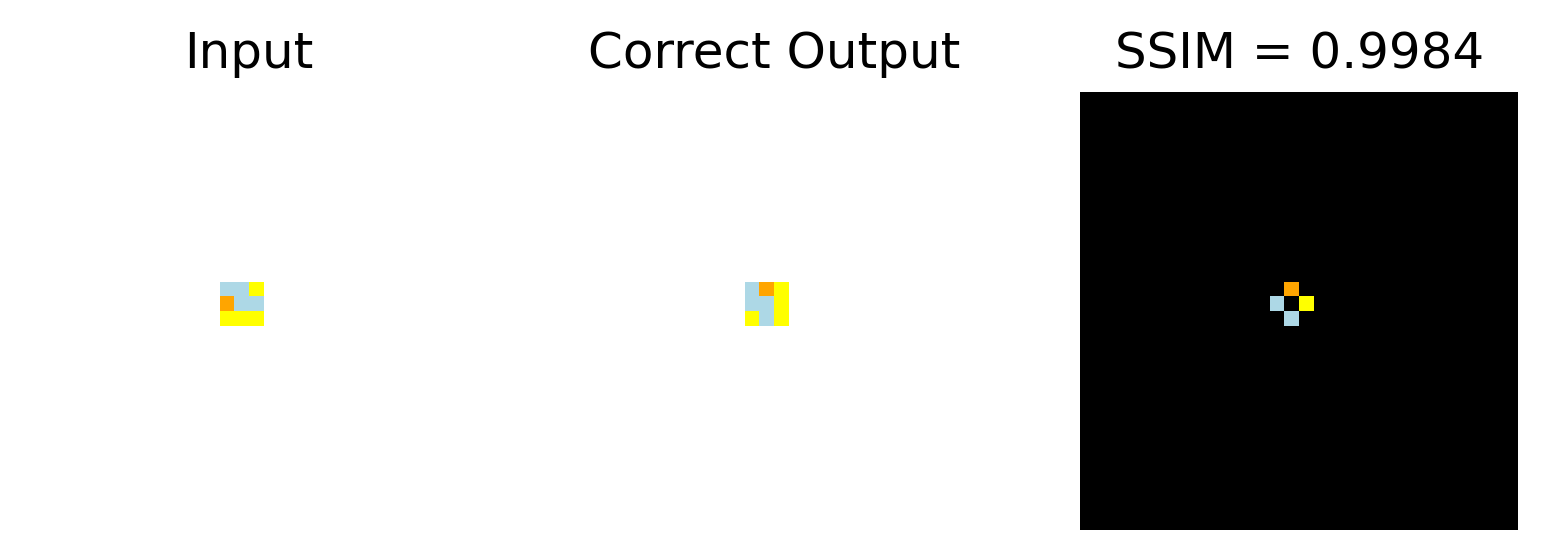

11: 3c9b0459 - Example #1:


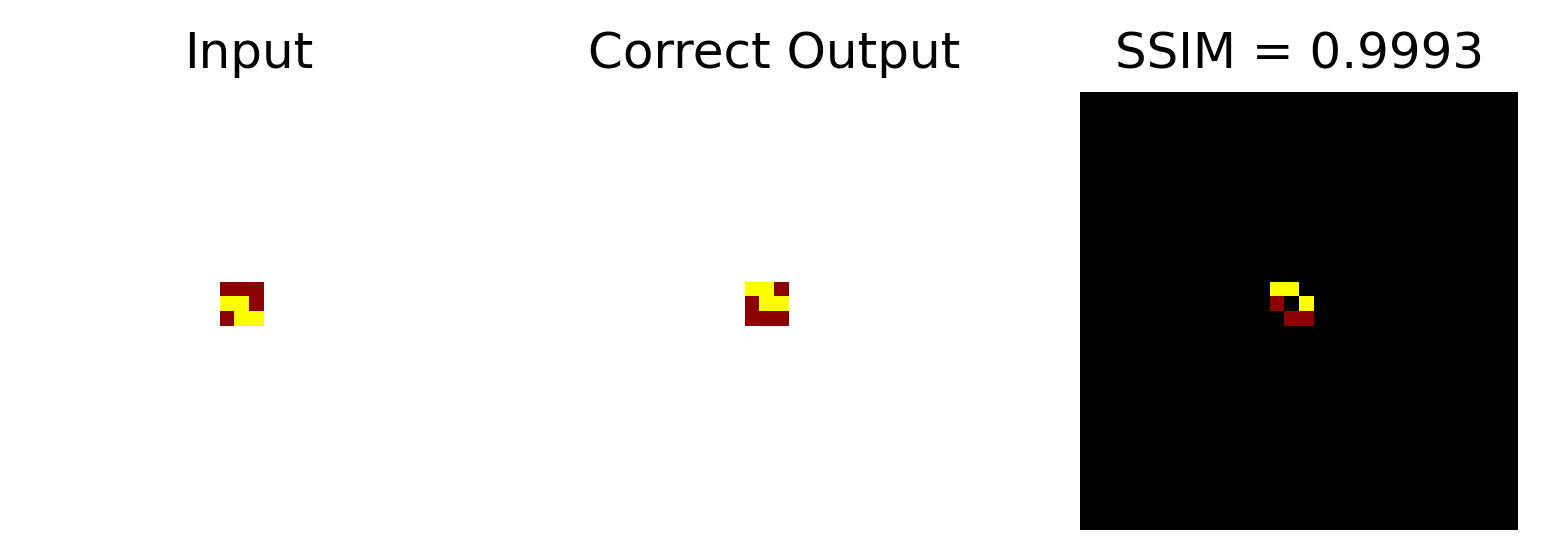

12: 3c9b0459 - Example #2:


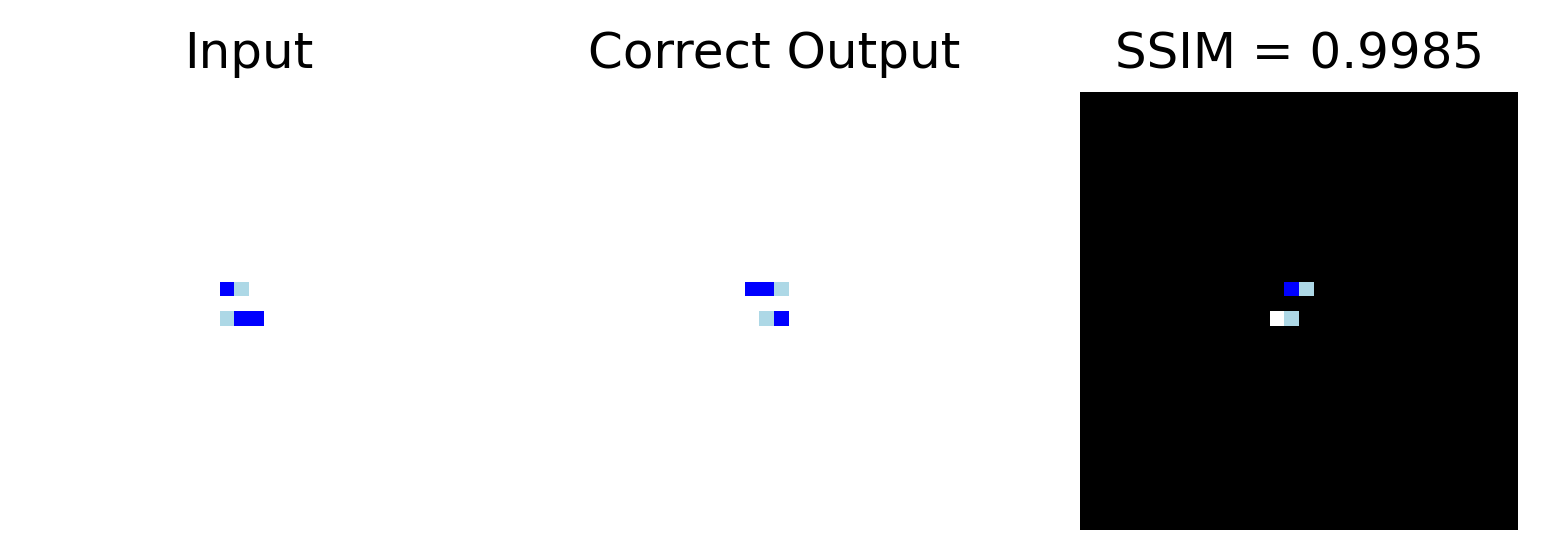

13: 3c9b0459 - Example #3:


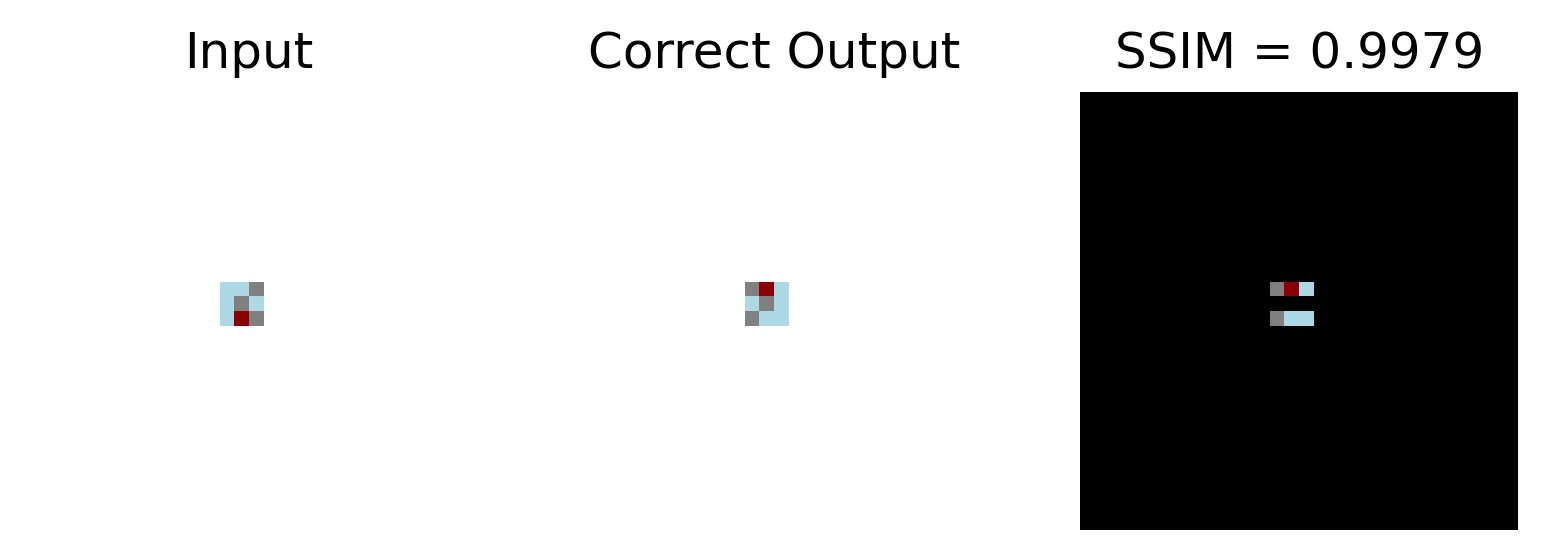

14: 3c9b0459 - Example #4:


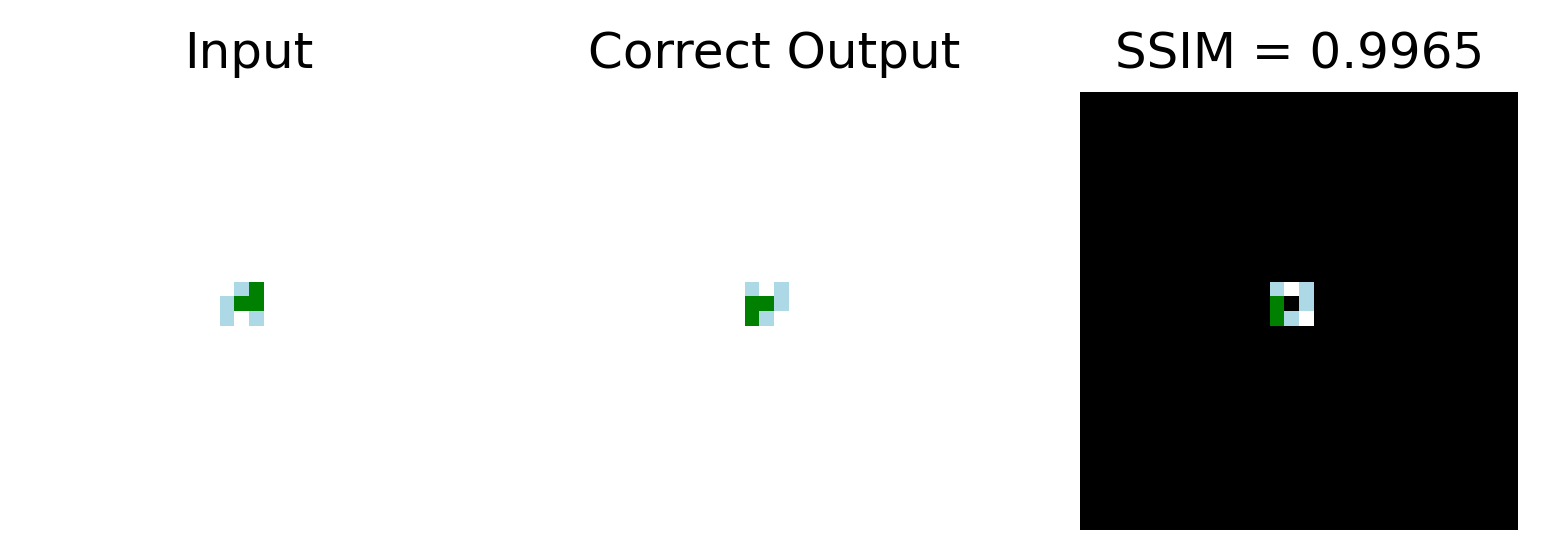

15: 6150a2bd - Example #1:


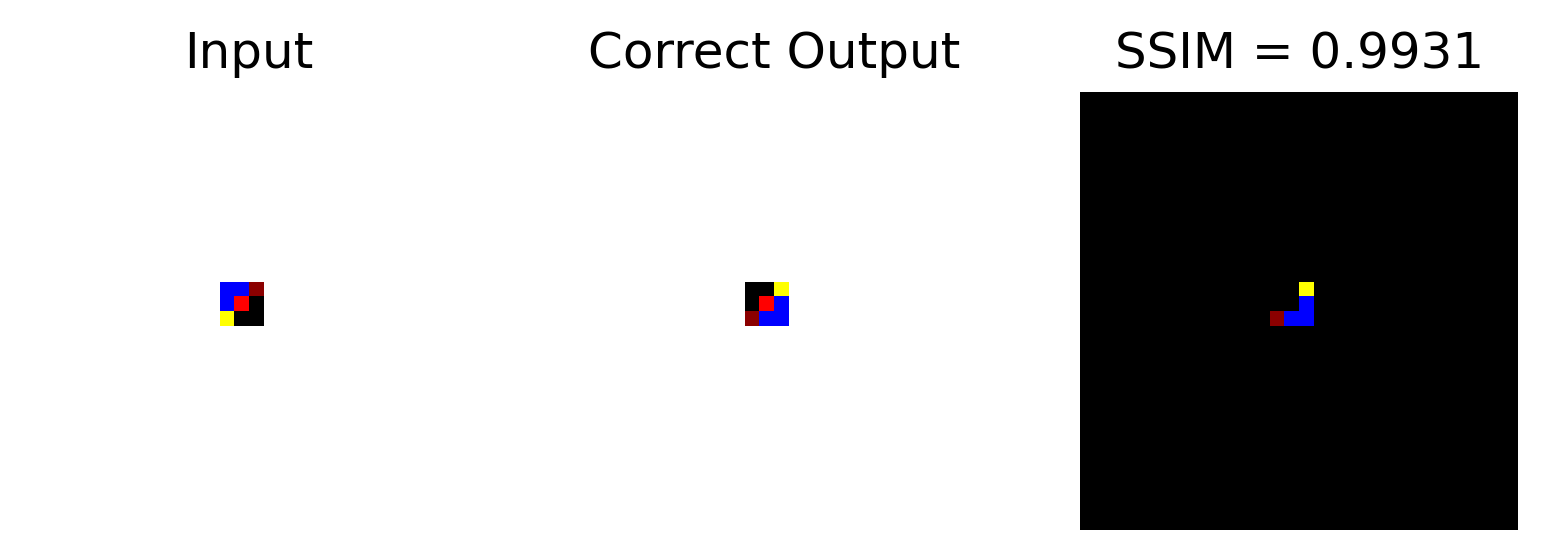

16: 6150a2bd - Example #2:


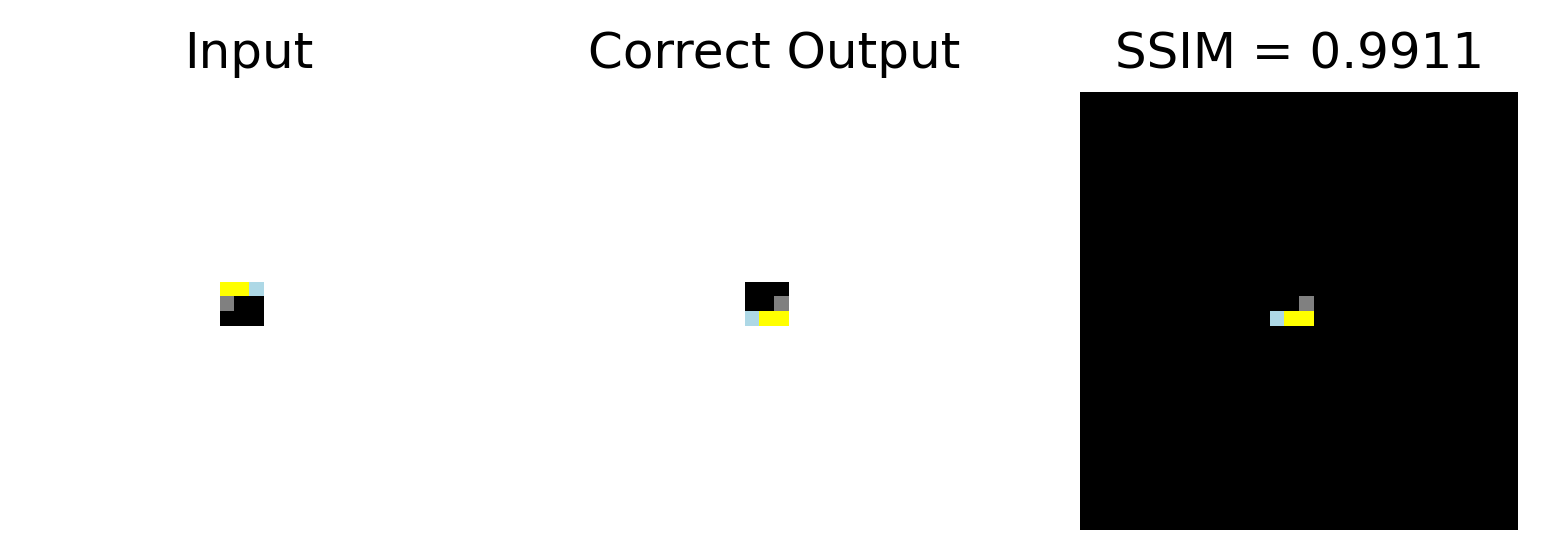

17: 9172f3a0 - Example #1:


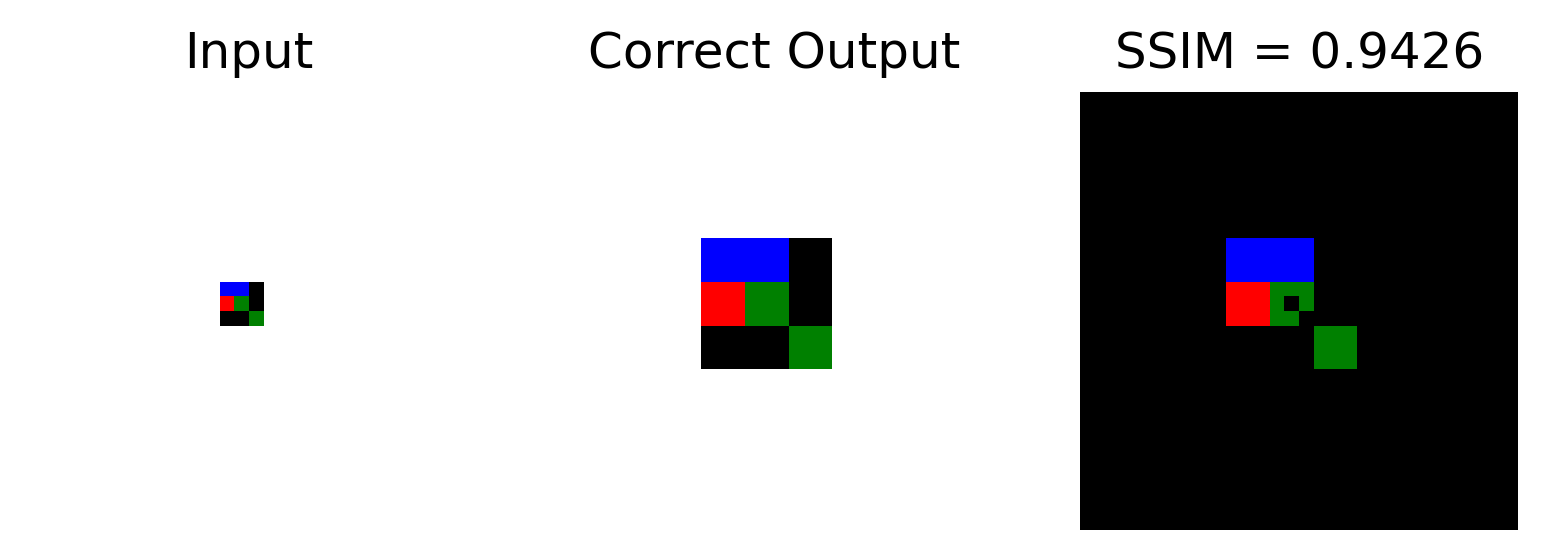

18: 9172f3a0 - Example #2:


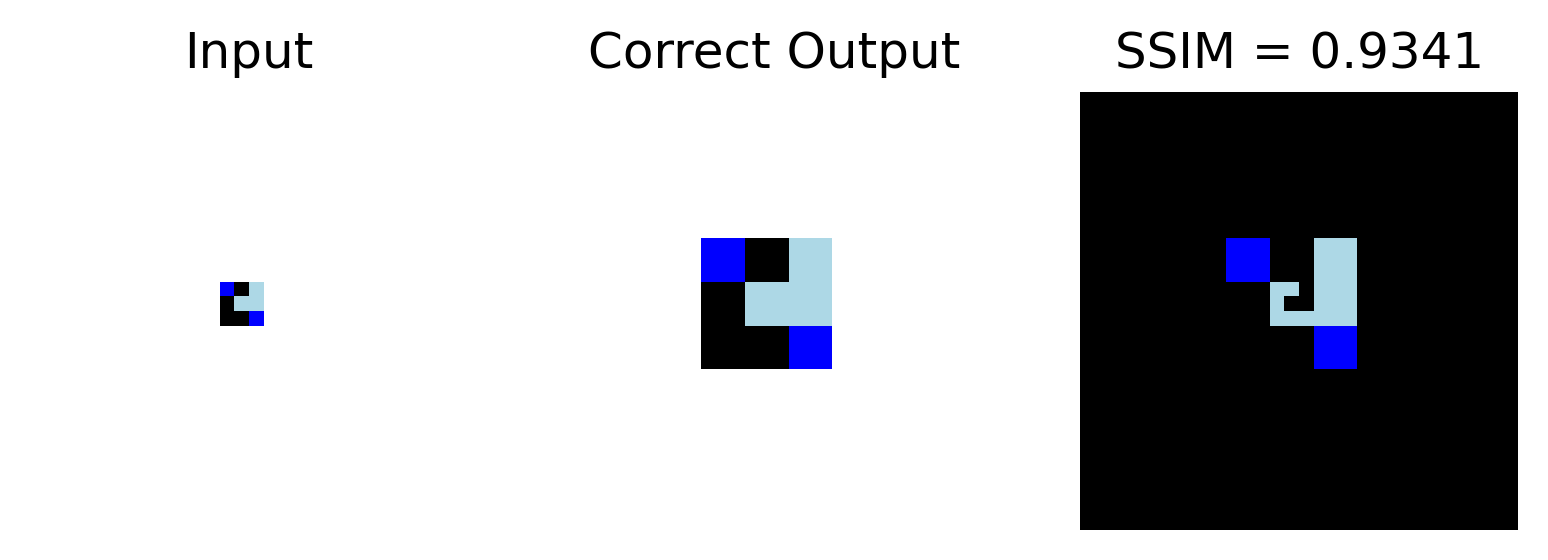

19: 9dfd6313 - Example #1:


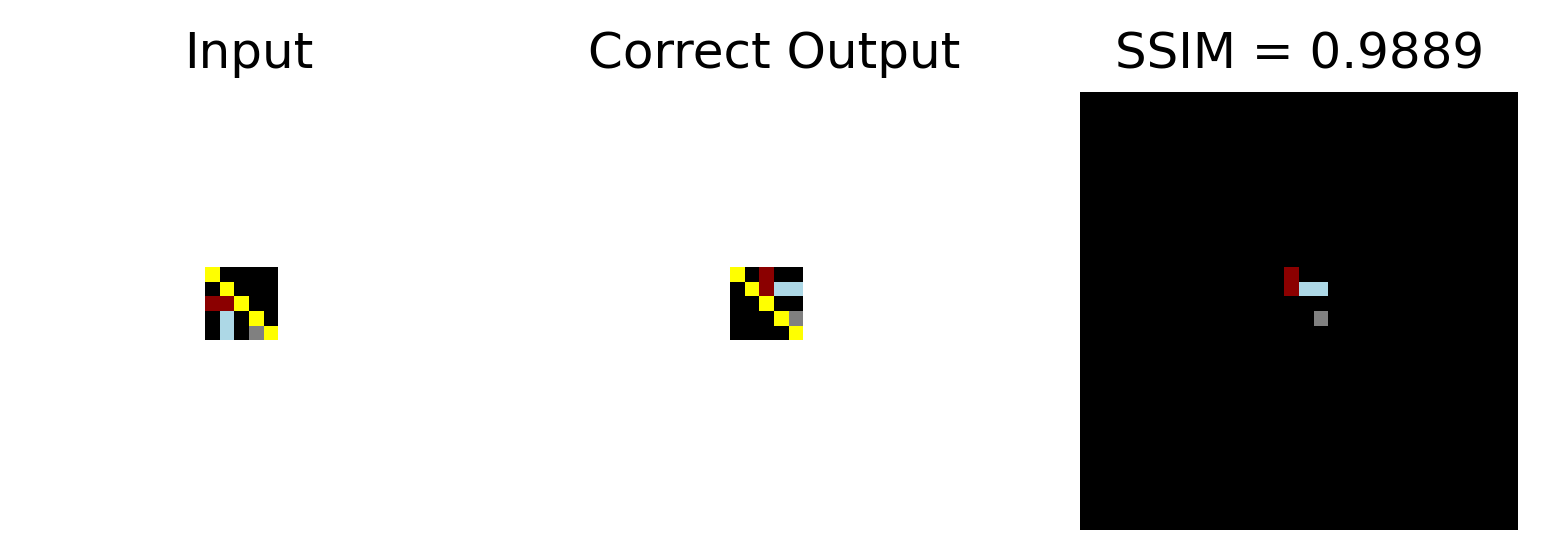

20: 9dfd6313 - Example #2:


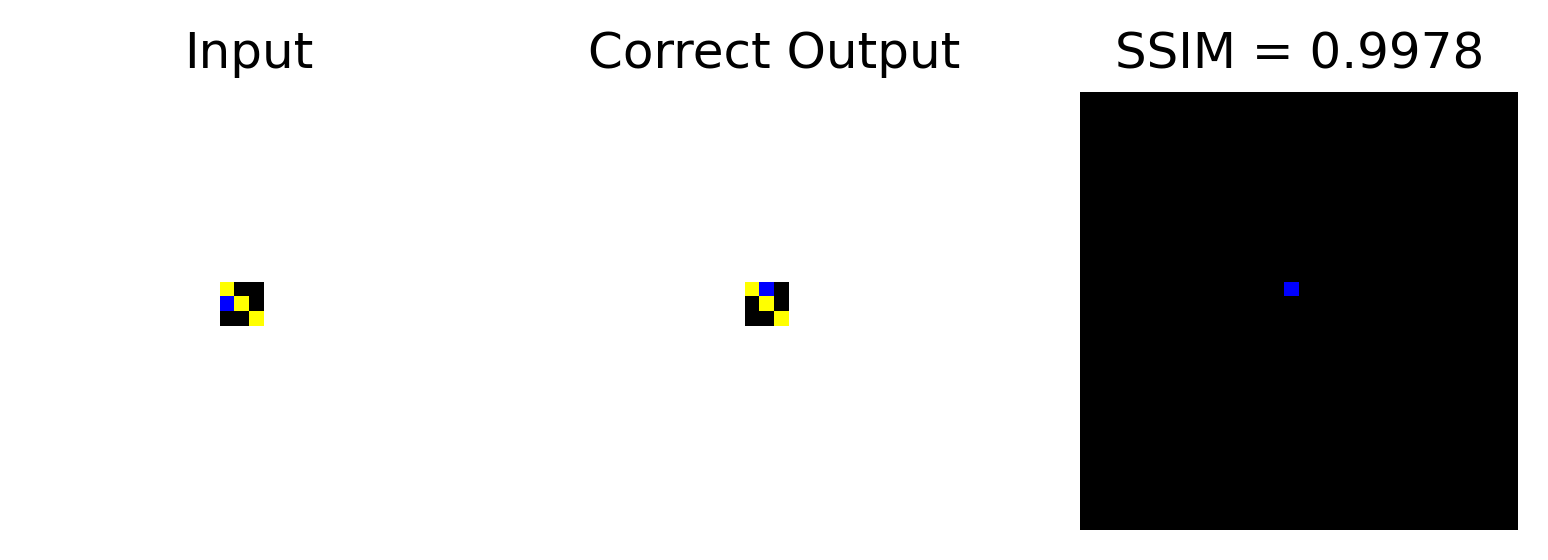

21: 9dfd6313 - Example #3:


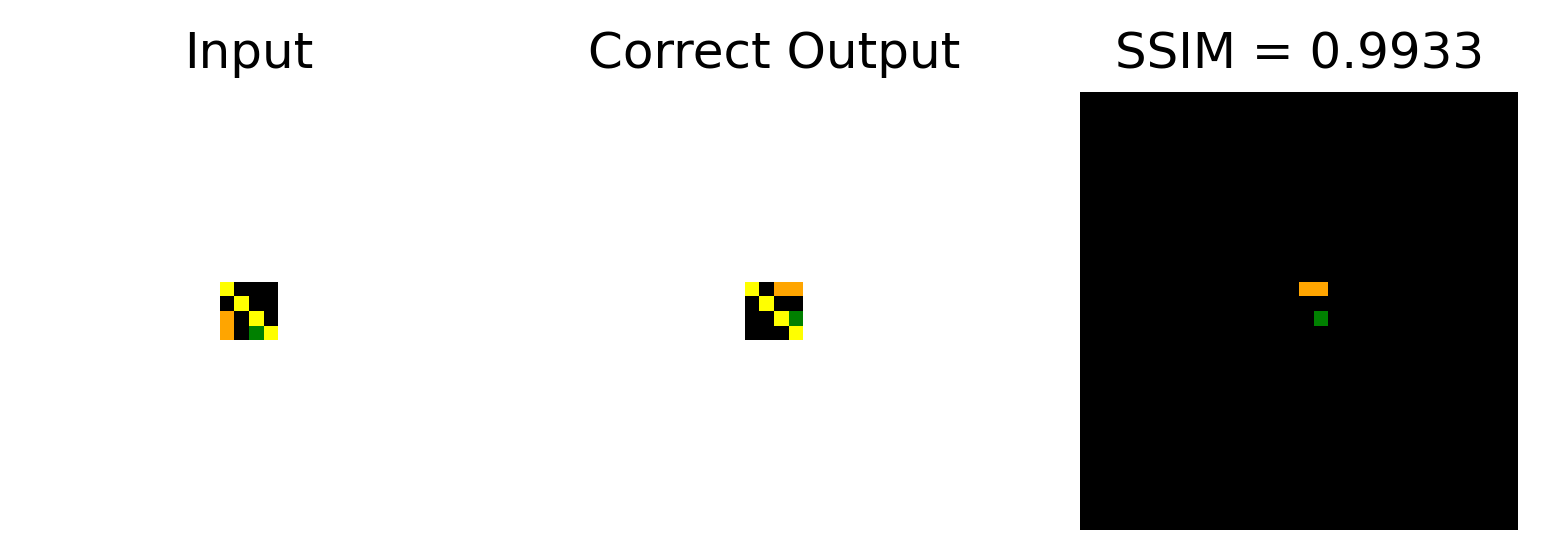

22: a416b8f3 - Example #1:


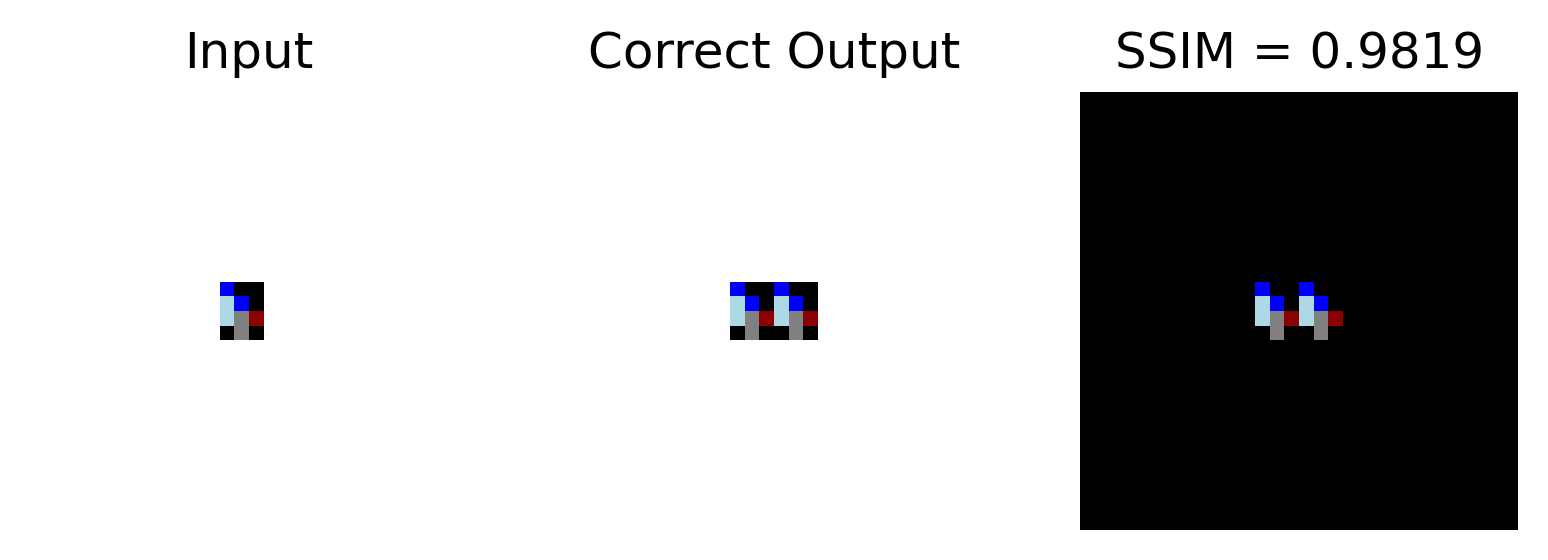

23: a416b8f3 - Example #2:


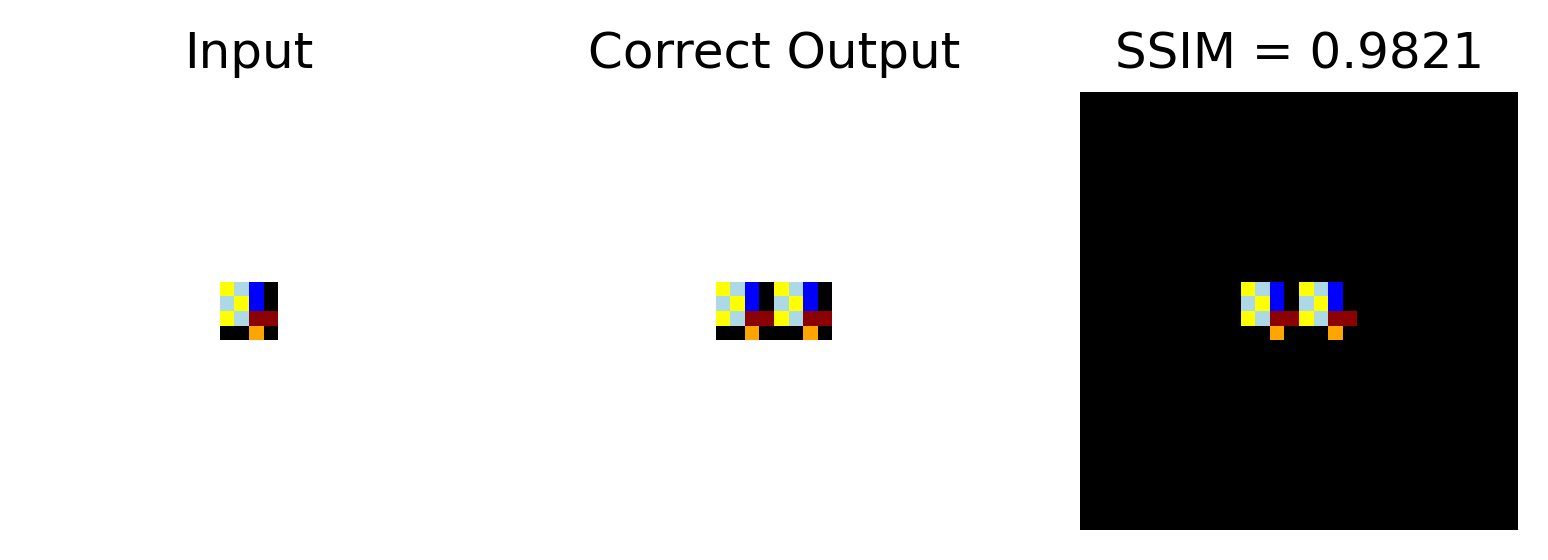

24: a416b8f3 - Example #3:


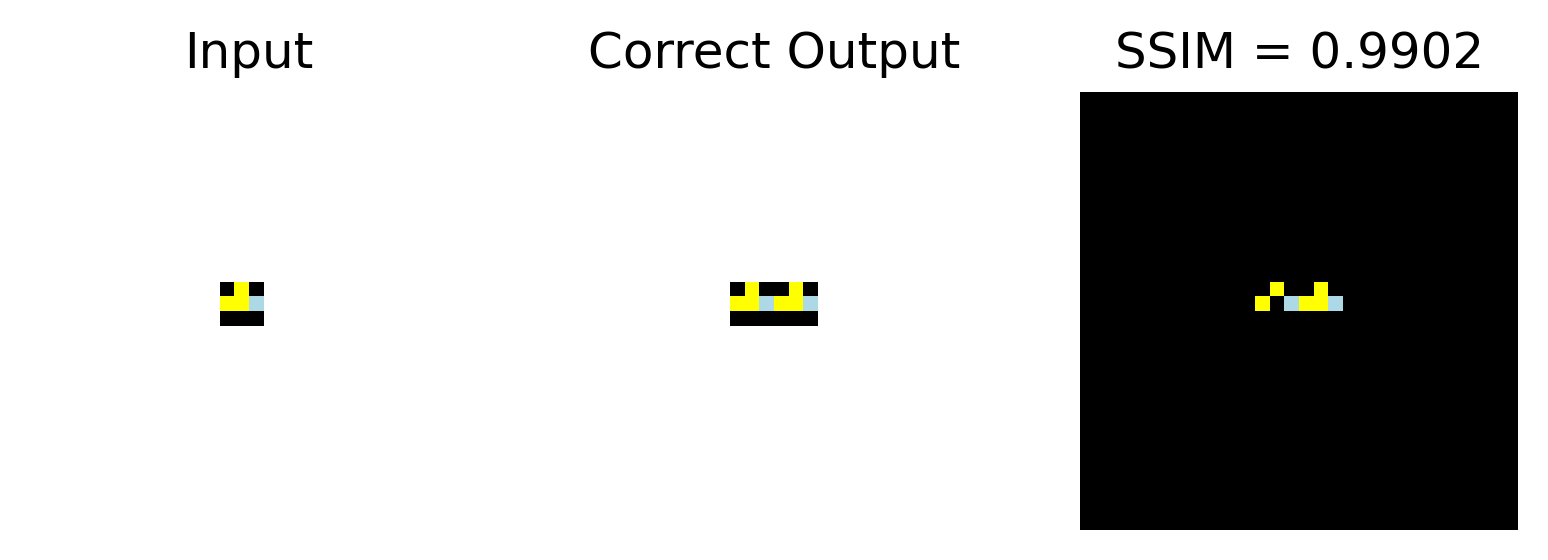

25: b1948b0a - Example #1:


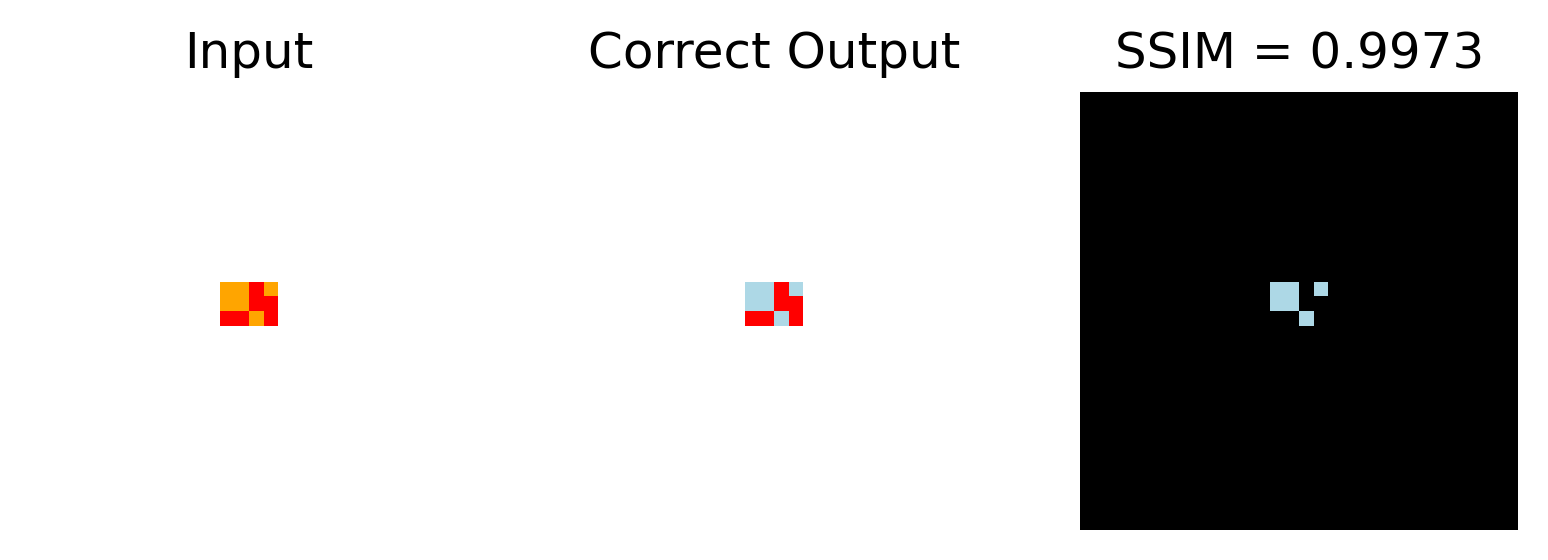

26: b1948b0a - Example #2:


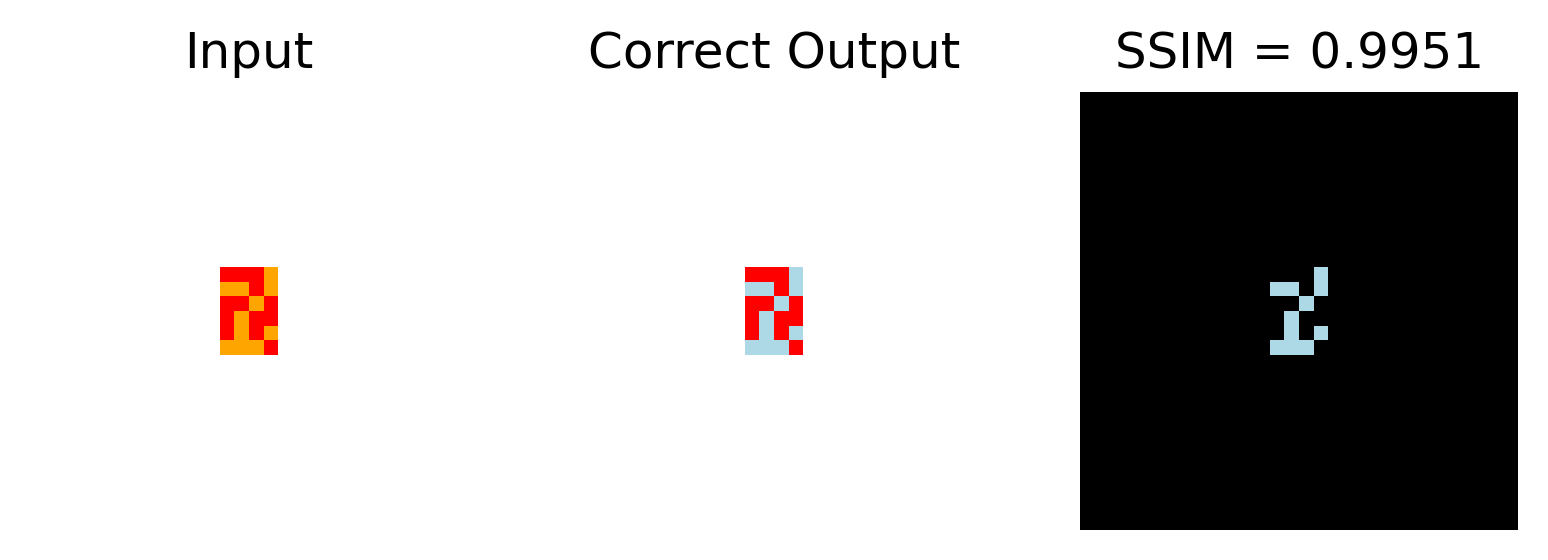

27: b1948b0a - Example #3:


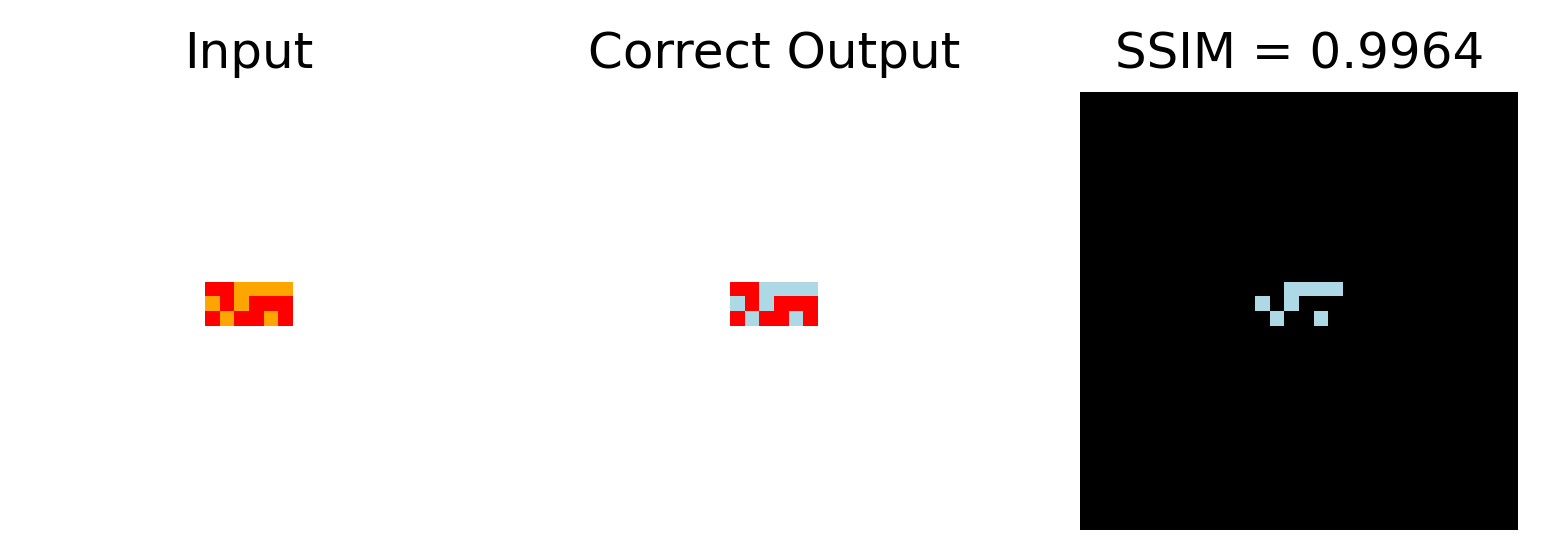

28: c59eb873 - Example #1:


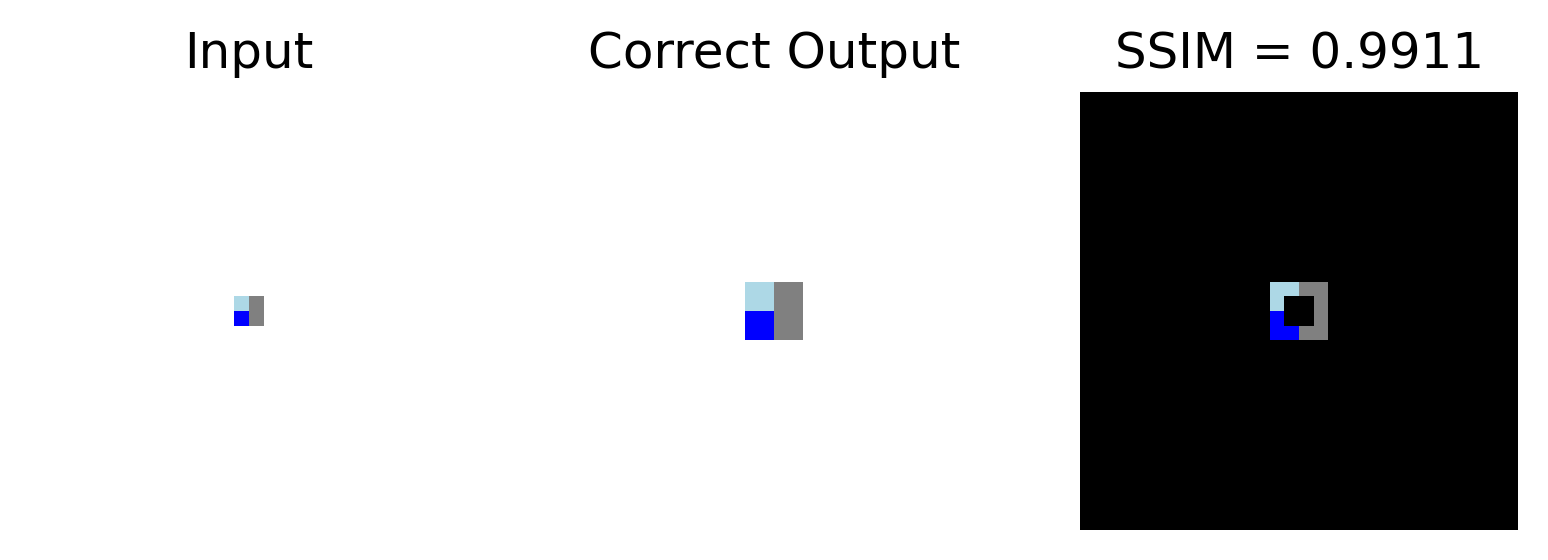

29: c59eb873 - Example #2:


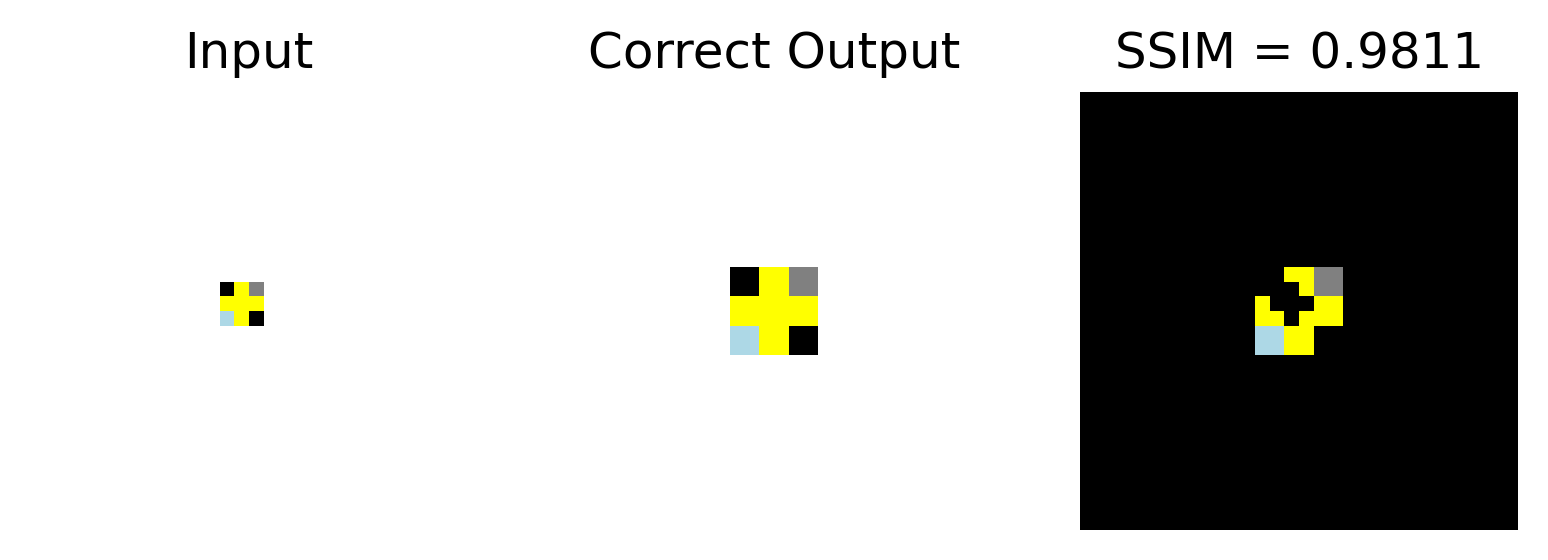

30: c59eb873 - Example #3:


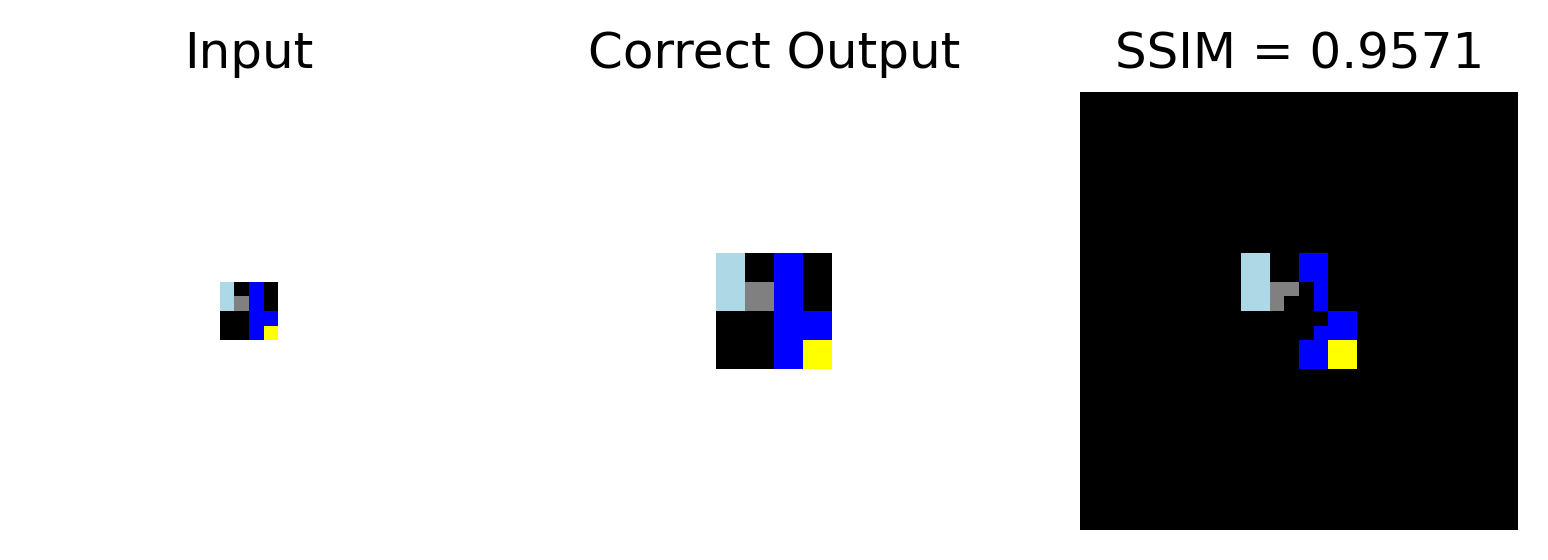

31: c8f0f002 - Example #1:


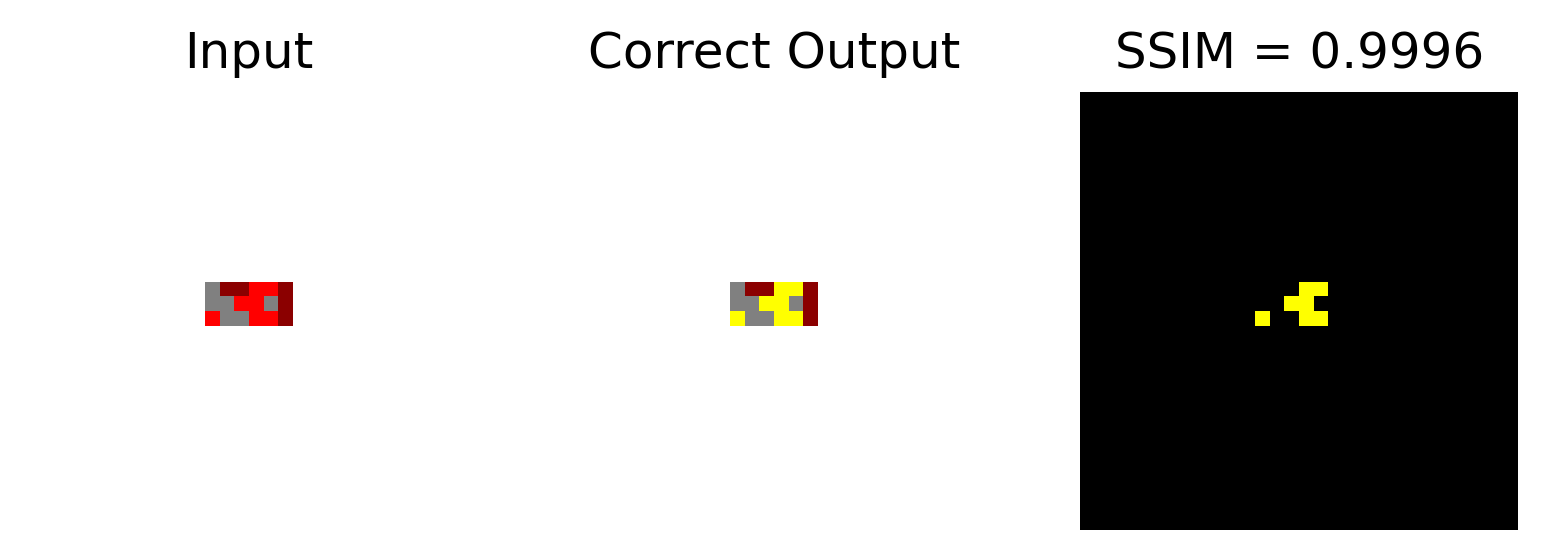

32: c8f0f002 - Example #2:


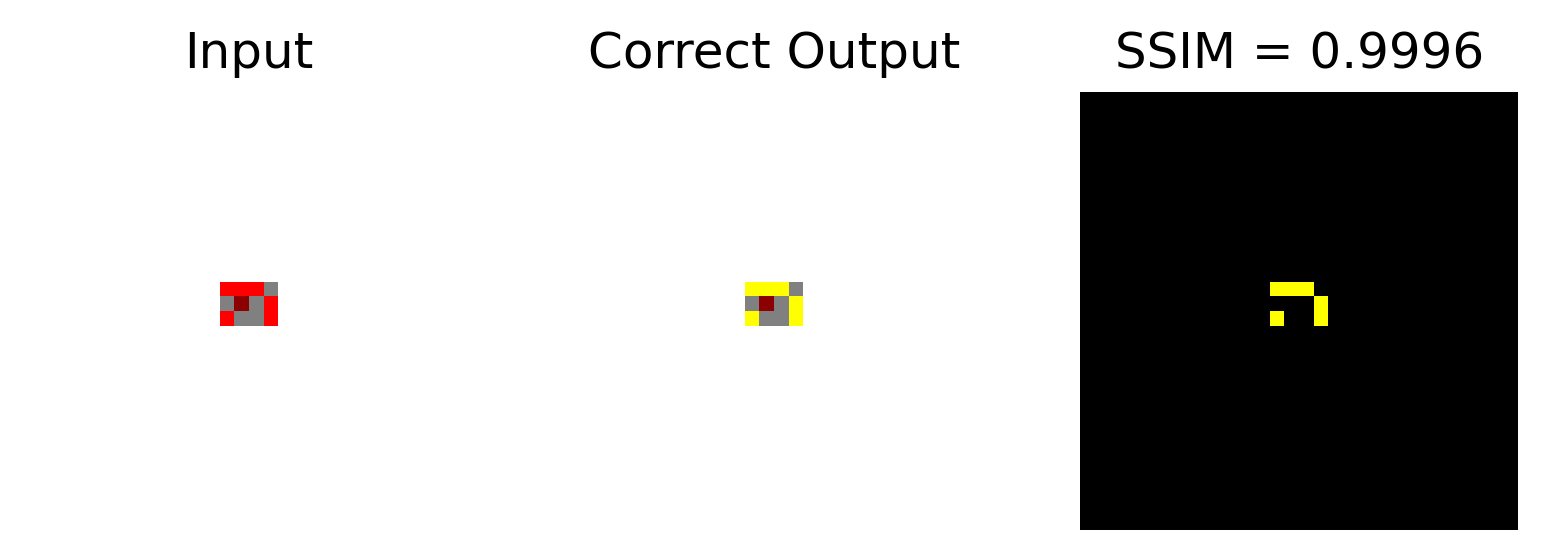

33: c8f0f002 - Example #3:


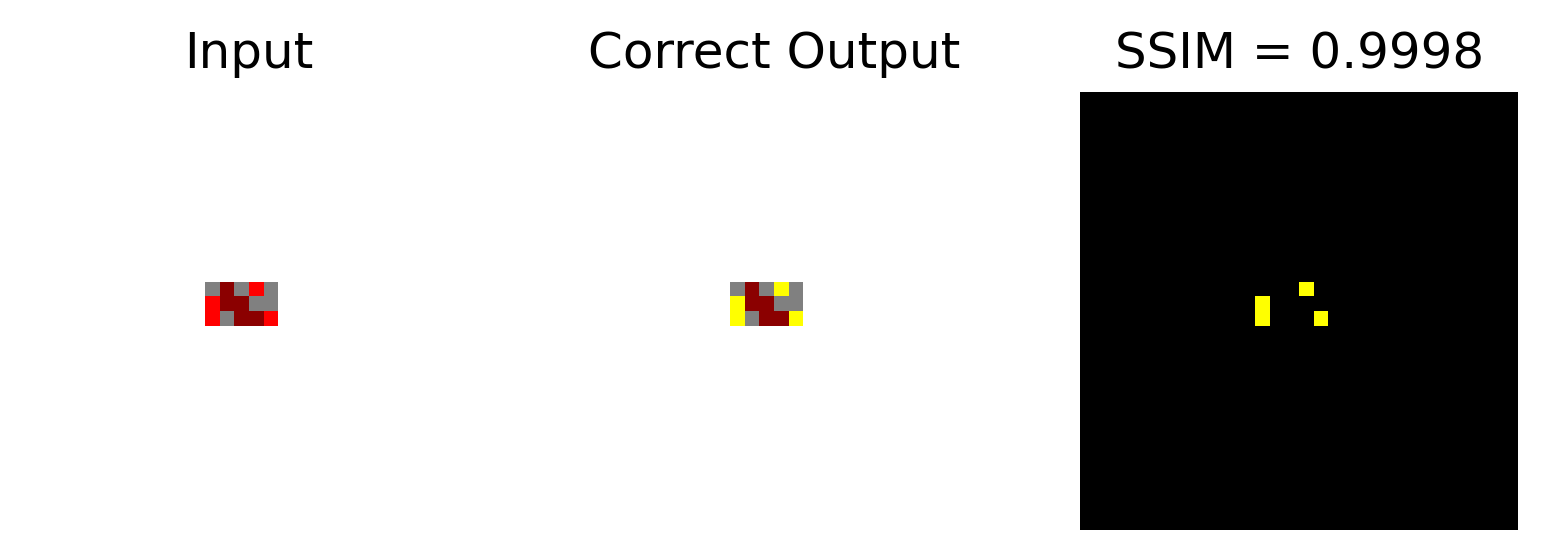

34: d10ecb37 - Example #1:


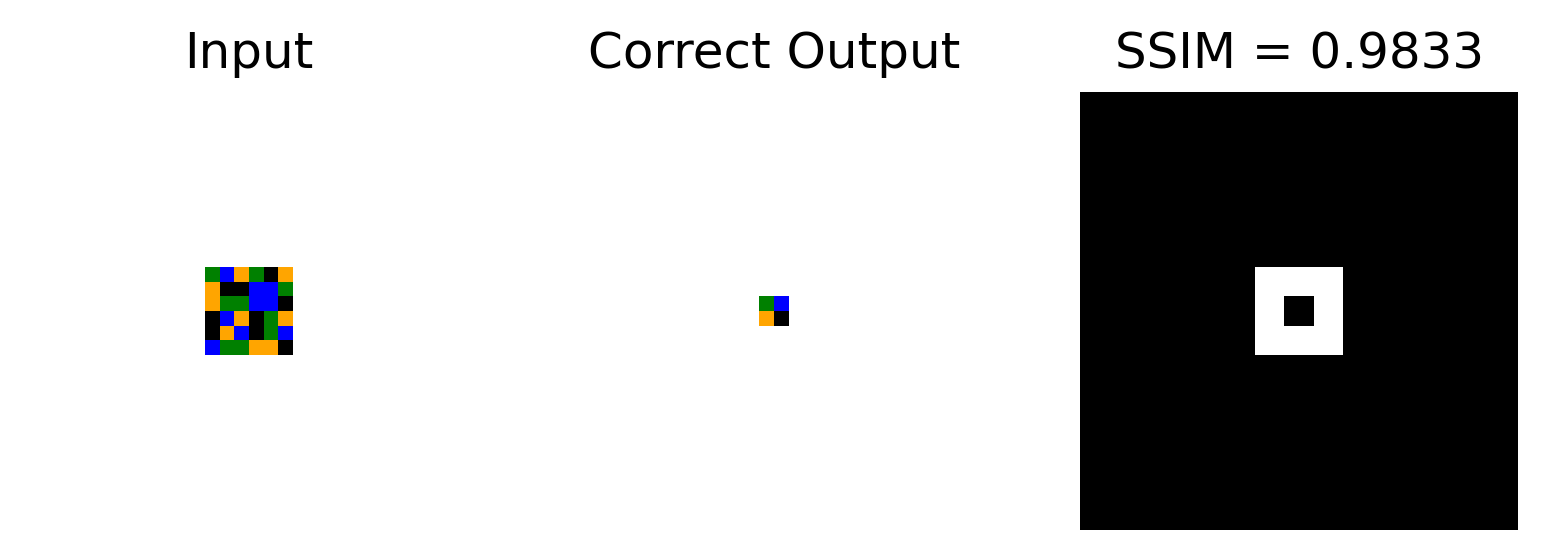

35: d10ecb37 - Example #2:


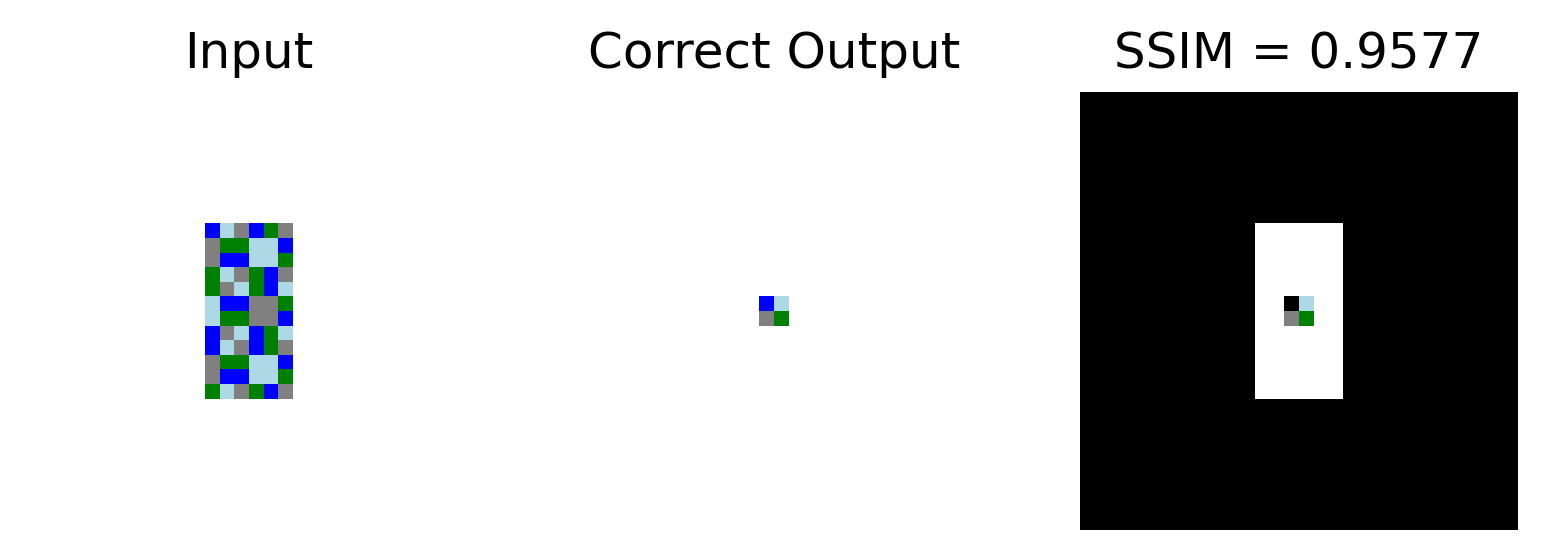

36: d10ecb37 - Example #3:


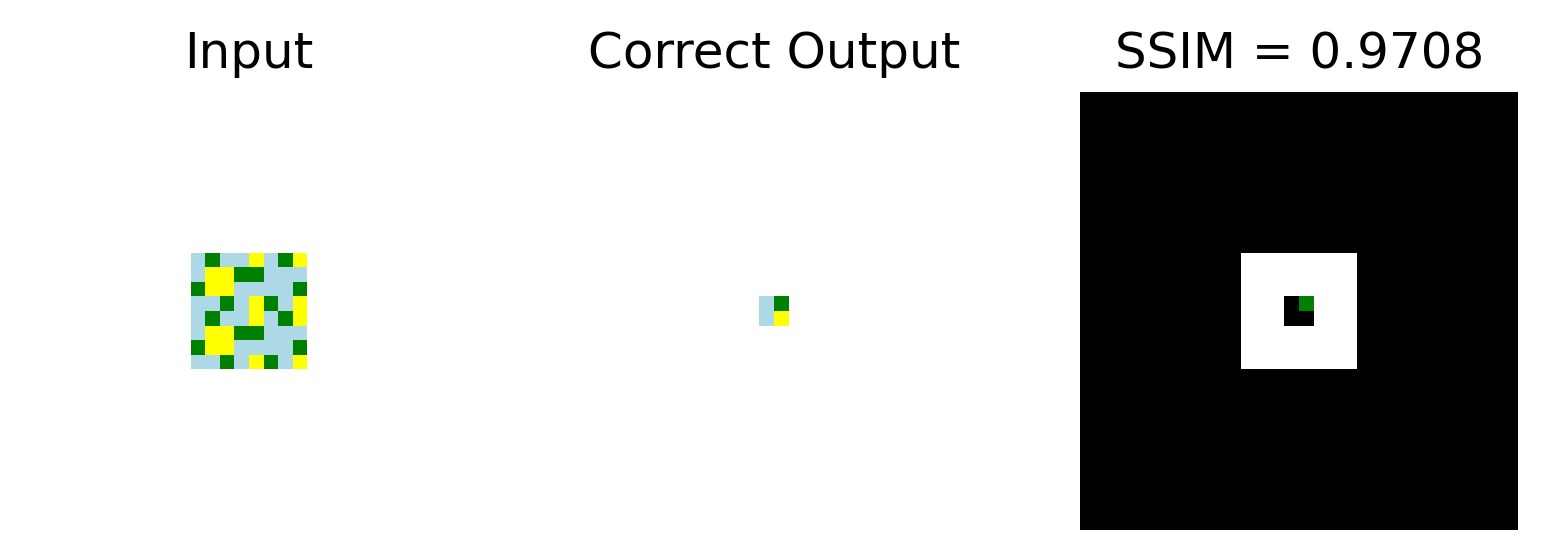

37: d511f180 - Example #1:


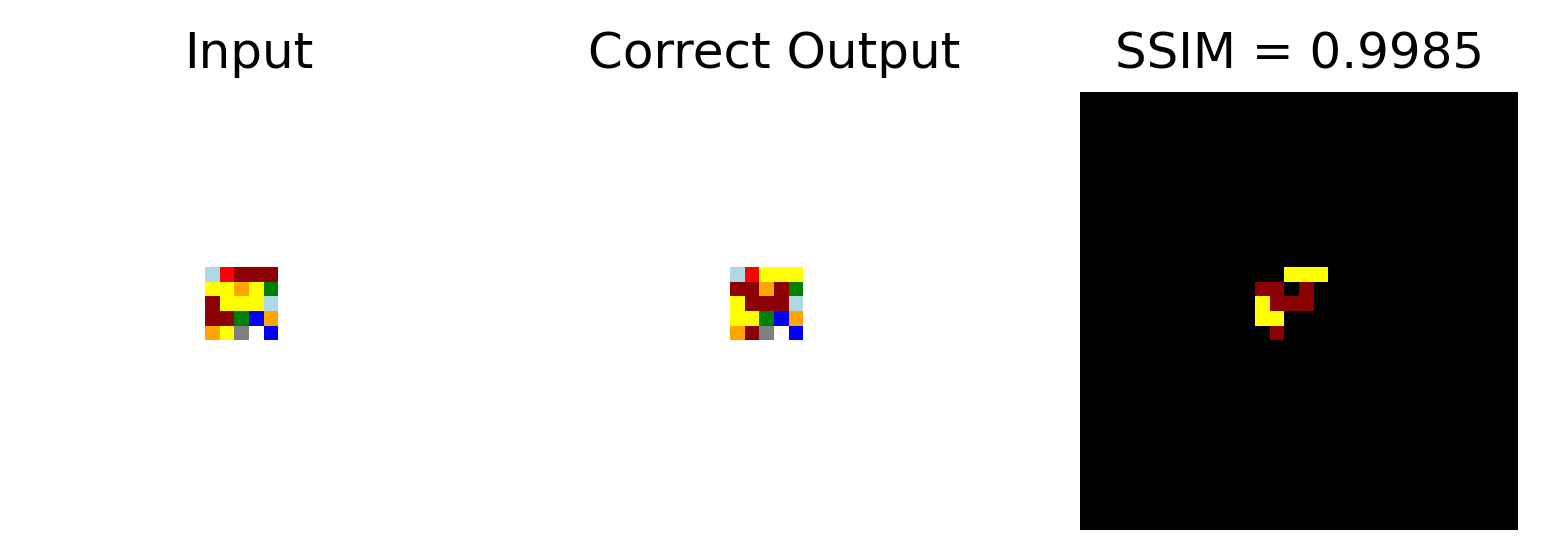

38: d511f180 - Example #2:


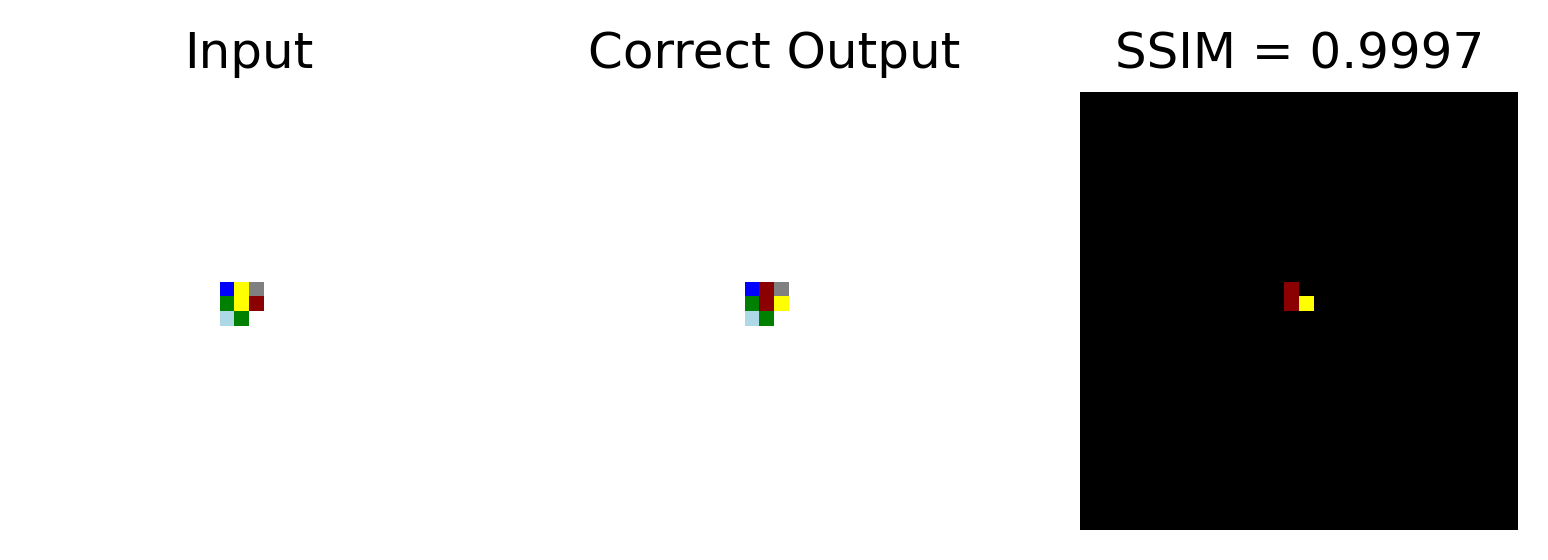

39: d511f180 - Example #3:


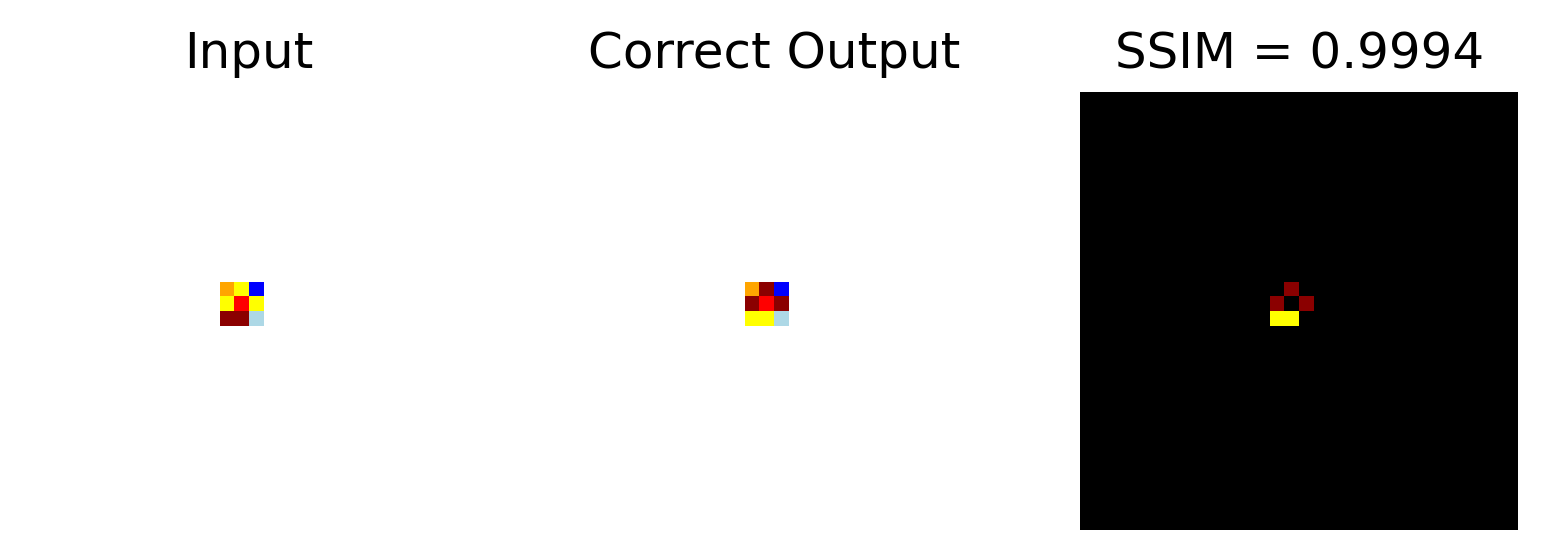

In [87]:
import math
import torch
from torchmetrics.image import StructuralSimilarityIndexMeasure

ssim = StructuralSimilarityIndexMeasure(
    gaussian_kernel=False,
    kernel_size=1,
    data_range=(0, 10),
    reduction=None,
    return_full_image=True
)
k = 1
for challenge_id in challenge_ids:
    try:
        X_samples, y_samples = dataset.get_samples(challenge_id)
    except:
        continue

    ssim_values, ssim_diff_images = ssim(X_samples, y_samples)
    ssim_diff_images_padding_dim2 = (ssim_diff_images.shape[2] - y_samples.shape[2]) / 2
    ssim_diff_images_padding_dim3 = (ssim_diff_images.shape[3] - y_samples.shape[3]) / 2
    ssim_diff_masks = ssim_diff_images[
      :,
      :,
      math.floor(ssim_diff_images_padding_dim2) : y_samples.shape[2] + math.ceil(ssim_diff_images_padding_dim2),
      math.floor(ssim_diff_images_padding_dim3) : y_samples.shape[3] + math.ceil(ssim_diff_images_padding_dim3)
    ].to(dtype=torch.int).to(dtype=torch.bool)
    
    for i, X_sample in enumerate(X_samples):
        print(f"{k}: {challenge_id} - Example #{i + 1}:")
        
        y_diff = y_samples[i] - (y_samples[i] * ssim_diff_masks[i])
        
        plot.input_and_output(
            X_sample,
            y_samples[i],
            y_pred=y_diff,
            y_pred_title=f"SSIM = {ssim_values[i]:.4f}"
        )
        k += 1

## Peak Signal to Noise Ratio (PSNR)

1: 67a3c6ac - Example #1:


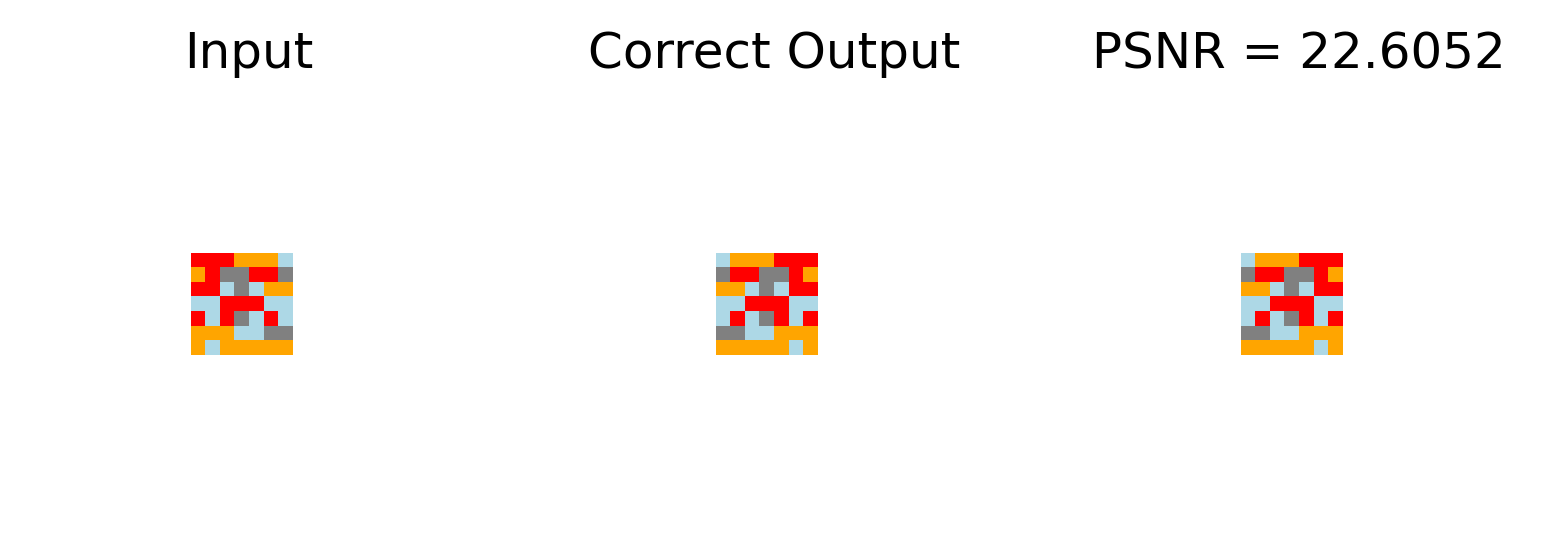

2: 67a3c6ac - Example #2:


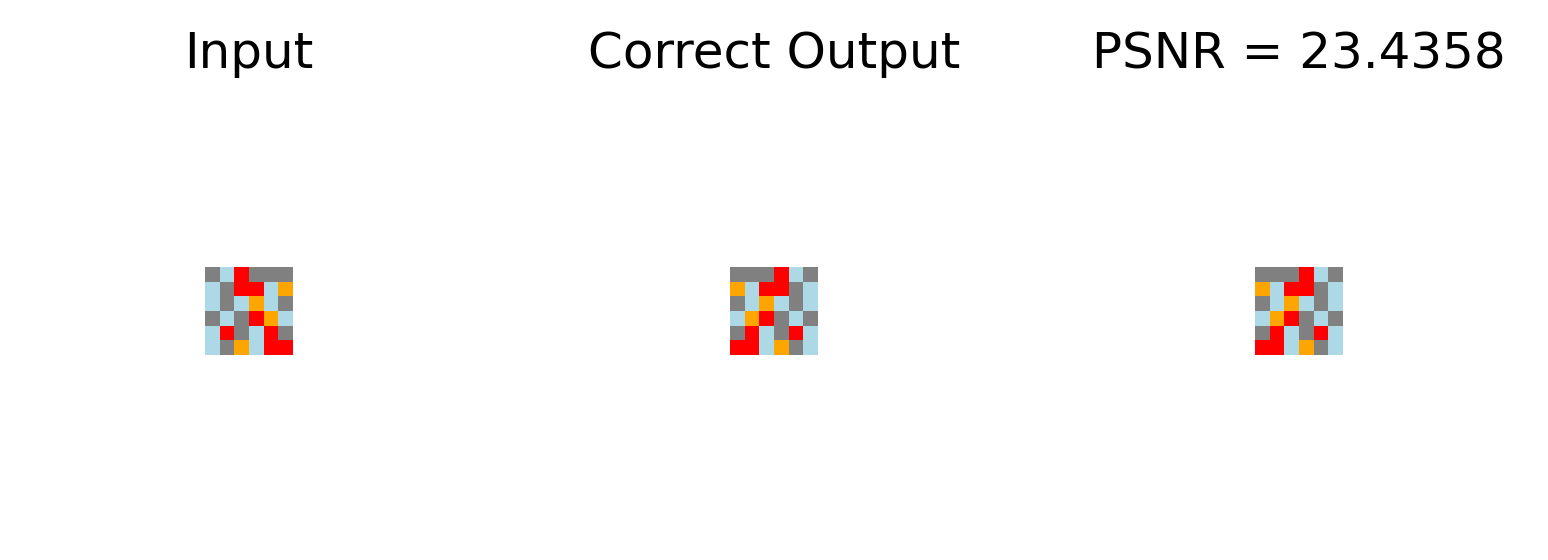

3: 67a3c6ac - Example #3:


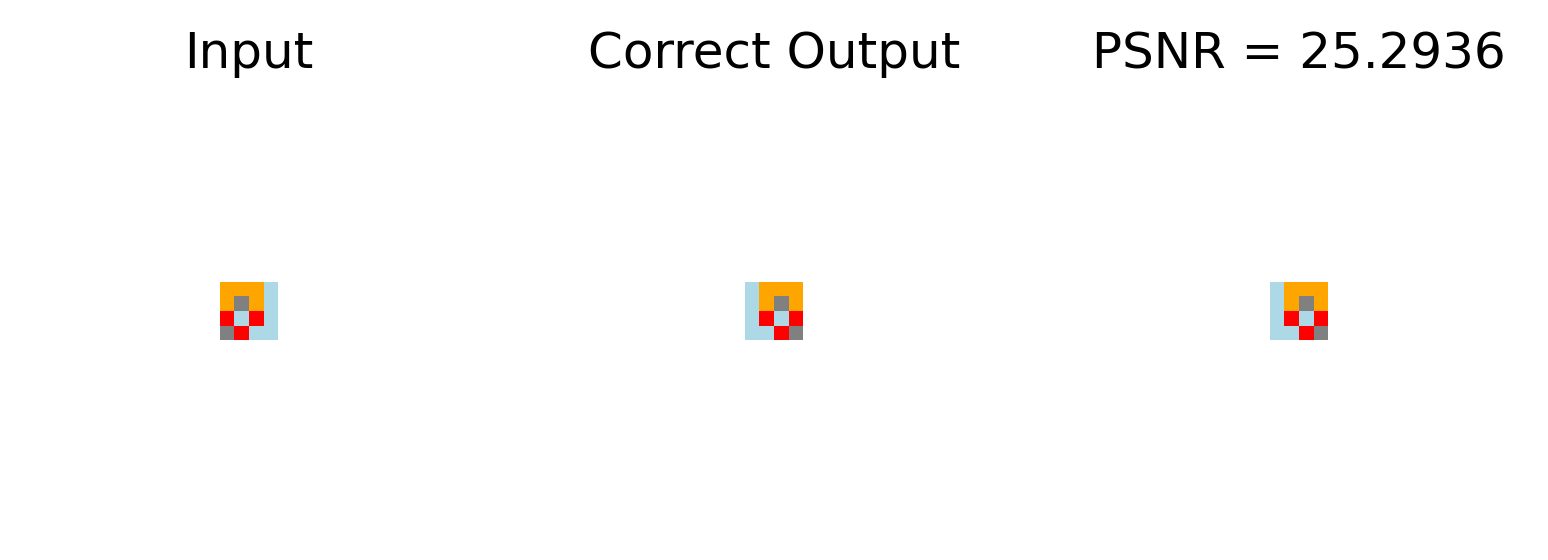

4: 68b16354 - Example #1:


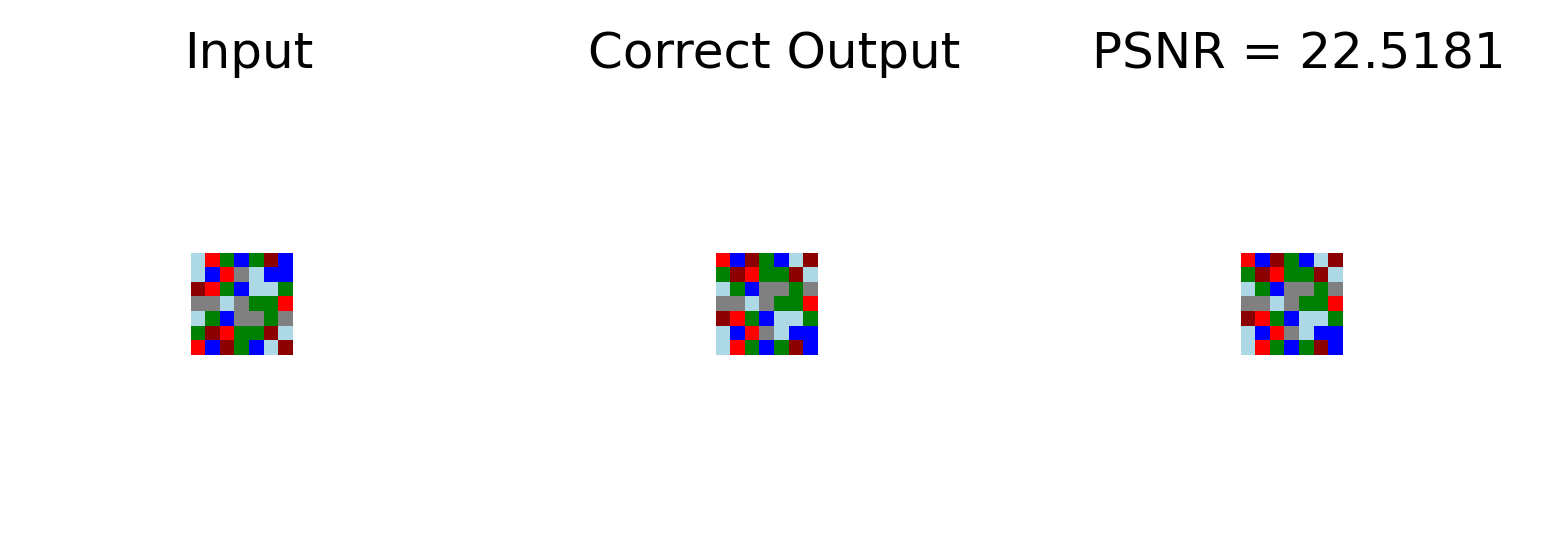

5: 68b16354 - Example #2:


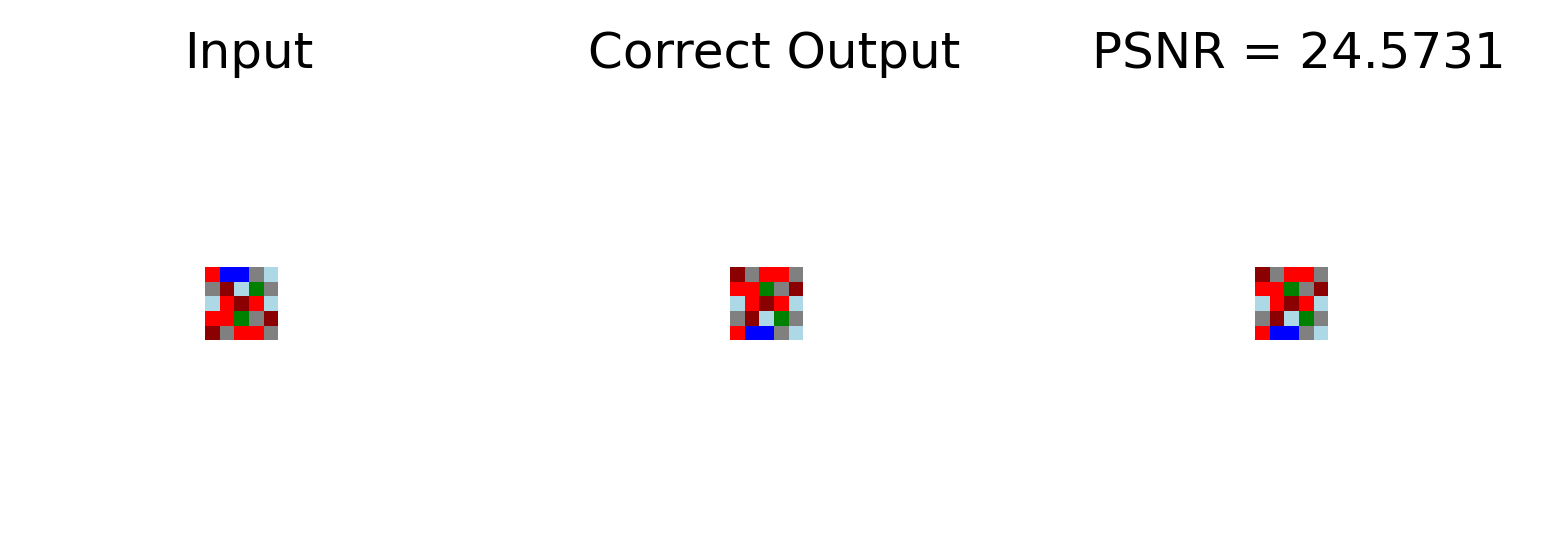

6: 68b16354 - Example #3:


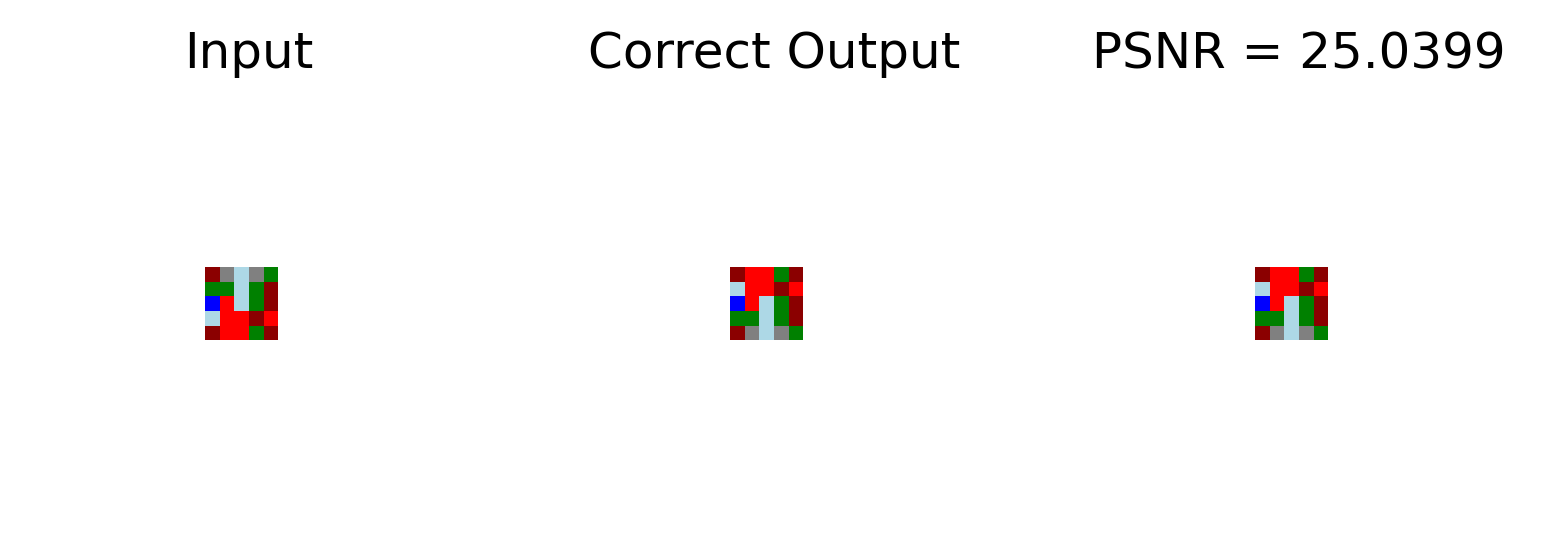

7: 74dd1130 - Example #1:


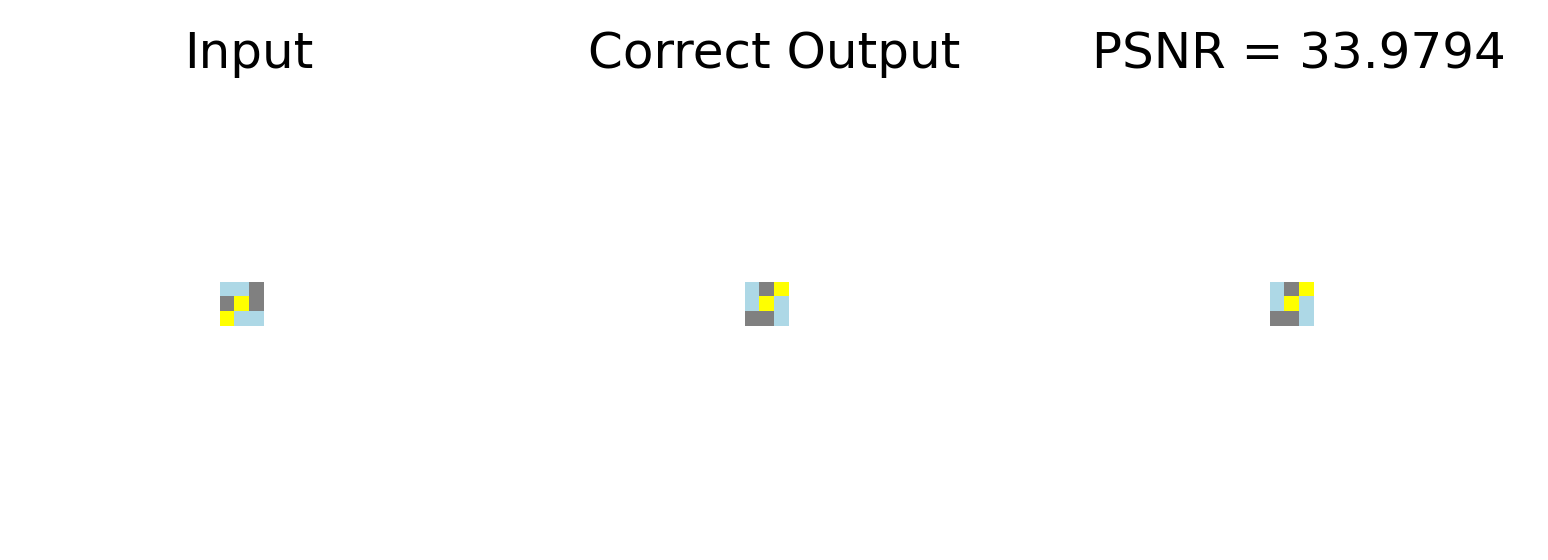

8: 74dd1130 - Example #2:


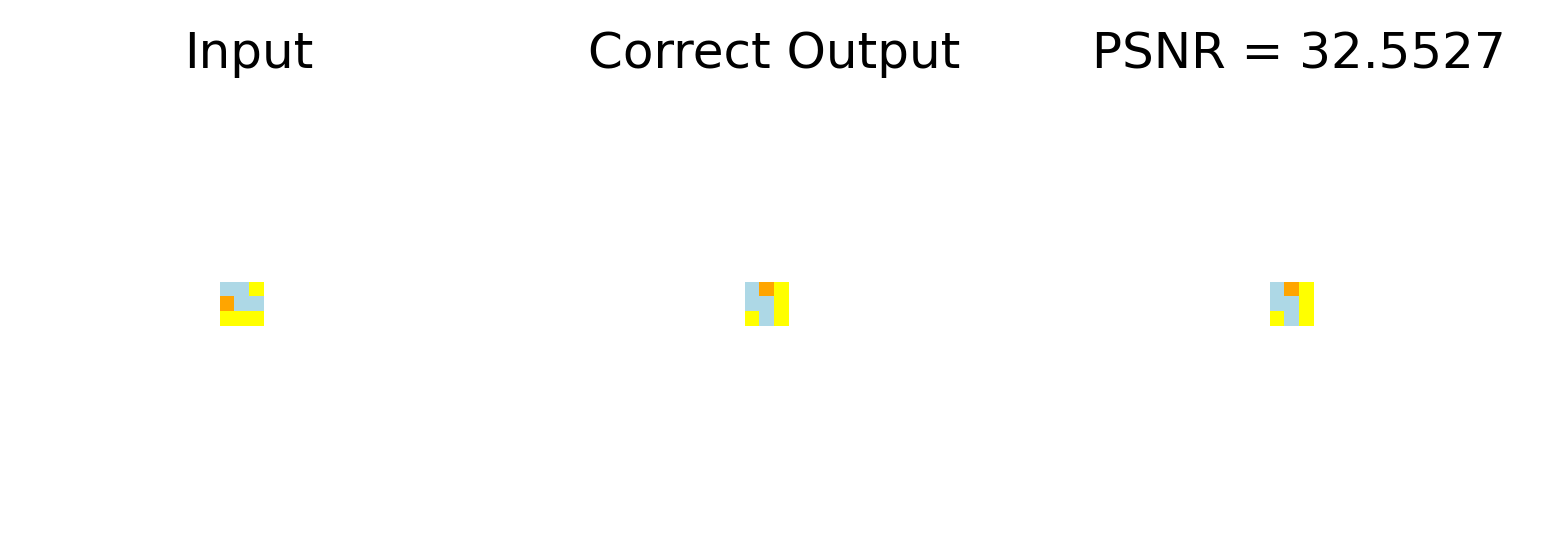

9: 74dd1130 - Example #3:


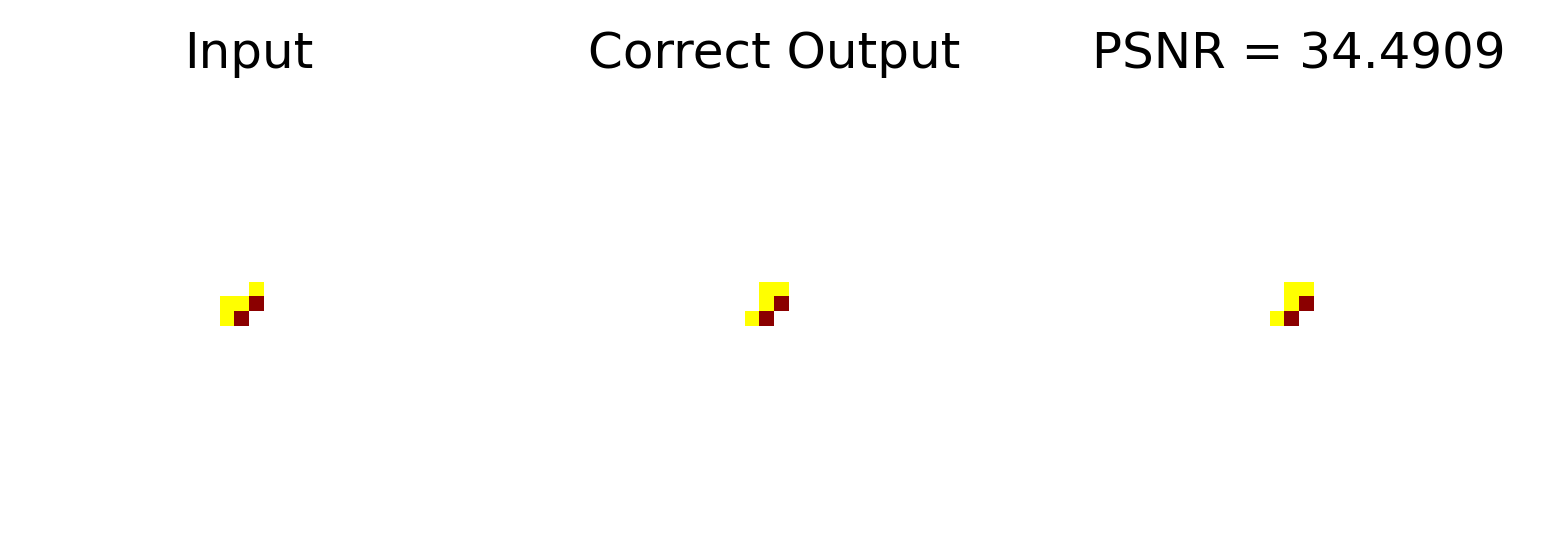

10: 74dd1130 - Example #4:


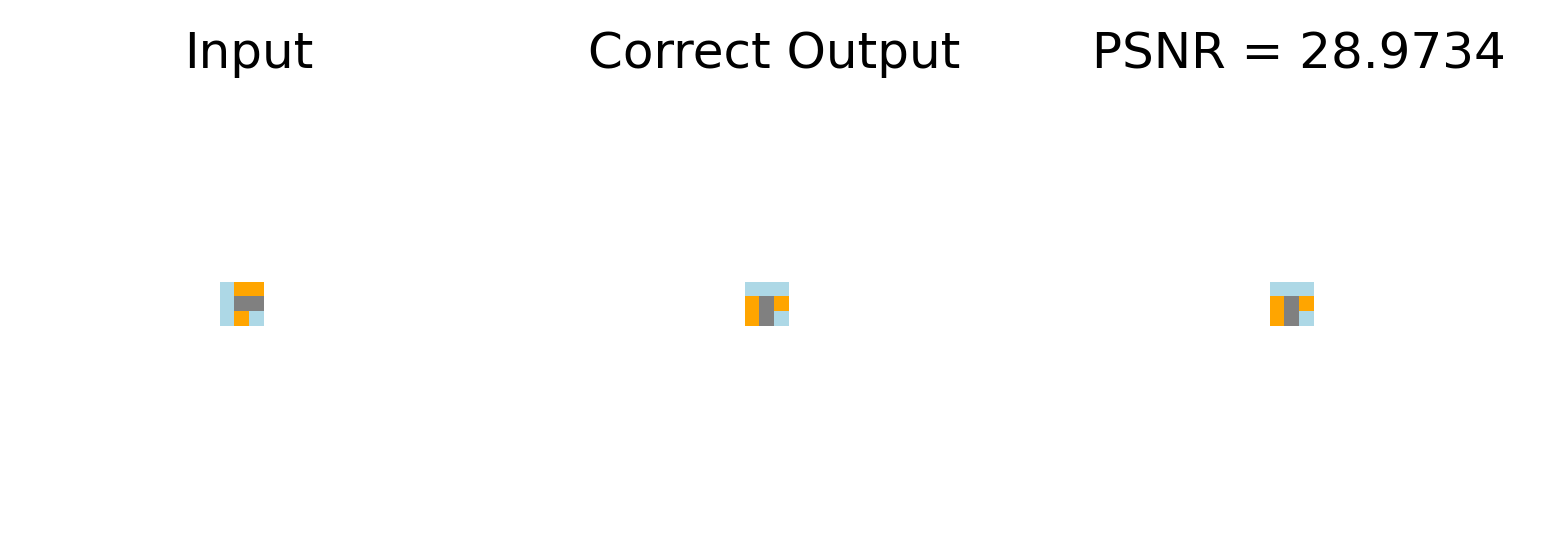

11: 3c9b0459 - Example #1:


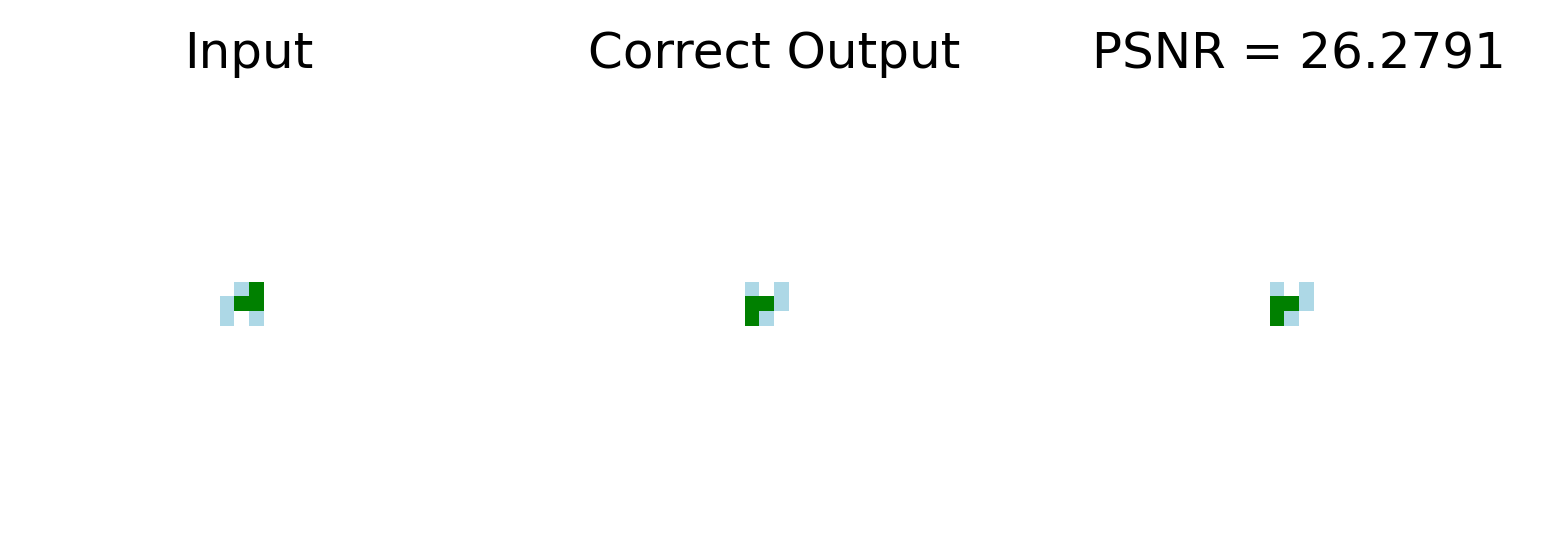

12: 3c9b0459 - Example #2:


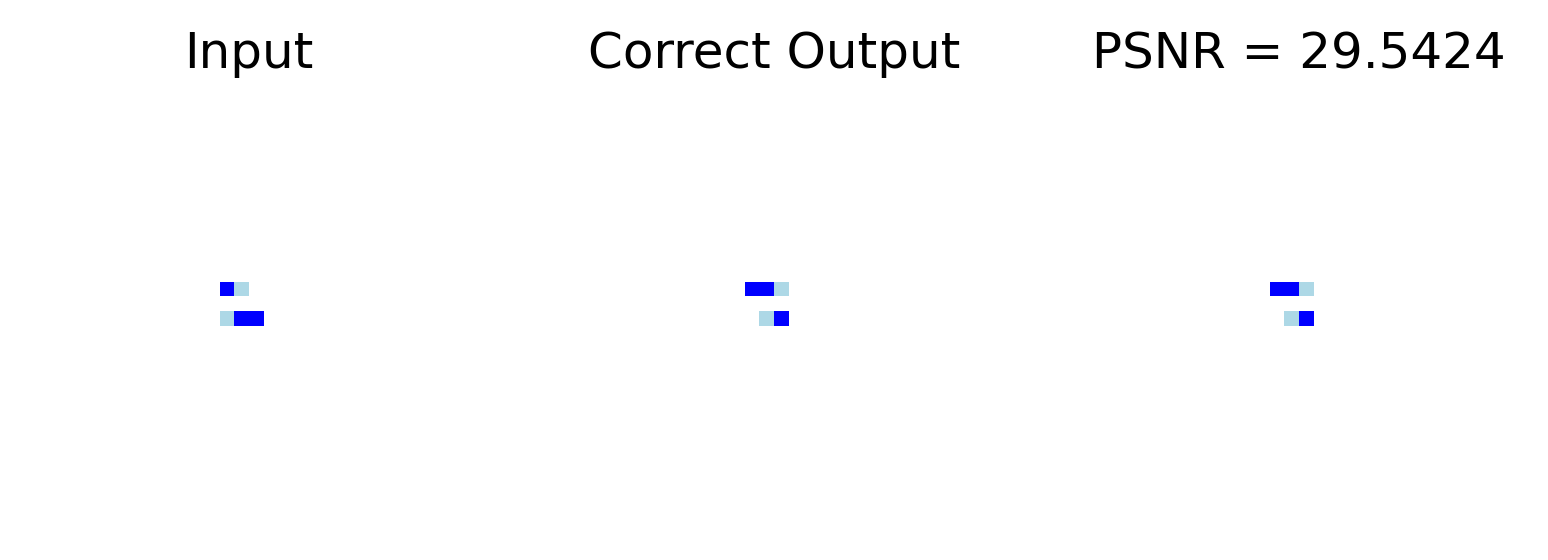

13: 3c9b0459 - Example #3:


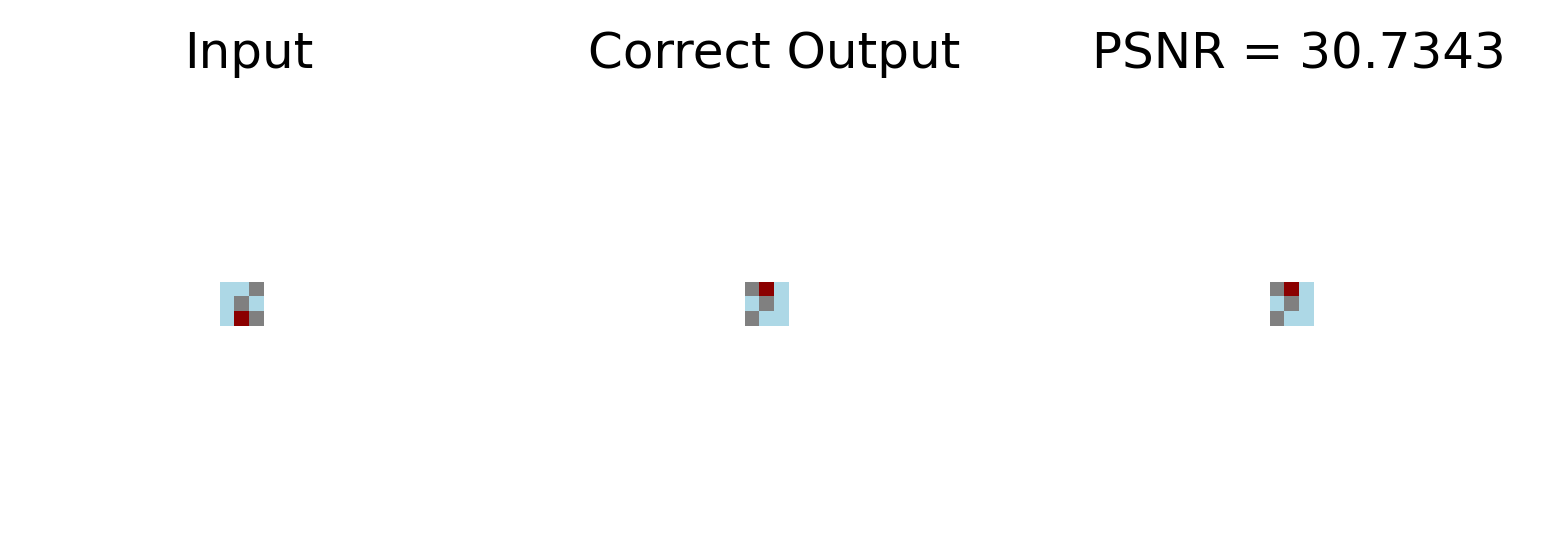

14: 3c9b0459 - Example #4:


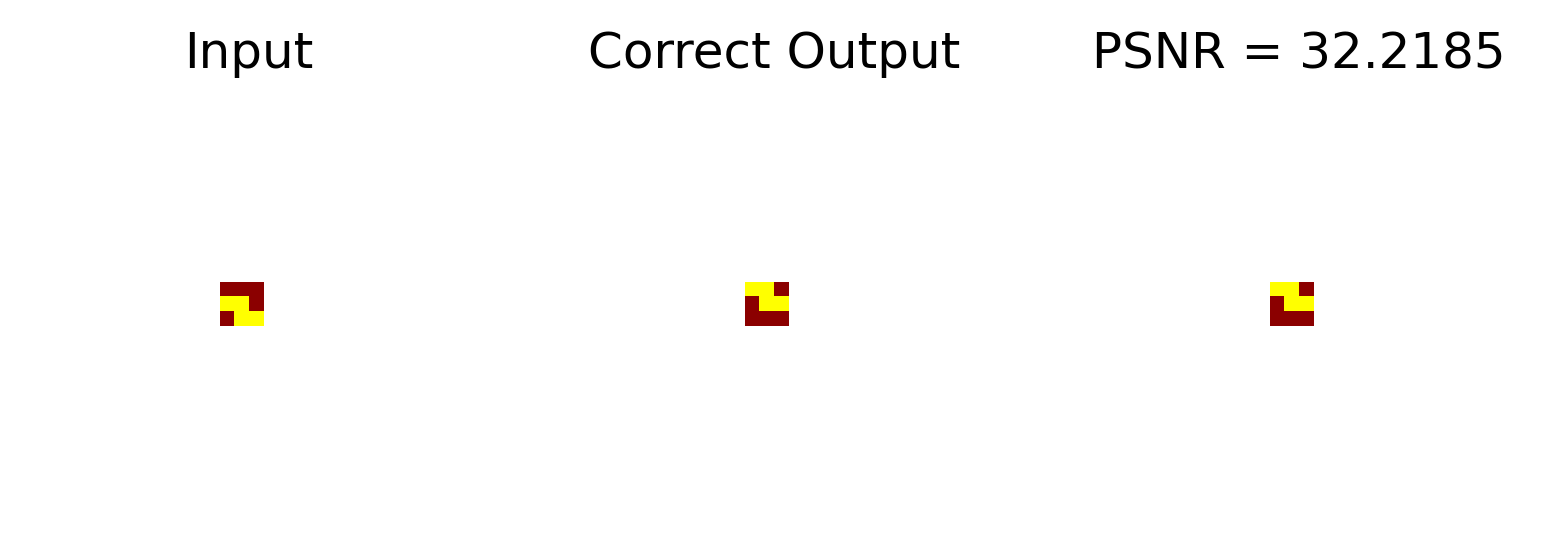

15: 6150a2bd - Example #1:


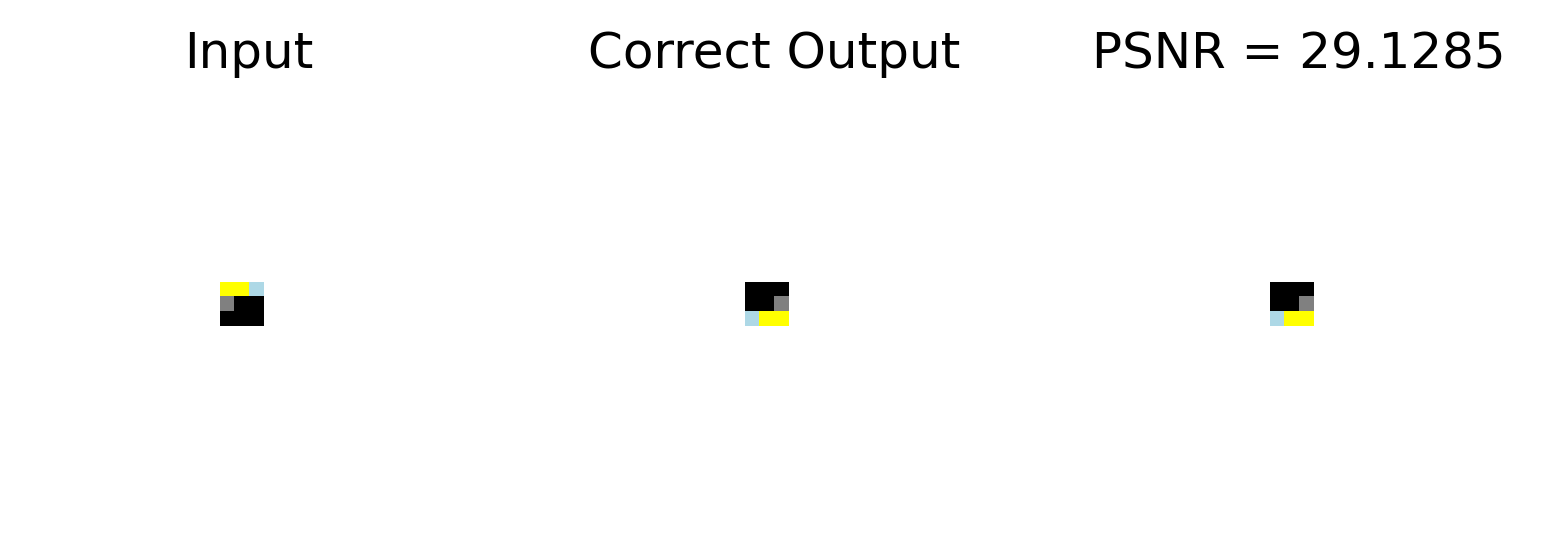

16: 6150a2bd - Example #2:


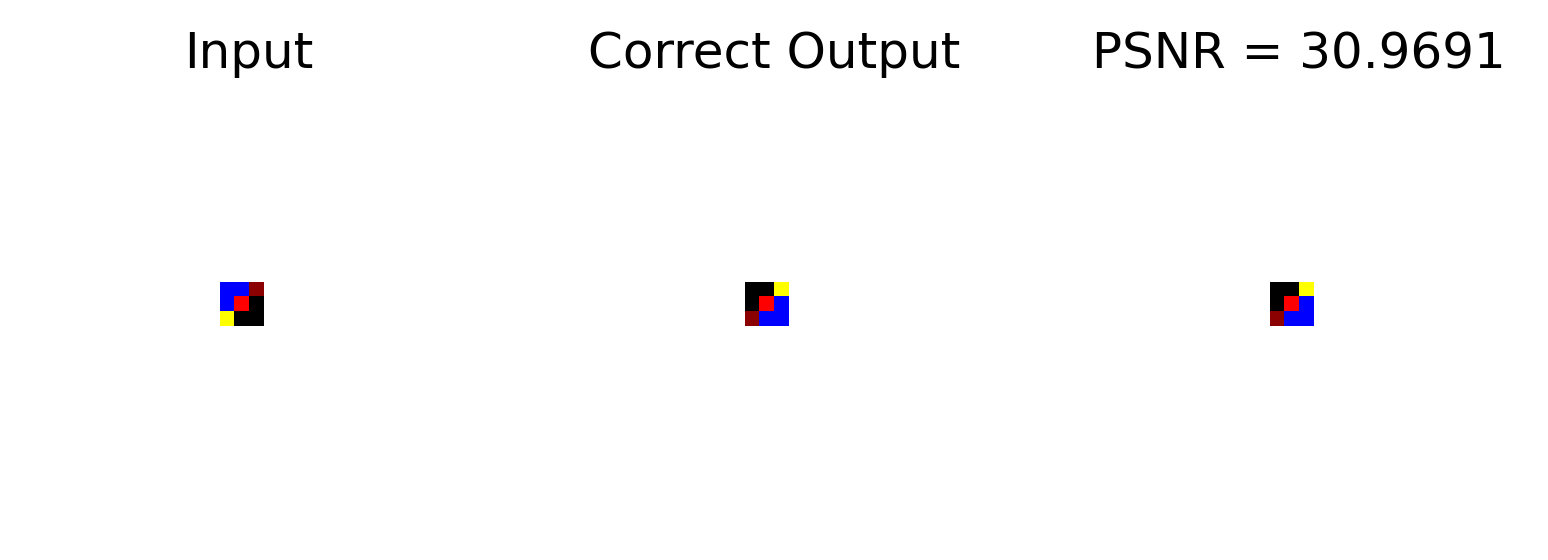

17: 9172f3a0 - Example #1:


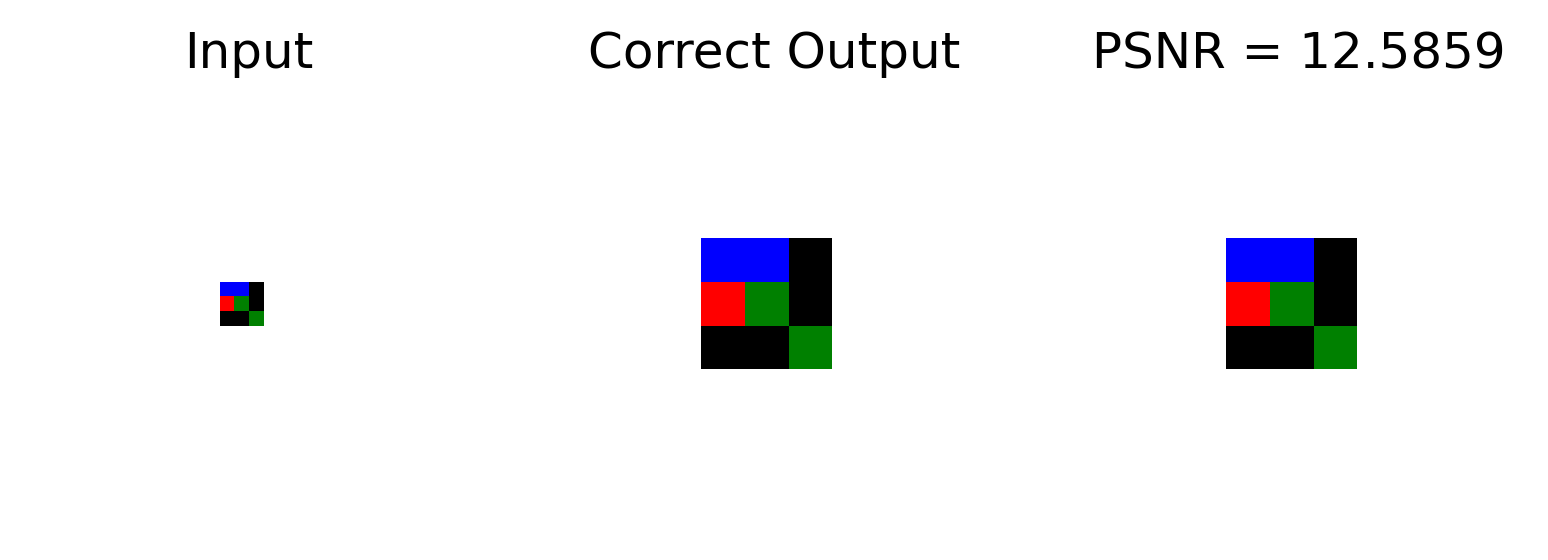

18: 9172f3a0 - Example #2:


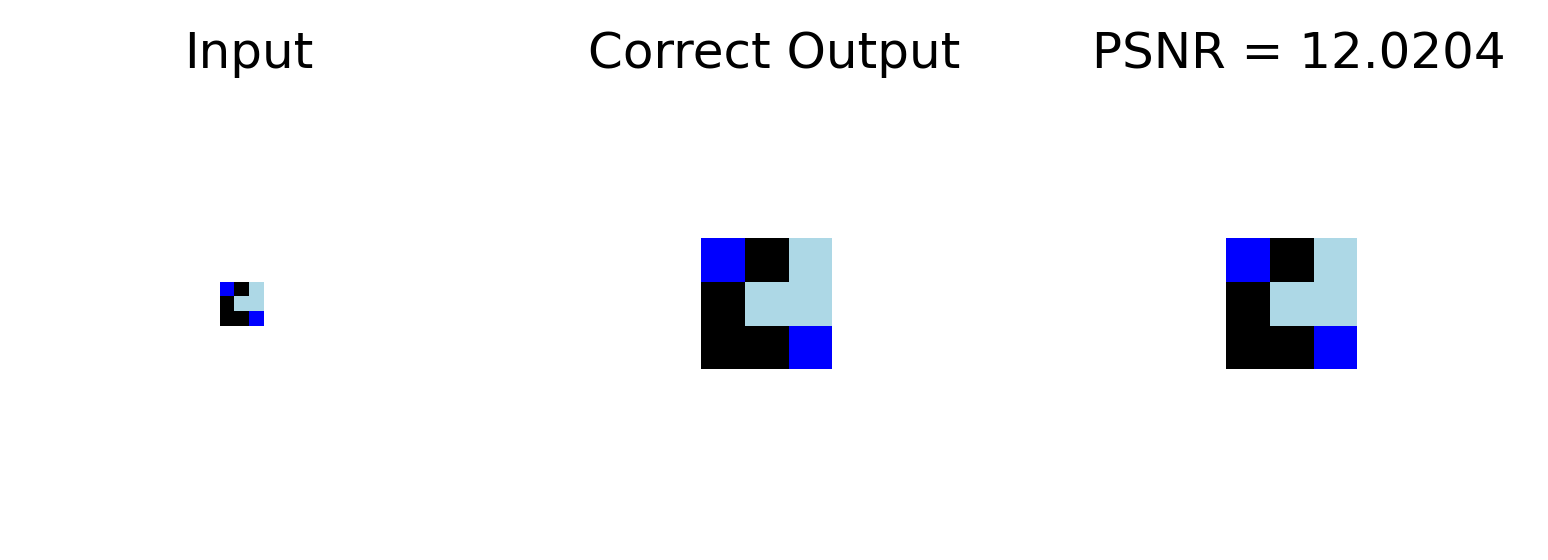

19: 9dfd6313 - Example #1:


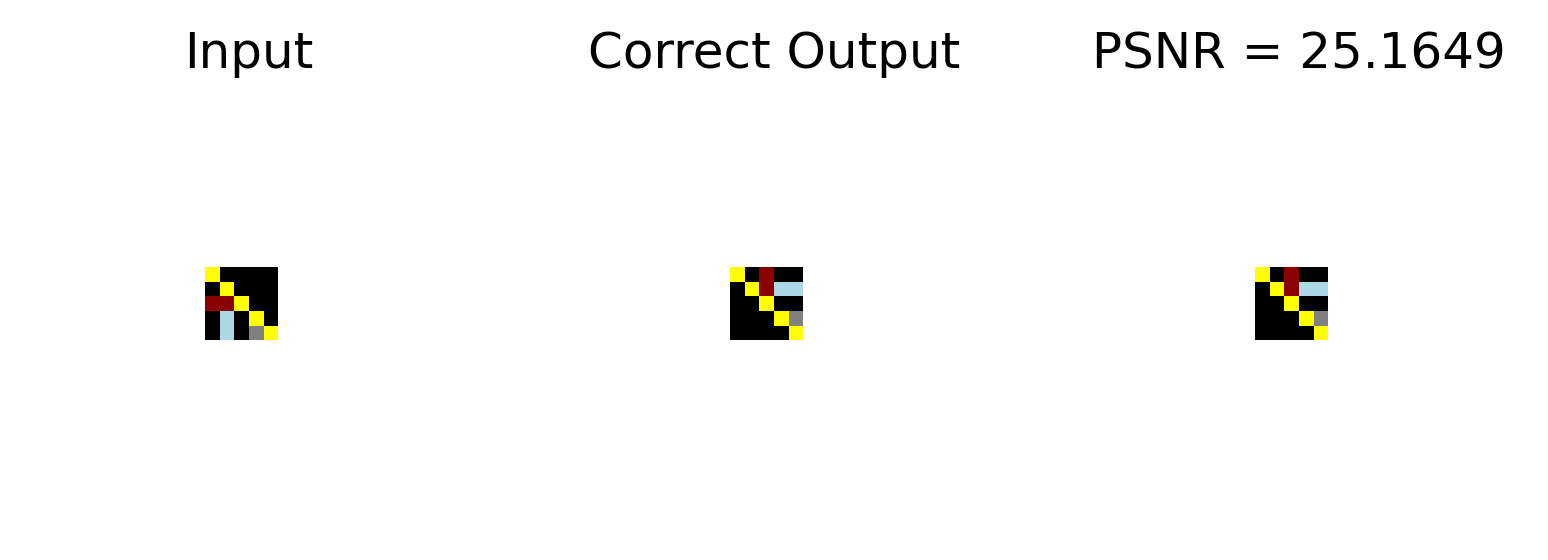

20: 9dfd6313 - Example #2:


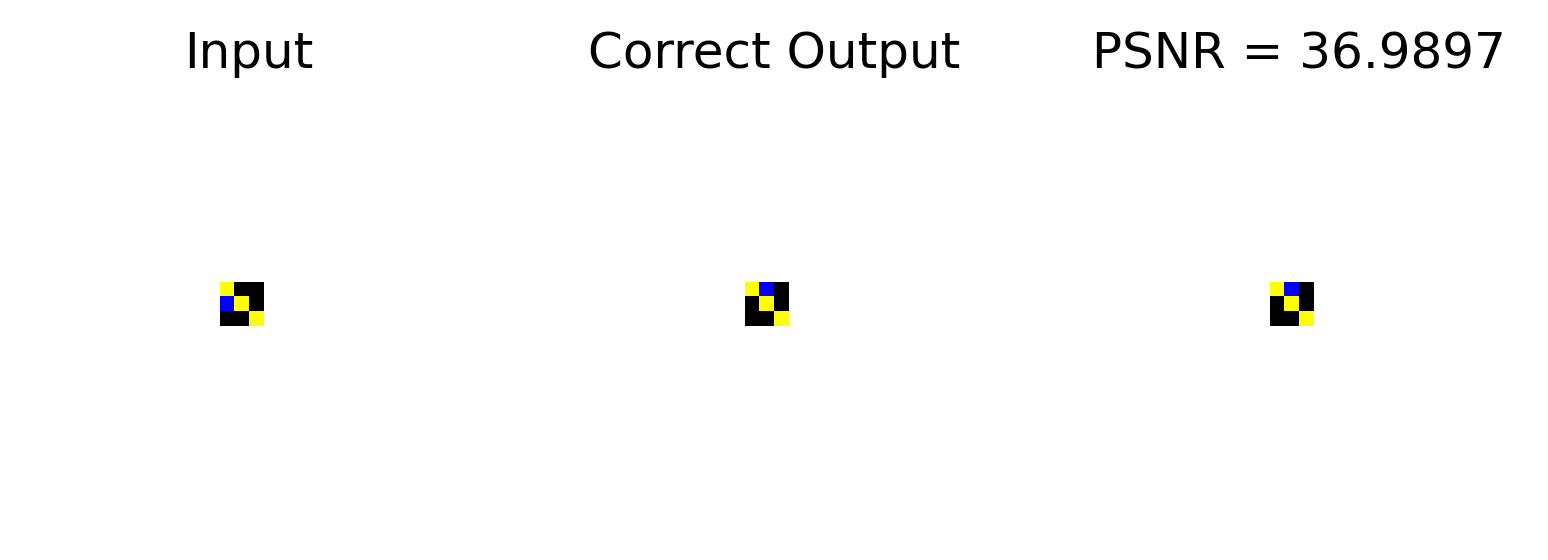

21: 9dfd6313 - Example #3:


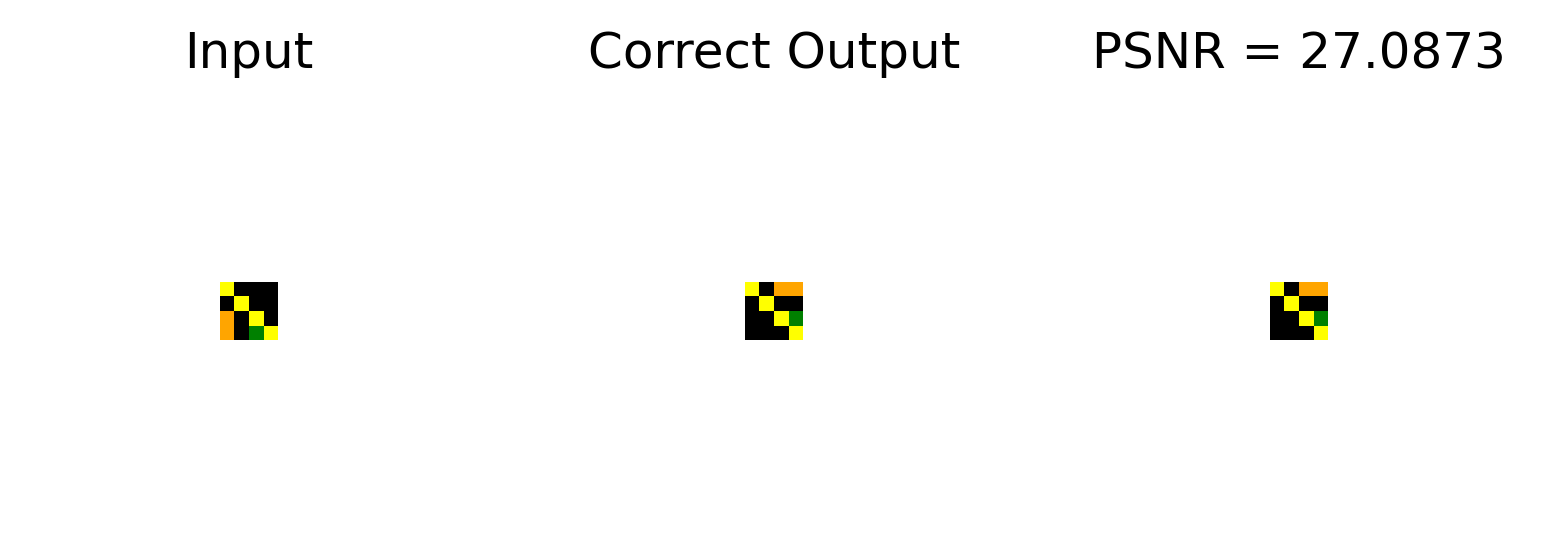

22: a416b8f3 - Example #1:


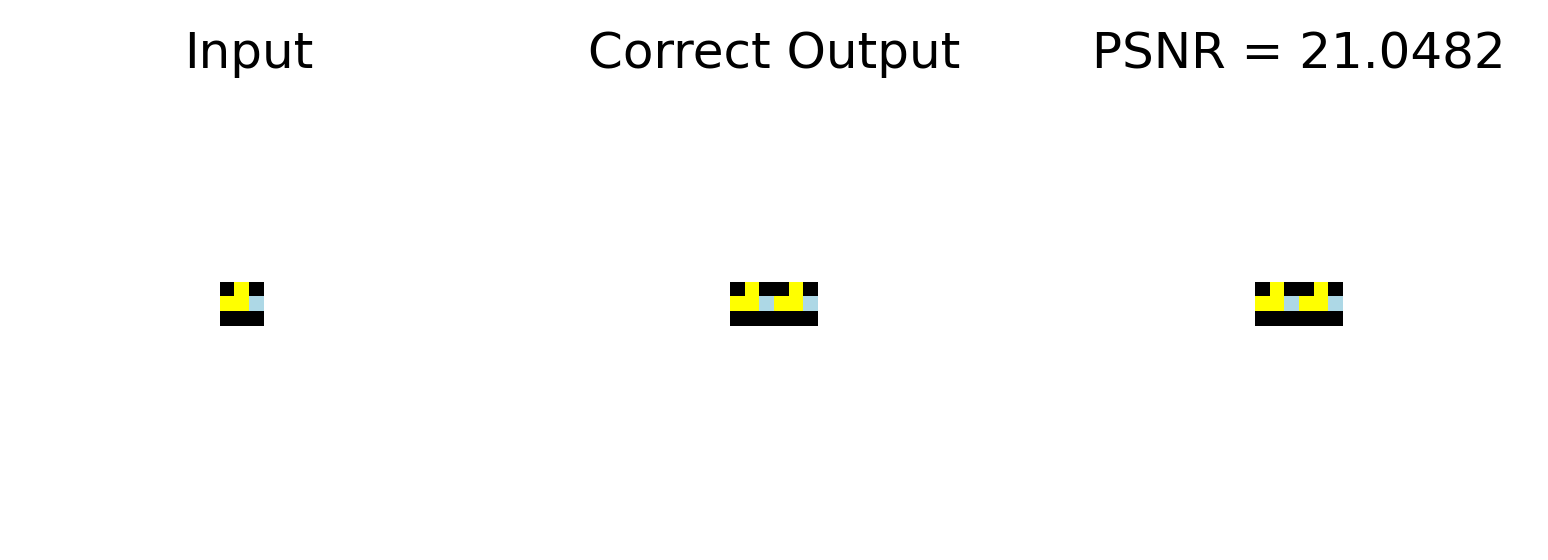

23: a416b8f3 - Example #2:


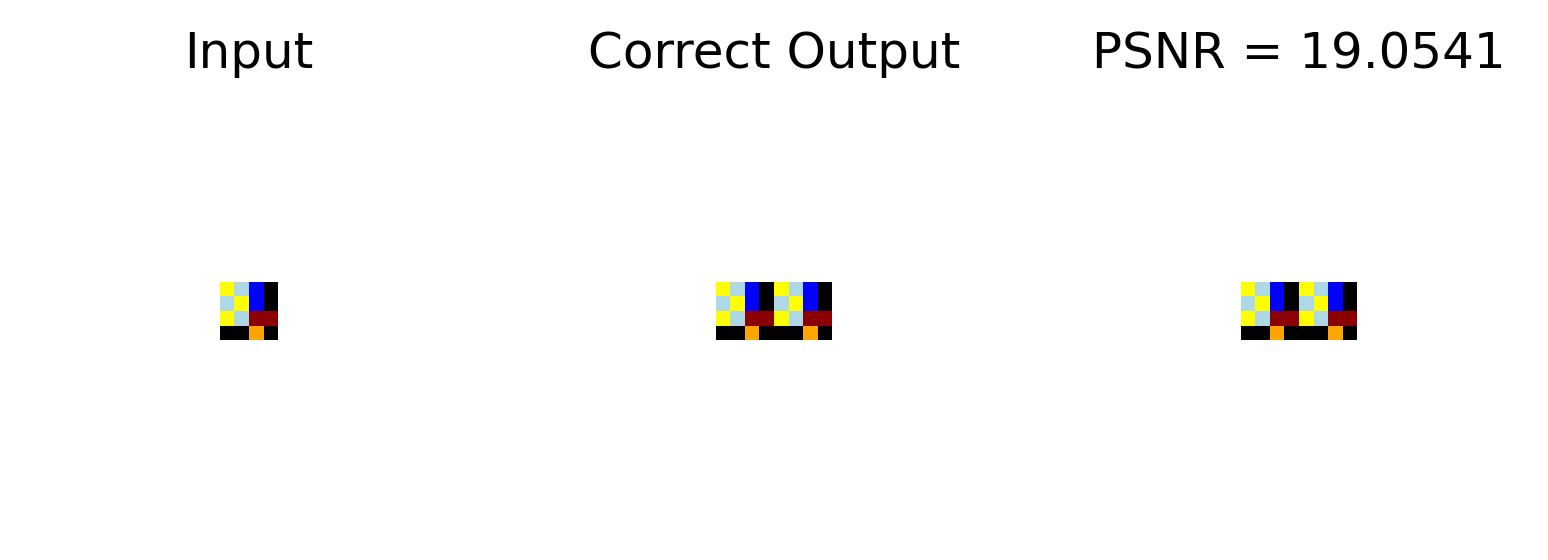

24: a416b8f3 - Example #3:


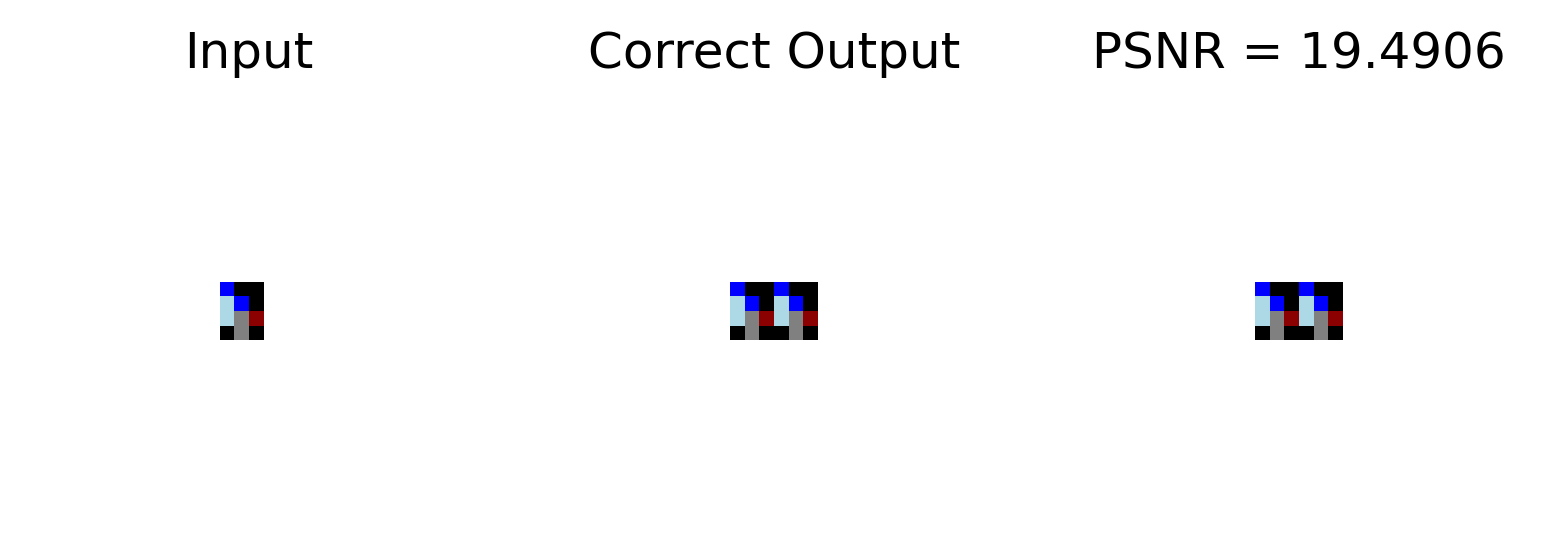

25: b1948b0a - Example #1:


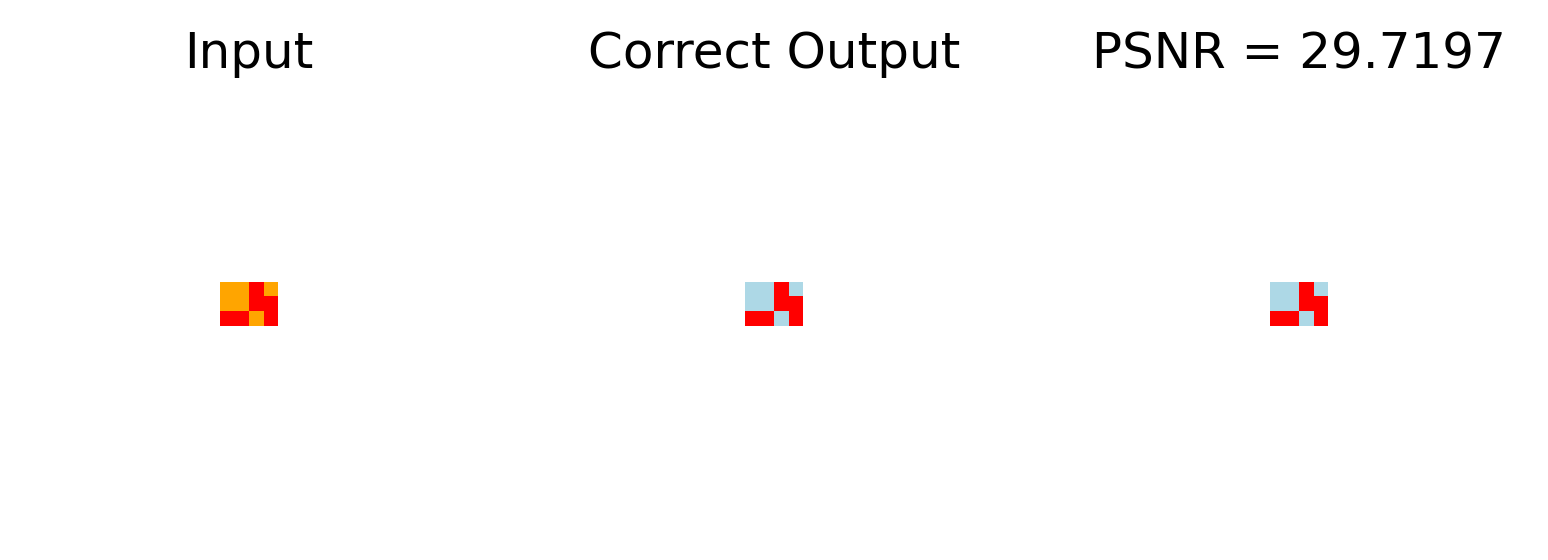

26: b1948b0a - Example #2:


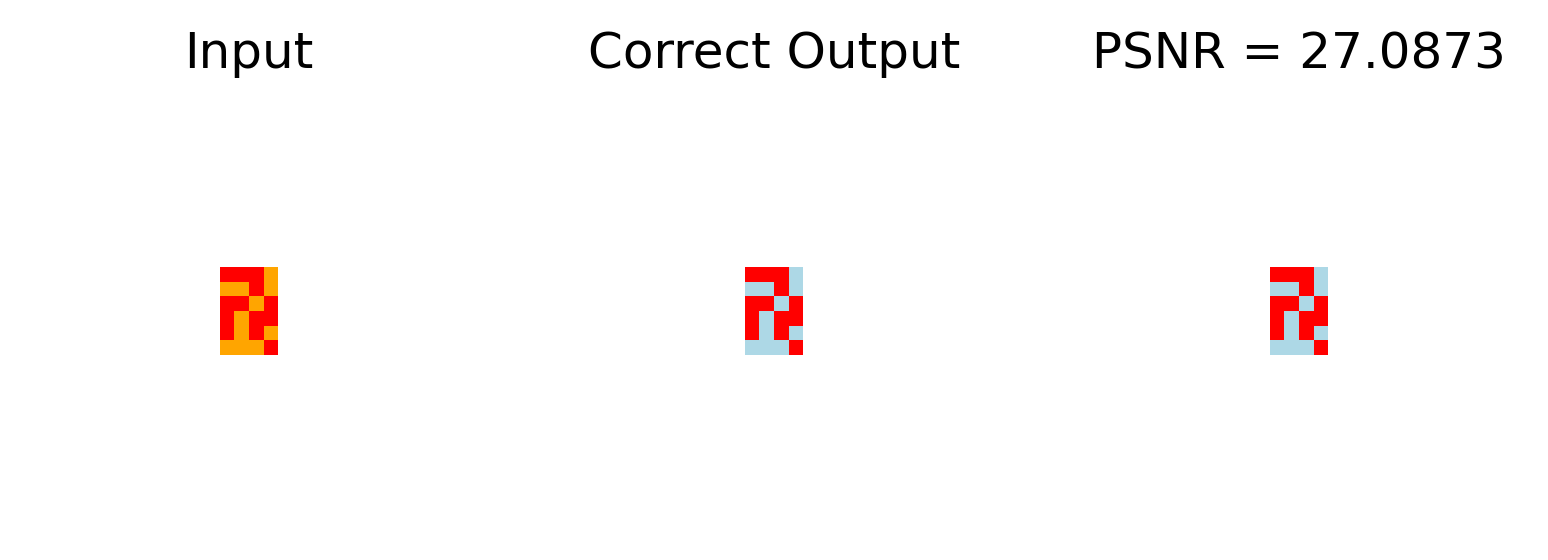

27: b1948b0a - Example #3:


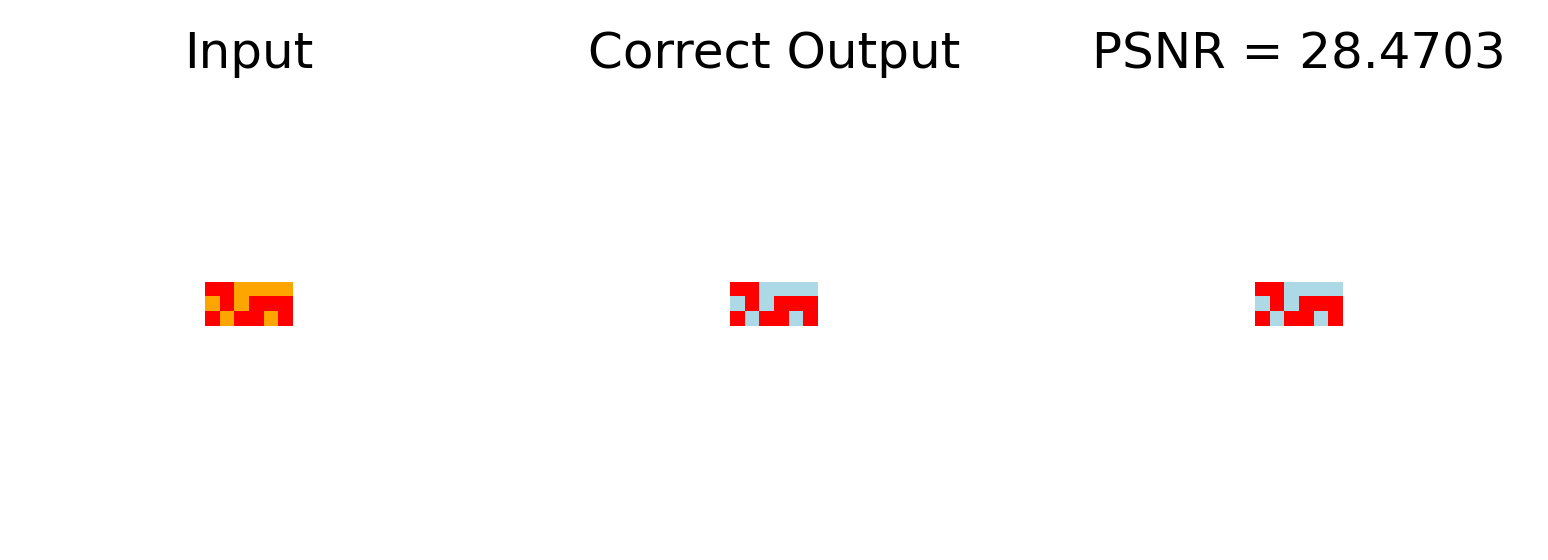

28: c59eb873 - Example #1:


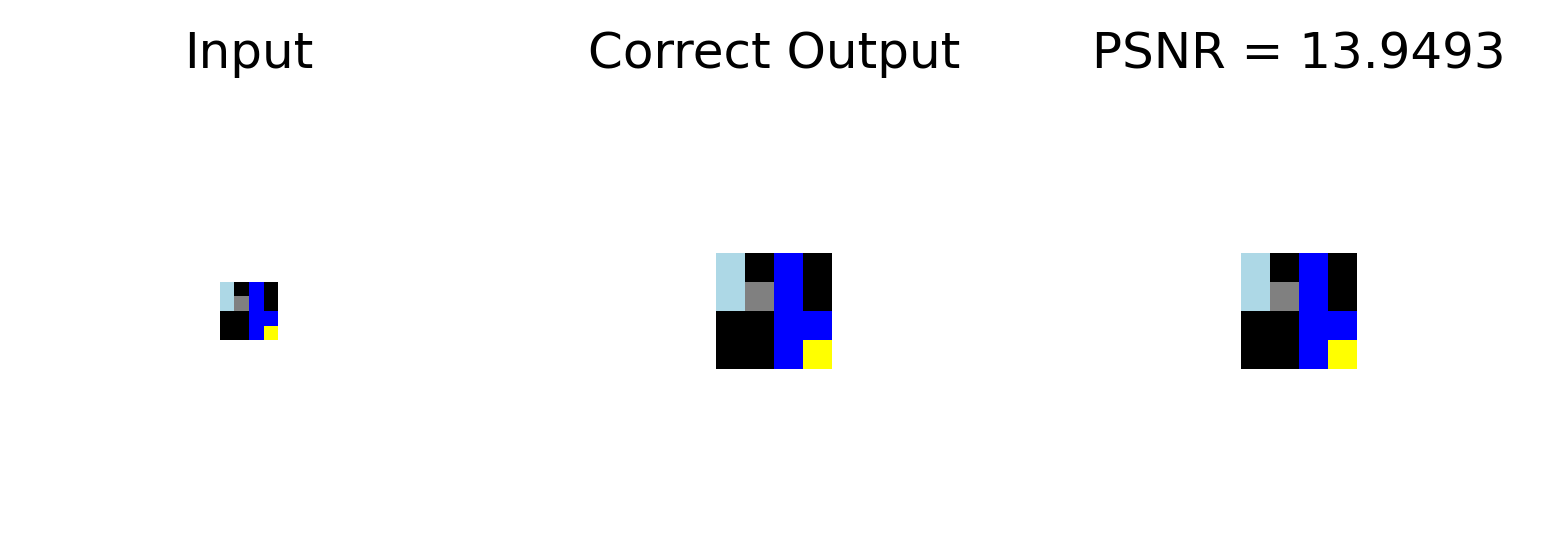

29: c59eb873 - Example #2:


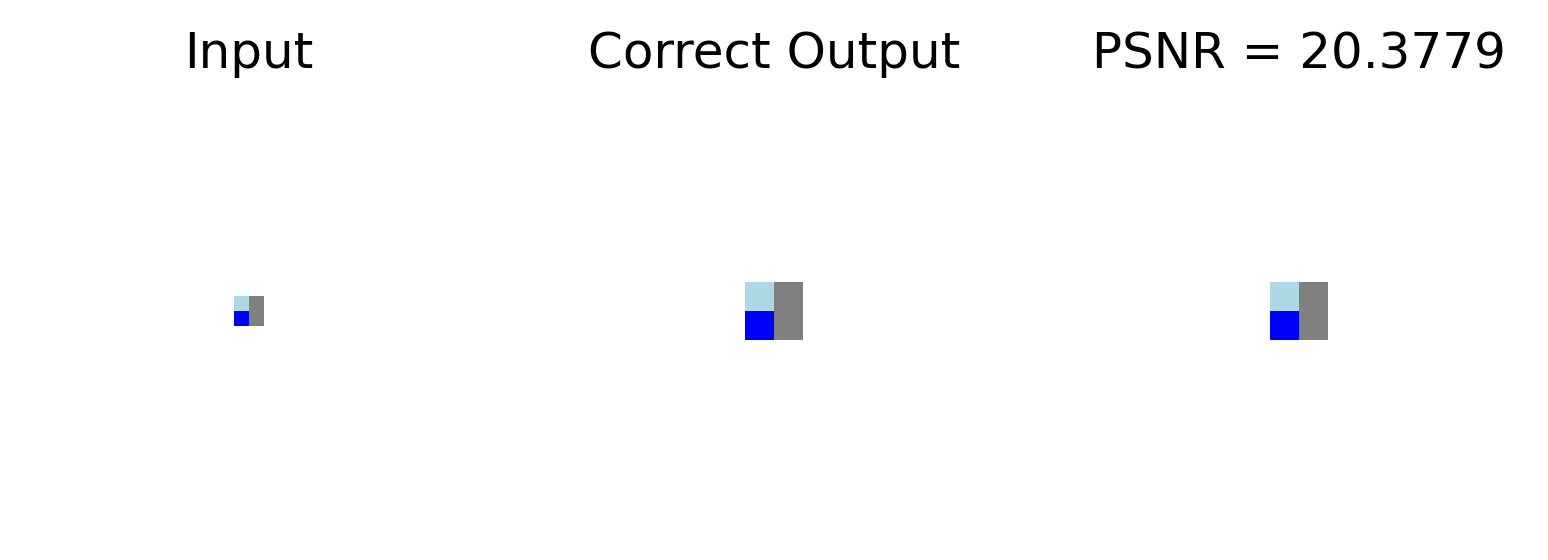

30: c59eb873 - Example #3:


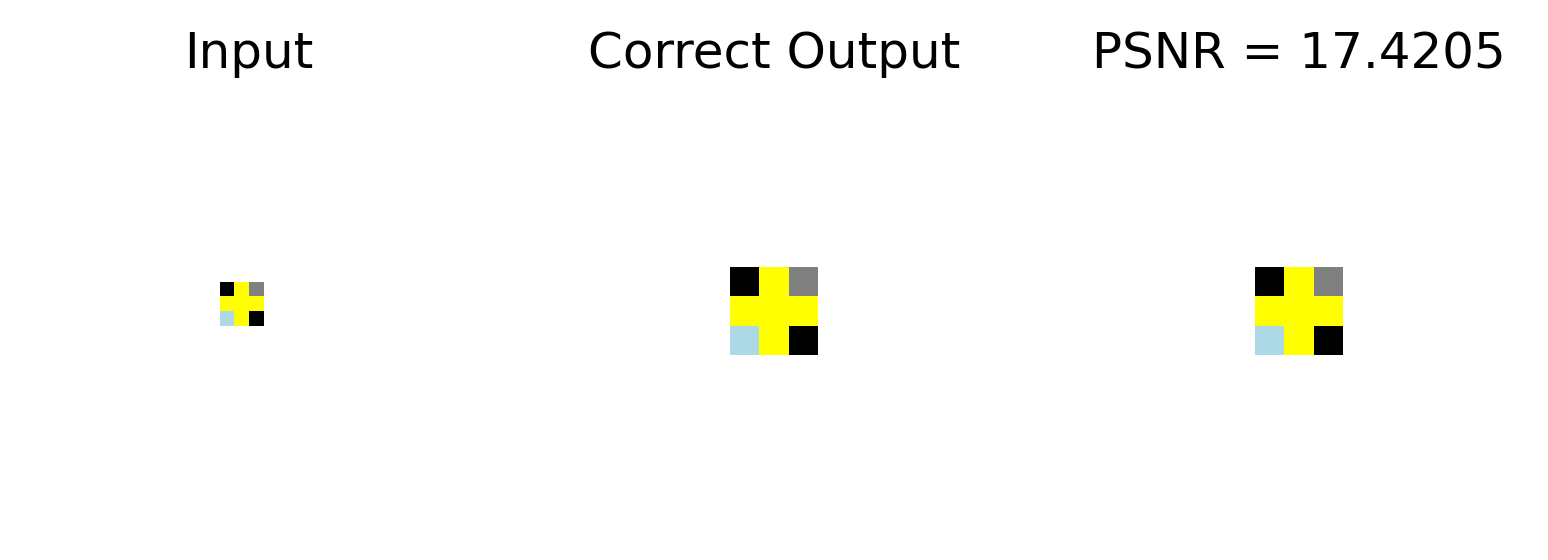

31: c8f0f002 - Example #1:


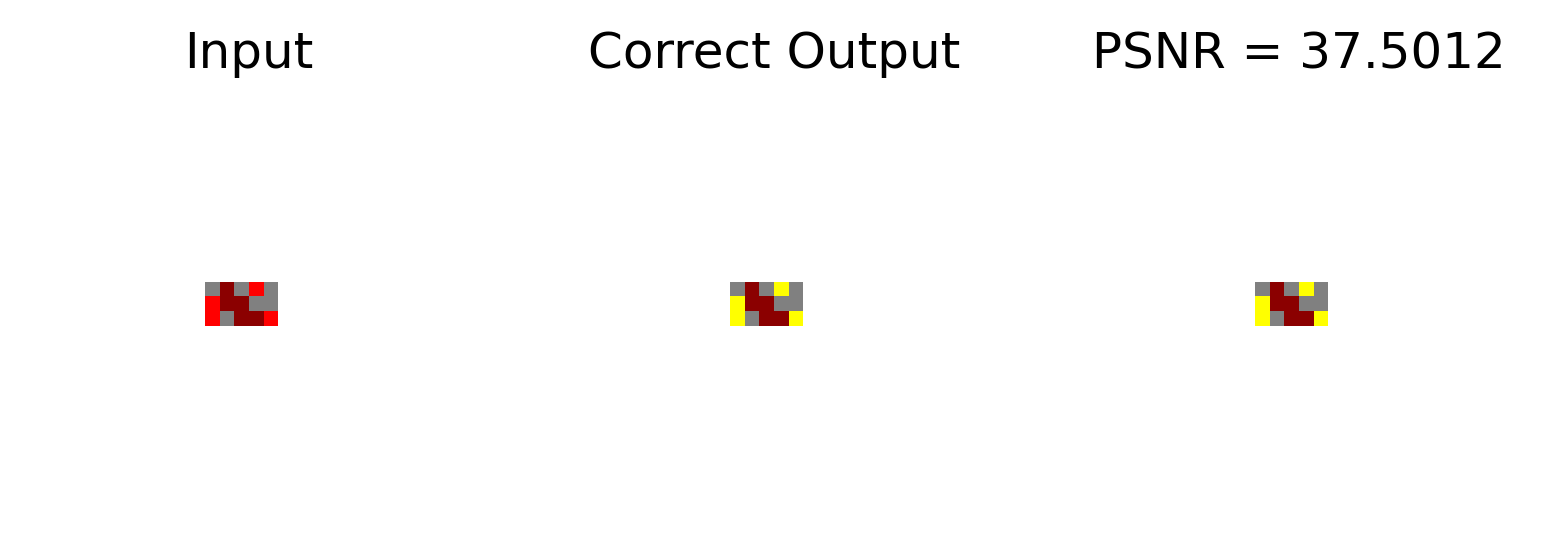

32: c8f0f002 - Example #2:


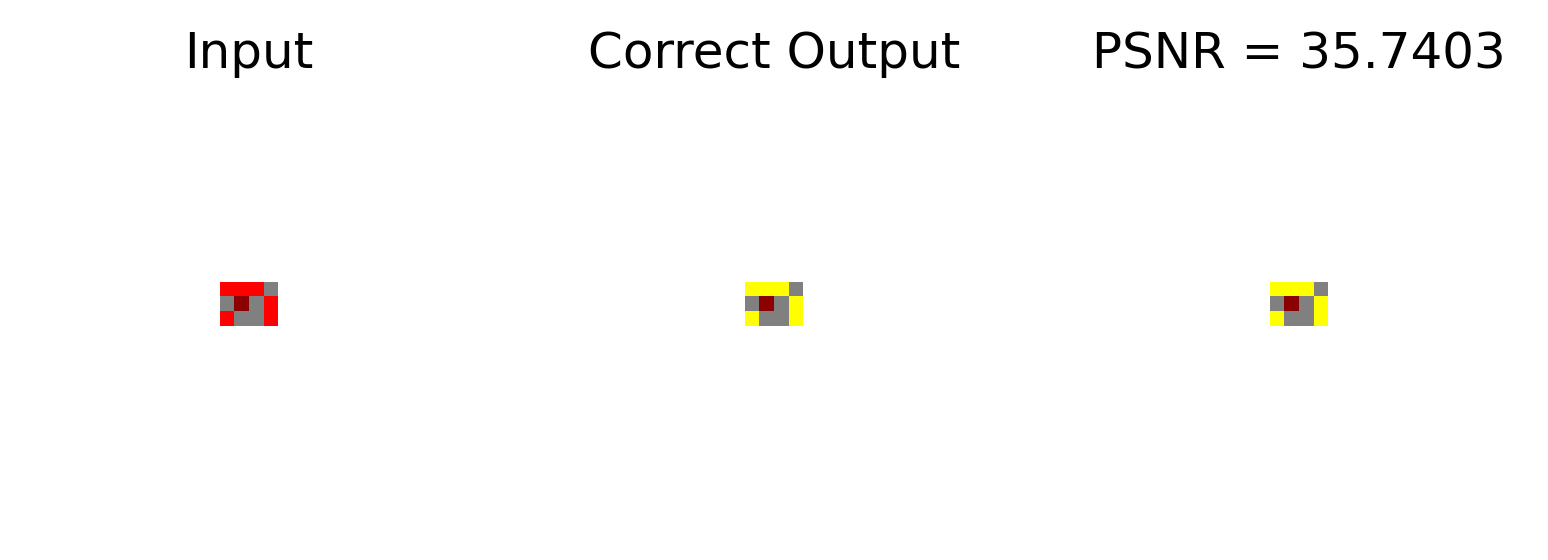

33: c8f0f002 - Example #3:


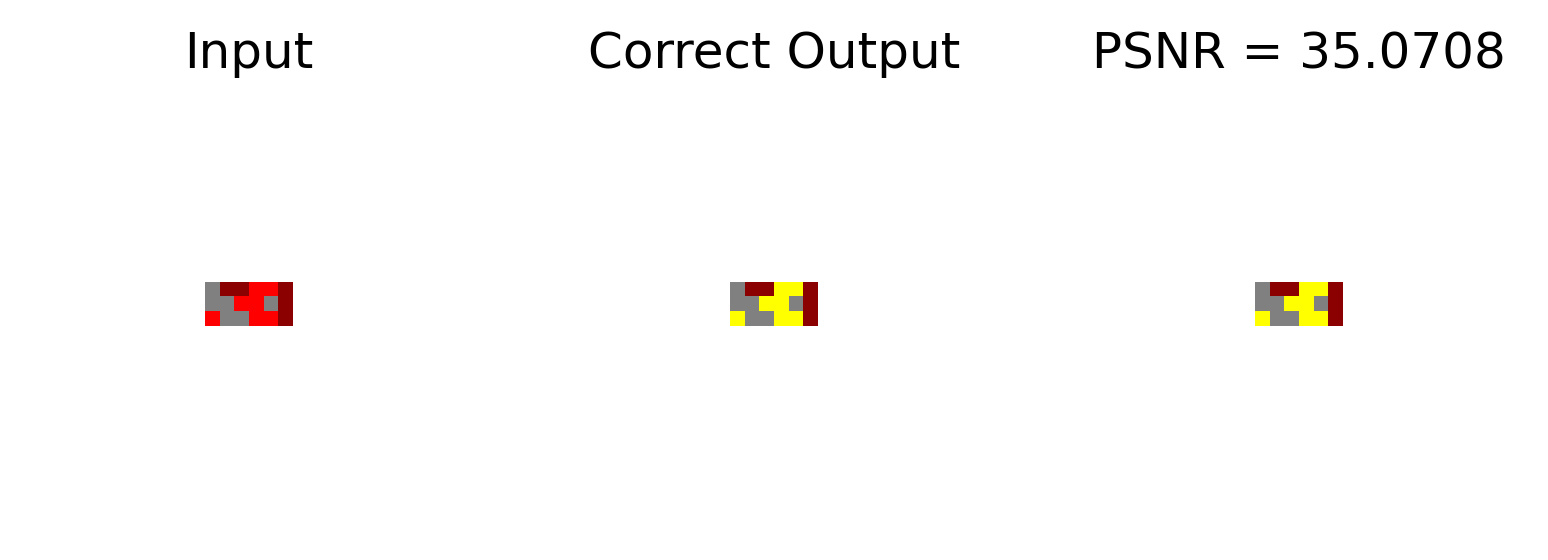

34: d10ecb37 - Example #1:


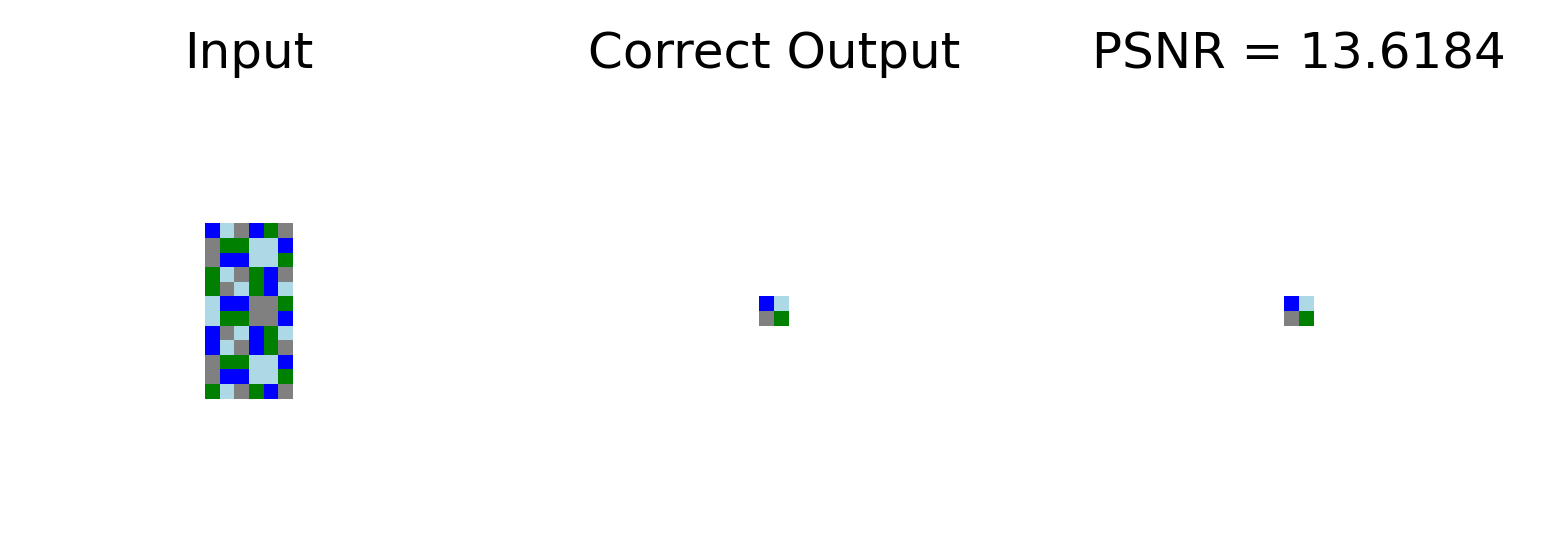

35: d10ecb37 - Example #2:


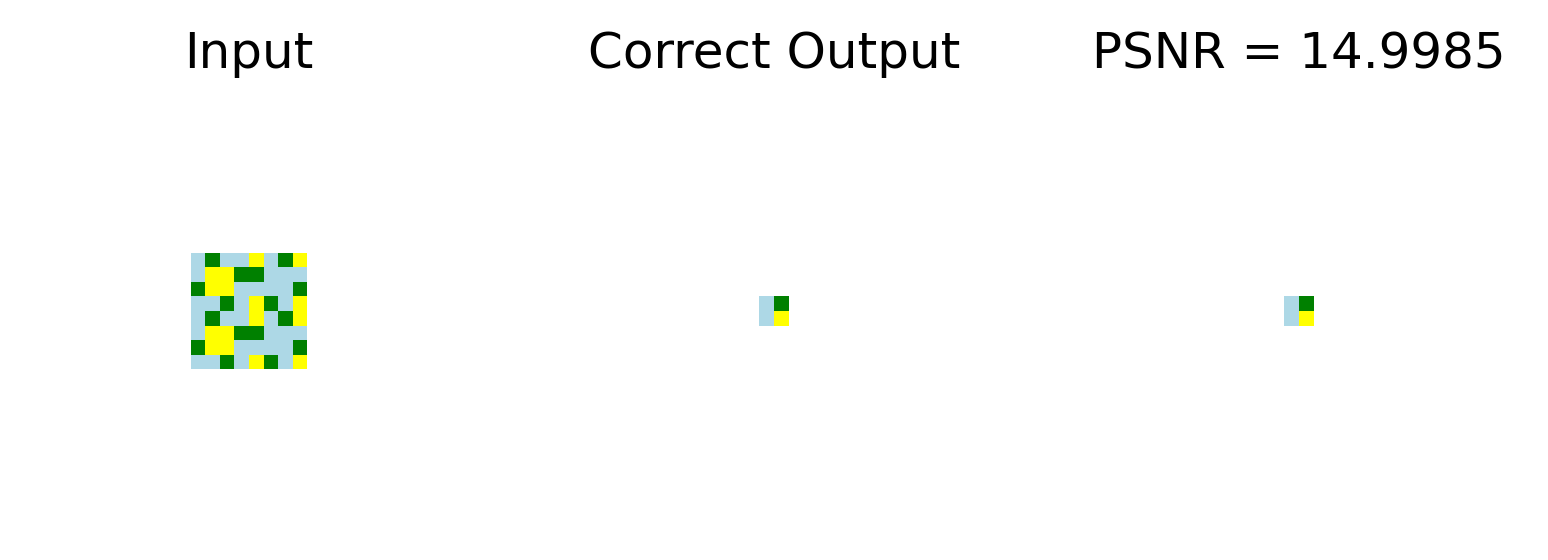

36: d10ecb37 - Example #3:


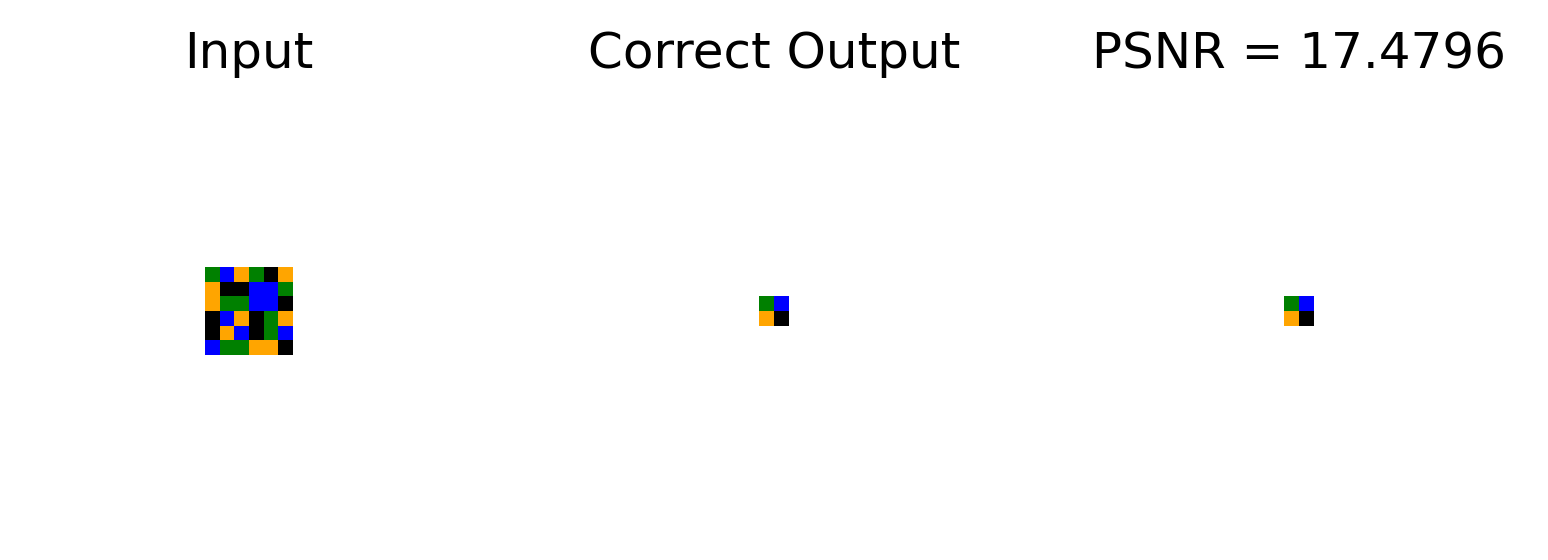

37: d511f180 - Example #1:


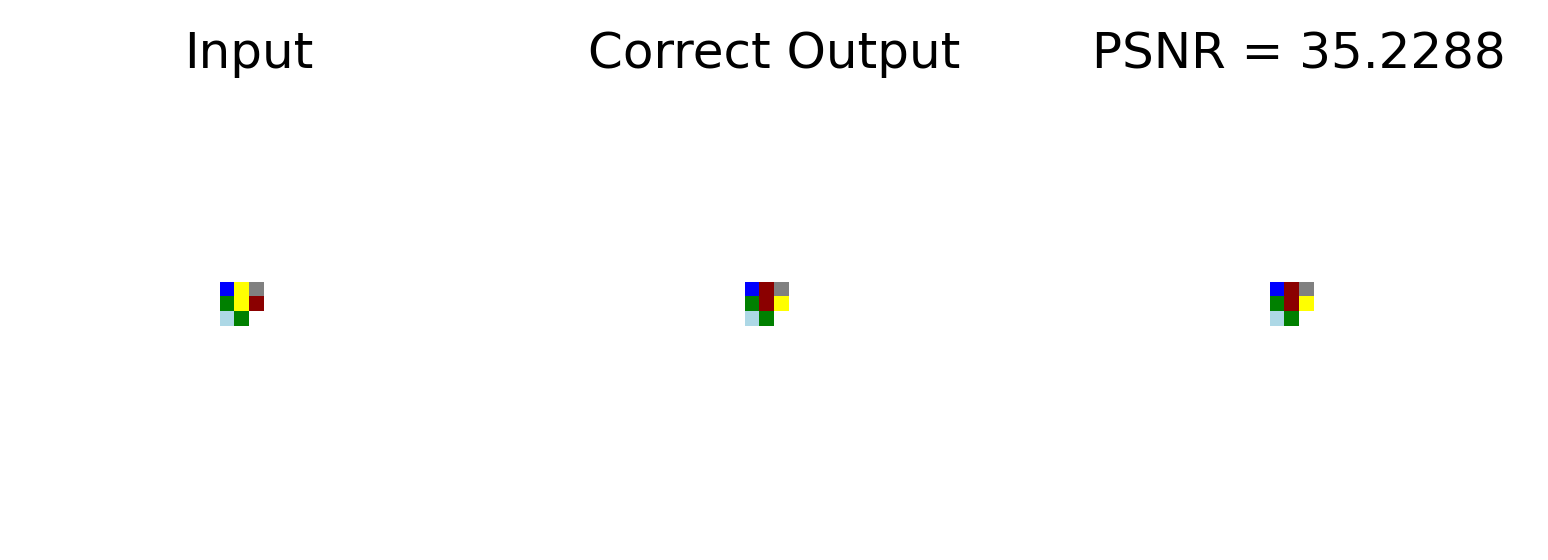

38: d511f180 - Example #2:


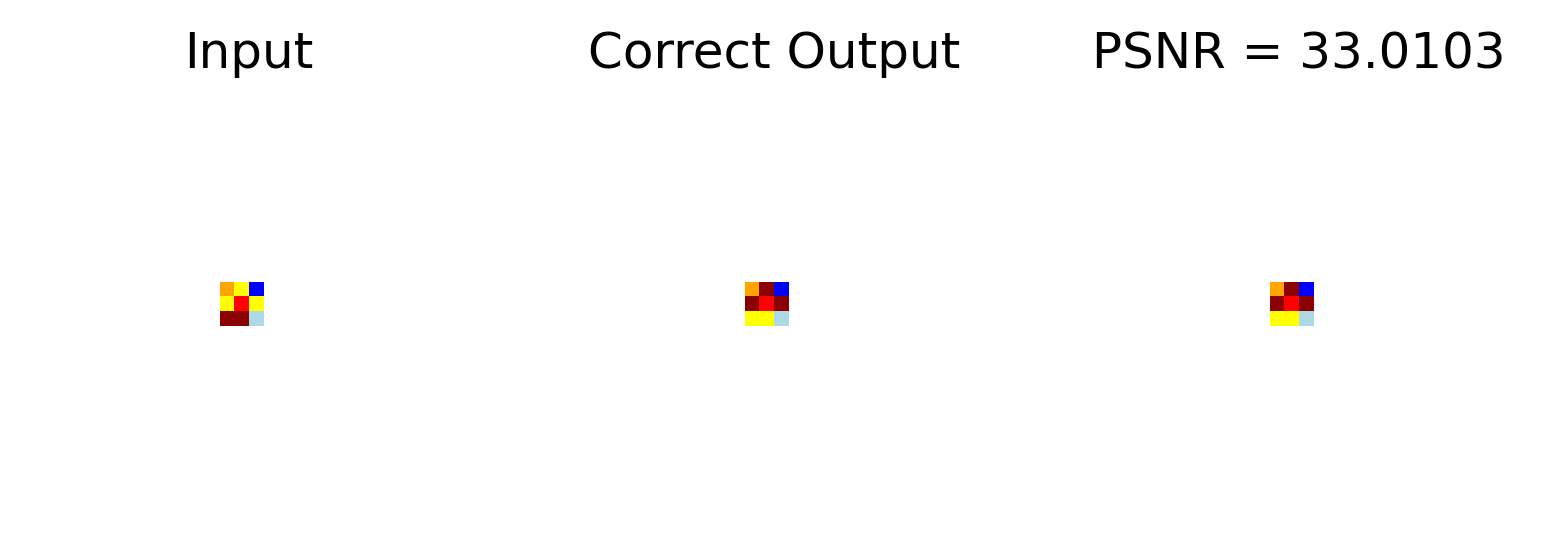

39: d511f180 - Example #3:


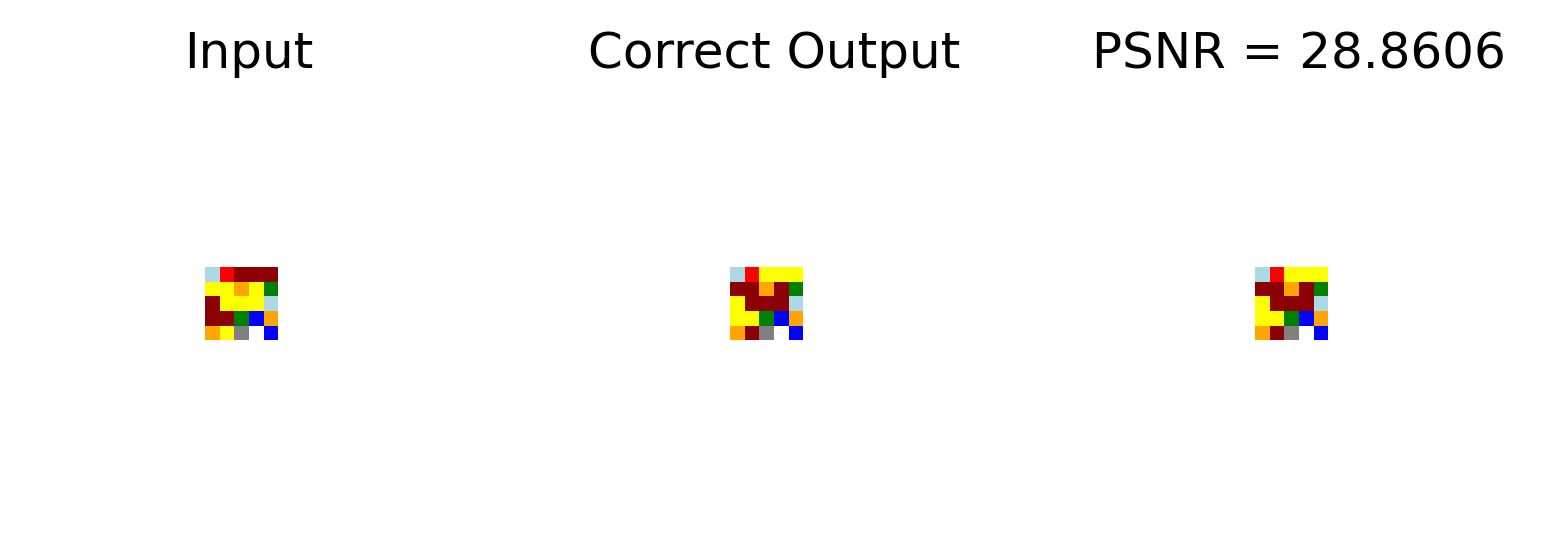

In [28]:
from torchmetrics.image import PeakSignalNoiseRatio

psnr = PeakSignalNoiseRatio(
    data_range=(0, 10),
    reduction=None
)

k = 1
for challenge_id in challenge_ids:
    try:
        X_samples, y_samples = dataset.get_samples(challenge_id)
    except:
        continue

    for i, X_sample in enumerate(X_samples):
        print(f"{k}: {challenge_id} - Example #{i + 1}:")
        
        psnr_value = psnr(X_sample, y_samples[i])
        plot.input_and_output(
            X_sample,
            y_samples[i],
            y_pred=y_samples[i],
            y_pred_title=f"PSNR = {psnr_value:.4f}"
        )
        k += 1

## Frechet Inception Distance (FID)

Sources:

- https://arxiv.org/pdf/1706.08500.pdf

In [7]:
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance()
k = 1
for challenge_id in challenge_ids:
    try:
        X_samples, y_samples = dataset.get_samples(challenge_id)
    except:
        continue

    fid_values = fid.update(X_samples, y_samples)
    print(fid_values)

    for i, X_sample in enumerate(X_samples):
        print(f"{k}: {challenge_id} - Example #{i + 1}:")
        
        plot.input_and_output(
            X_sample,
            y_samples[i],
            y_pred=ssim_diff_images[i],
            y_pred_title=f"SSIM = {ssim_values[i]:.4f}",
            y_pred_cmap='Accent'
        )
        k += 1

ModuleNotFoundError: FrechetInceptionDistance metric requires that `Torch-fidelity` is installed. Either install as `pip install torchmetrics[image]` or `pip install torch-fidelity`.